In [1]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install seaborn
%pip install matplotlib
%pip install nbformat


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Read the data

In [4]:
df_data = pd.read_csv('rents_clean.csv/rents_clean.csv')

In [5]:
df_data.shape

(126237, 33)

In [6]:
df_data.columns

Index(['regione', 'citta', 'quartiere', 'prezzo', 'datetime', 'posti auto',
       'bagni per stanza', 'bagni', 'stanze', 'ultimo piano', 'stato',
       'classe energetica', 'vista mare', 'riscaldamento centralizzato',
       'superficie', 'arredato', 'balcone', 'impianto tv',
       'esposizione esterna', 'fibra ottica', 'cancello elettrico', 'cantina',
       'giardino comune', 'giardino privato', 'impianto allarme', 'portiere',
       'piscina', 'villa', 'intera proprieta', 'appartamento', 'attico',
       'loft', 'mansarda'],
      dtype='object')

In [7]:
df_data.columns = ['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
                   'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
                   'energy class', 'sea view', 'central heating', 'area', 'furnished',
                   'balcony', 'TV system', 'external exposure', 'fiber optic', 'electric gate',
                   'cellar', 'shared garden', 'private garden', 'alarm system', 'doorman',
                   'pool', 'villa', 'entire property', 'apartment', 'penthouse', 'loft', 'attic']

## Remove Duplicates and NaN values

In [8]:
df_data.duplicated().values.any()

np.True_

In [9]:
df_data[df_data.duplicated(keep=False)].sort_values('city')


region             city              neighborhood  price  \
47959   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
47919   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
73887     sicilia        Agrigento             Via Empedocle 400.00   
7799      sicilia        Agrigento                ViaMinerva 750.00   
72427     sicilia        Agrigento             Via Empedocle 400.00   
...           ...              ...                       ...    ...   
67710    piemonte           Vinovo                 Via Nessa 695.00   
12724      veneto  Vittorio Veneto           Via del Maniero 650.00   
12850      veneto  Vittorio Veneto           Via del Maniero 650.00   
121876      lazio         Zagarolo            Via del Cinema 550.00   
121490      lazio         Zagarolo            Via del Cinema 550.00   

          datetime  parking spots  bathrooms per room  bathrooms  rooms  \
47959   2023-05-19              0                0.50       1.00   2.00   
47919   2023-05-19              0                0.50       1.00   2.00   
73887   2023-08-06              0                0.50       1.00   2.00   
7799    2023-03-21              1                0.50       2.00   4.00   
72427   2023-08-06              0                0.50       1.00   2.00   
...            ...            ...                 ...        ...    ...   
67710   2023-05-06              0                0.50       2.00   4.00   
12724   2023-03-04              1                0.50       1.00   2.00   
12850   2023-03-04              1                0.50       1.00   2.00   
121876  2023-07-24              0                1.00       1.00   1.00   
121490  2023-07-24              0                1.00       1.00   1.00   

        top floor  ... private garden alarm system  doorman  pool  villa  \
47959           0  ...              0            0        0     0      0   
47919           0  ...              0            0        0     0      0   
73887           0  ...              0            0        0     0      0   
7799            0  ...              0            0        0     0      0   
72427           0  ...              0            0        0     0      0   
...           ...  ...            ...          ...      ...   ...    ...   
67710           0  ...              1            0        0     0      0   
12724           0  ...              0            0        0     0      0   
12850           0  ...              0            0        0     0      0   
121876          0  ...              0            0        0     0      0   
121490          0  ...              0            0        0     0      0   

        entire property  apartment  penthouse  loft  attic  
47959                 0          1          0     0      0  
47919                 0          1          0     0      0  
73887                 0          1          0     0      0  
7799                  0          1          0     0      0  
72427                 0          1          0     0      0  
...                 ...        ...        ...   ...    ...  
67710                 0          1          0     0      0  
12724                 0          1          0     0      0  
12850                 0          1          0     0      0  
121876                0          1          0     0      0  
121490                0          1          0     0      0  

[2869 rows x 33 columns]

In [10]:
df_data = df_data.drop_duplicates()

In [11]:
df_data.isna().sum()

region                   12
city                     15
neighborhood           7410
price                  5688
datetime                  0
parking spots             0
bathrooms per room    10669
bathrooms              4052
rooms                  8503
top floor                 0
condition              8276
energy class          24148
sea view                112
central heating       18373
area                   9731
furnished                 0
balcony                   0
TV system                 0
external exposure         0
fiber optic               0
electric gate             0
cellar                    0
shared garden             0
private garden            0
alarm system              0
doorman                   0
pool                      0
villa                     0
entire property           0
apartment                 0
penthouse                 0
loft                      0
attic                     0
dtype: int64

In [12]:
df_data[df_data.isna().any(axis=1)]

region              city  \
0                         NaN            Milano   
1                         NaN            Torino   
2                         NaN            Padova   
3                         NaN           Firenze   
4                         NaN  Monte Argentario   
...                       ...               ...   
126204                sicilia           Palermo   
126206         emilia-Romagna           Bologna   
126210               calabria         Catanzaro   
126218  friuli-venezia-giulia           Trieste   
126233  friuli-venezia-giulia           Trieste   

                              neighborhood    price    datetime  \
0                                 Centrale 1,800.00  2023-07-03   
1                               Santa Rita   450.00  2023-07-03   
2           Prato della Valle - Pontecorvo 3,200.00  2023-07-03   
3                                 Galluzzo 1,700.00  2022-12-21   
4                  Località Poggio Pertuso 4,000.00  2023-06-03   
...                                    ...      ...         ...   
126204          Giotto Galilei - Palagonia 1,200.00  2023-07-27   
126206                               Barca 1,300.00  2023-07-27   
126210               Mater Domini - Cavita   450.00  2023-07-26   
126218                     Borgo Teresiano   850.00  2023-07-26   
126233  Largo Barriera - Ospedale Maggiore   620.00  2023-07-25   

        parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
0                   1                0.33       1.00   3.00          0  ...   
1                   0                0.50       1.00   2.00          1  ...   
2                   1                 NaN       3.00    NaN          0  ...   
3                   0                 NaN       3.00    NaN          1  ...   
4                   1                0.60       3.00   5.00          0  ...   
...               ...                 ...        ...    ...        ...  ...   
126204              0                 NaN       2.00    NaN          1  ...   
126206              0                0.67       2.00   3.00          0  ...   
126210              0                0.67       2.00   3.00          0  ...   
126218              0                2.00       4.00   2.00          0  ...   
126233              0                0.33       1.00   3.00          0  ...   

       private garden alarm system  doorman  pool  villa  entire property  \
0                   0            0        0     0      0                0   
1                   0            0        0     0      0                0   
2                   0            0        0     0      0                0   
3                   1            0        0     0      1                0   
4                   1            0        0     0      1                0   
...               ...          ...      ...   ...    ...              ...   
126204              0            0        0     0      0                0   
126206              0            0        0     0      0                0   
126210              0            0        0     0      0                0   
126218              0            0        0     0      0                0   
126233              0            0        0     0      0                0   

        apartment  penthouse  loft  attic  
0               1          0     0      0  
1               1          0     0      0  
2               1          0     0      0  
3               0          0     0      0  
4               0          0     0      0  
...           ...        ...   ...    ...  
126204          1          0     0      0  
126206          1          0     0      0  
126210          1          0     0      0  
126218          1          0     0      0  
126233          1          0     0      0  

[54369 rows x 33 columns]

In [13]:
df_data = df_data.dropna()

In [14]:
df_data.isna().sum()

region                0
city                  0
neighborhood          0
price                 0
datetime              0
parking spots         0
bathrooms per room    0
bathrooms             0
rooms                 0
top floor             0
condition             0
energy class          0
sea view              0
central heating       0
area                  0
furnished             0
balcony               0
TV system             0
external exposure     0
fiber optic           0
electric gate         0
cellar                0
shared garden         0
private garden        0
alarm system          0
doorman               0
pool                  0
villa                 0
entire property       0
apartment             0
penthouse             0
loft                  0
attic                 0
dtype: int64

In [15]:
df_data.shape

(70092, 33)

In [16]:
df_data.datetime = pd.to_datetime(df_data.datetime)
df_data.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                    float64
rooms                        float64
top floor                      int64
condition                     object
energy class                  object
sea view                     float64
central heating              float64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [17]:
df_data.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
12              0                0.50       1.00   2.00          1  ...   
13              0                1.00       1.00   1.00          0  ...   
15              1                0.50       1.00   2.00          0  ...   
16              0                0.33       1.00   3.00          0  ...   
19              0                0.33       1.00   3.00          0  ...   

   private garden alarm system  doorman  pool  villa  entire property  \
12              1            0        0     0      0                0   
13              0            0        0     0      0                0   
15              0            0        0     0      0                0   
16              0            0        0     0      0                0   
19              0            0        0     0      0                0   

    apartment  penthouse  loft  attic  
12          1          0     0      0  
13          1          0     0      0  
15          1          0     0      0  
16          1          0     0      0  
19          1          0     0      0  

[5 rows x 33 columns]

In [18]:
# Find value counts for each column
for col in df_data.columns:
    print(f'{col}: {df_data[col].nunique()}')

region: 32
city: 3111
neighborhood: 11798
price: 911
datetime: 659
parking spots: 2
bathrooms per room: 26
bathrooms: 8
rooms: 5
top floor: 2
condition: 4
energy class: 8
sea view: 2
central heating: 2
area: 274
furnished: 2
balcony: 2
TV system: 1
external exposure: 2
fiber optic: 2
electric gate: 2
cellar: 2
shared garden: 2
private garden: 2
alarm system: 1
doorman: 1
pool: 2
villa: 2
entire property: 1
apartment: 2
penthouse: 2
loft: 2
attic: 2


### Percentage of flats by each city

In [19]:
cities = df_data.city.value_counts()
fig = px.pie(labels=cities.index,
             values=cities.values,
             title="Percentage of of flats by each city",
             names=cities.index,
             hole=0.2,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.update_layout(width=1300, height=800)

fig.show(renderer='vscode')

### Average Distribution of Rent

In [20]:
df_data['price'].describe()

count      70,092.00
mean        1,234.70
std         8,251.34
min             1.00
25%           550.00
50%           760.00
75%         1,250.00
max     1,150,000.00
Name: price, dtype: float64

In [21]:
df_filtered_outliers = df_data[(df_data['price'] < 10000) & (df_data['price'] > 0)]

In [22]:
# df_filtered_outliers = df_data

In [23]:
# Change all float columns to int
df_filtered_outliers = df_filtered_outliers.astype({'bathrooms': 'int', 'rooms': 'int', 'parking spots': 'int', 'top floor': 'int', 'sea view': 'int', 'central heating': 'int',
                                                    'furnished': 'int', 'balcony': 'int', 'external exposure': 'int', 'fiber optic': 'int',
                                                    'electric gate': 'int', 'cellar': 'int', 'shared garden': 'int', 'private garden': 'int',
                                                    'pool': 'int', 'villa': 'int', 'apartment': 'int', 'penthouse': 'int', 'loft': 'int', 'attic': 'int'})

In [24]:
# Check data types of columns
df_filtered_outliers.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                      int64
rooms                          int64
top floor                      int64
condition                     object
energy class                  object
sea view                       int64
central heating                int64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [25]:
df_filtered_outliers.shape

(69888, 33)

In [26]:
# Find each unique value count for 'TV system', 'alarm system', 'doorman', 'entire property'

for col in ['TV system', 'alarm system', 'doorman', 'entire property']:
    print(f'{col}: {df_filtered_outliers[col].value_counts()}')

TV system: TV system
0    69888
Name: count, dtype: int64
alarm system: alarm system
0    69888
Name: count, dtype: int64
doorman: doorman
0    69888
Name: count, dtype: int64
entire property: entire property
0    69888
Name: count, dtype: int64


In [27]:
# Drop Columns with only one value
df_filtered_outliers.drop(['TV system', 'alarm system', 'doorman', 'entire property'], axis=1, inplace=True)

In [28]:
df_filtered_outliers.price

12       1,800.00
13         500.00
15         825.00
16         550.00
19         500.00
           ...   
126231     700.00
126232     500.00
126234     750.00
126235   1,200.00
126236     800.00
Name: price, Length: 69888, dtype: float64

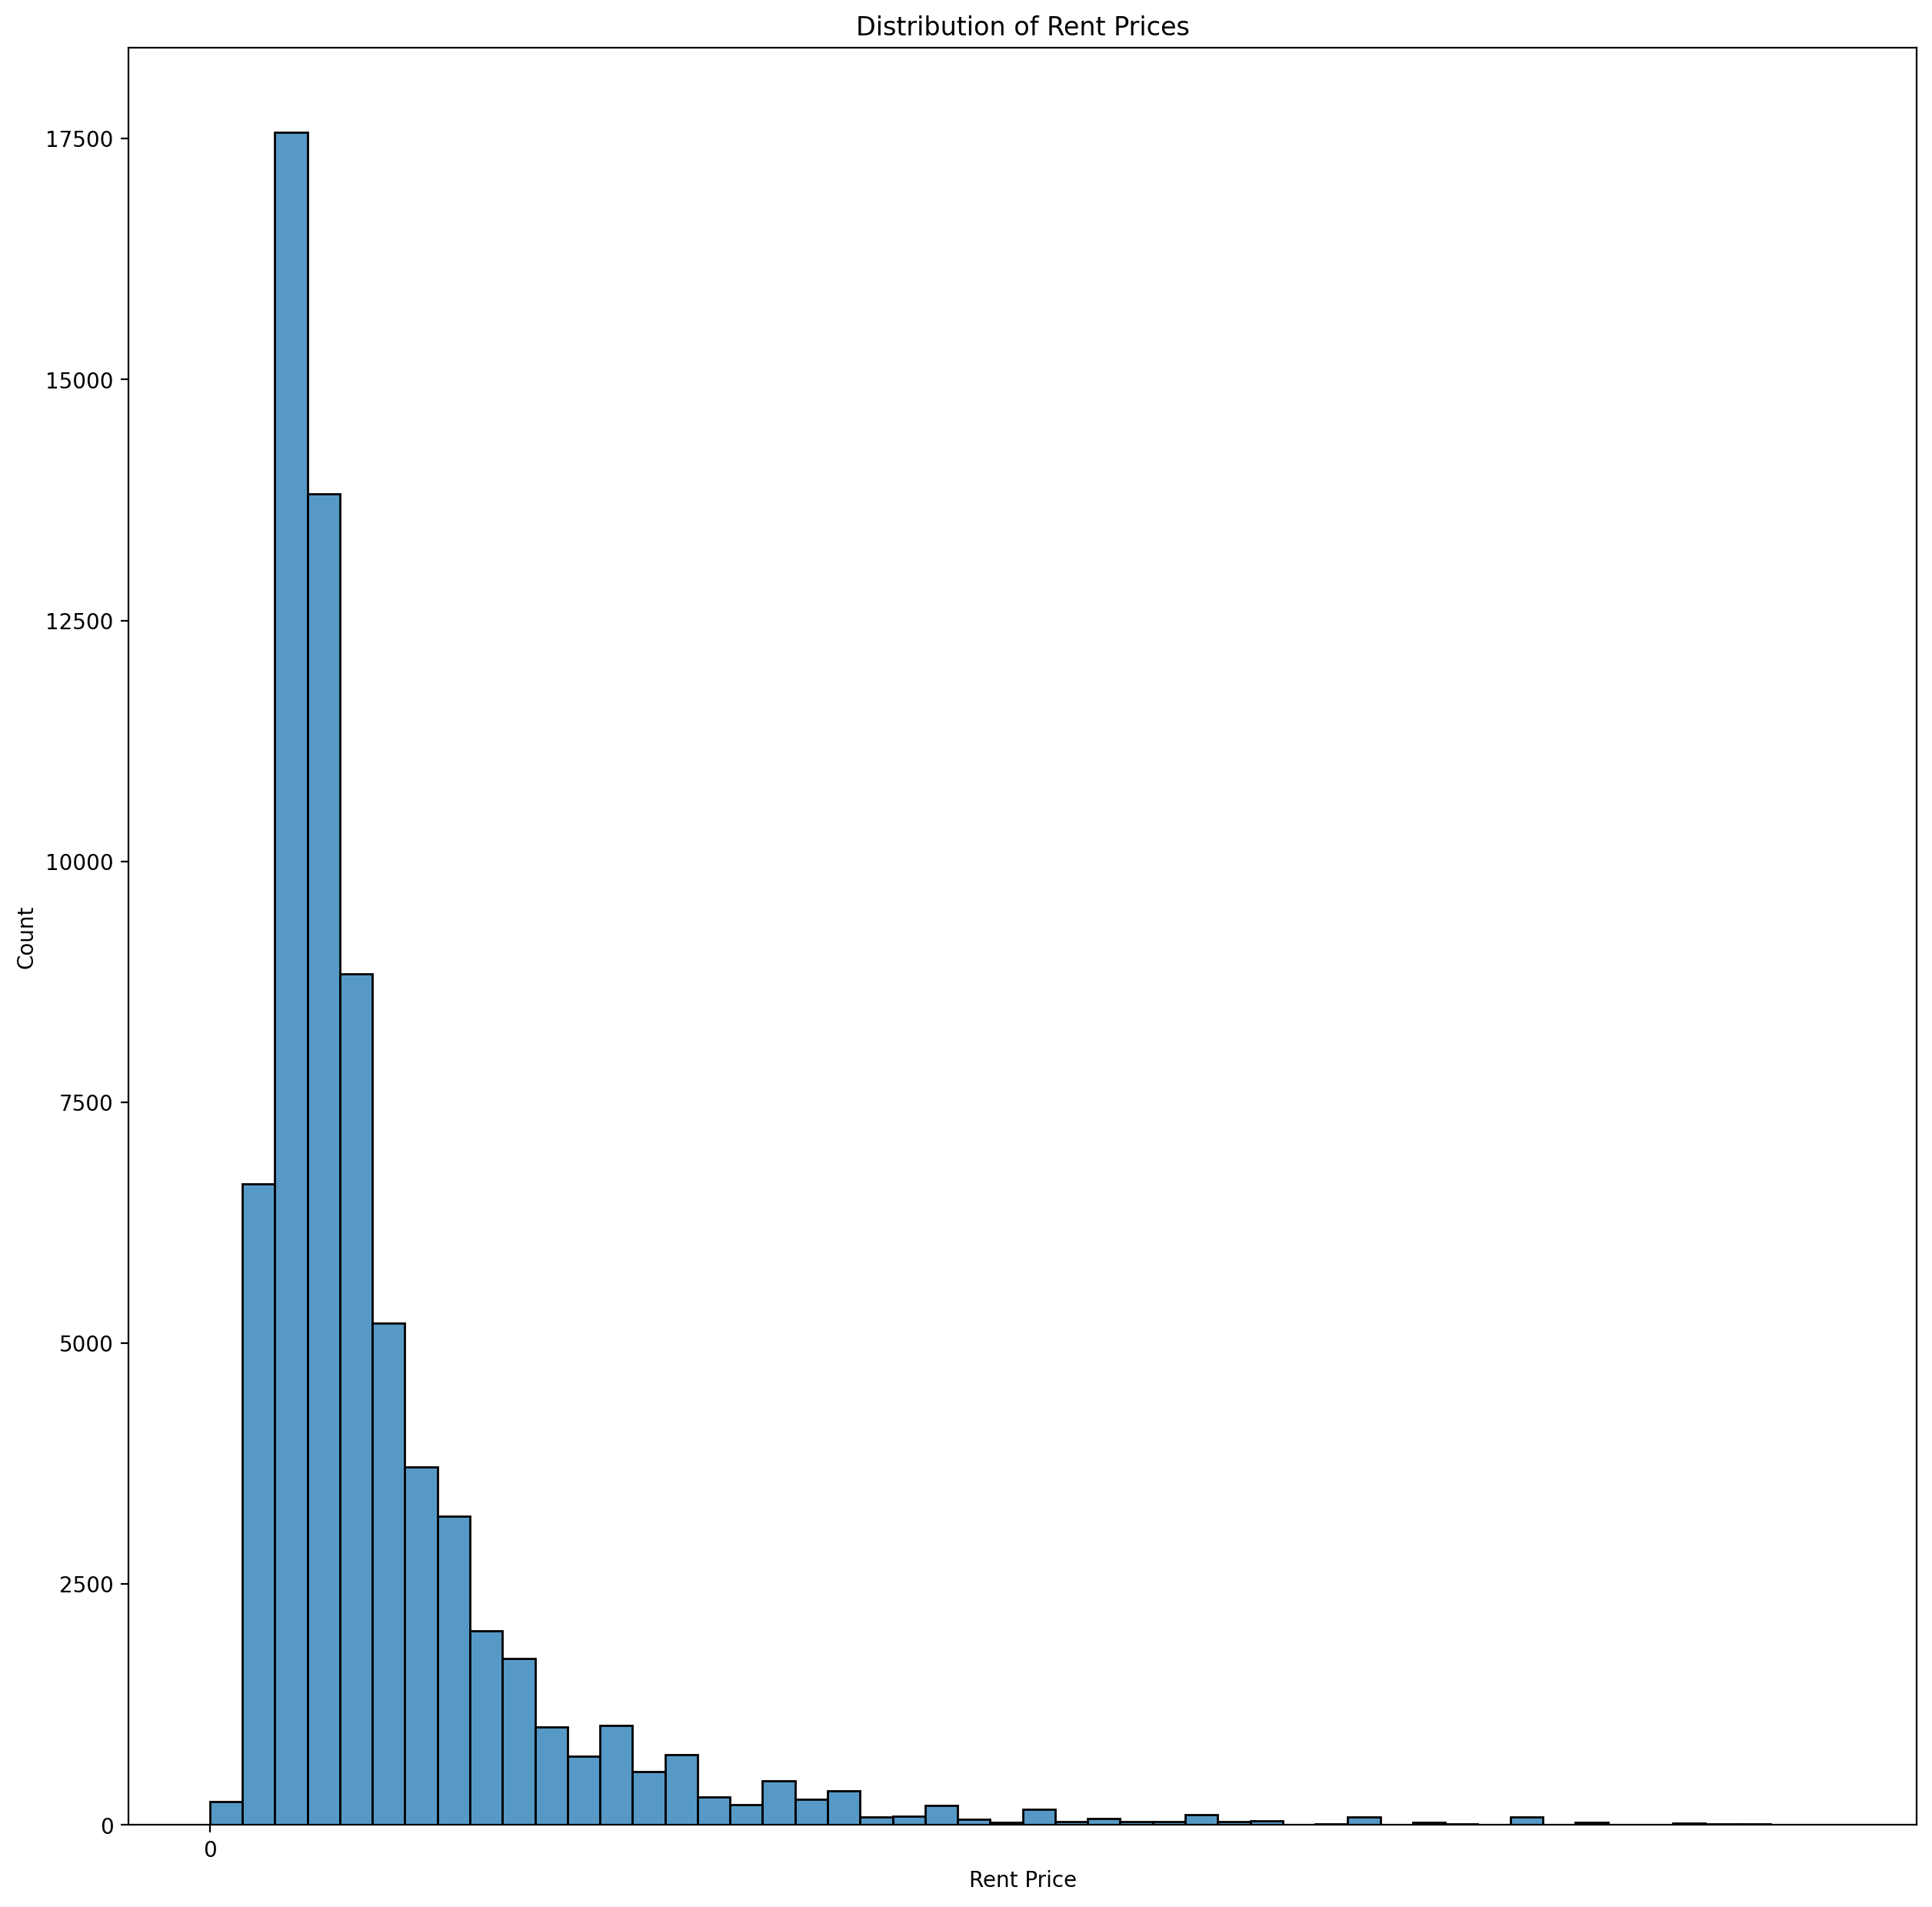

In [29]:
plt.figure(figsize=(15, 15), dpi=200)
sns.histplot(data=df_filtered_outliers,
             x=df_filtered_outliers.price,
             bins=50)
plt.xlabel('Rent Price')
plt.xticks(range(0, 10000, 10000))
plt.title('Distribution of Rent Prices')
plt.show()

### Area vs Price

In [30]:
df_filtered_outliers['area'].describe()

count   69,888.00
mean        73.09
std         34.78
min          1.00
25%         50.00
50%         65.00
75%         90.00
max        300.00
Name: area, dtype: float64

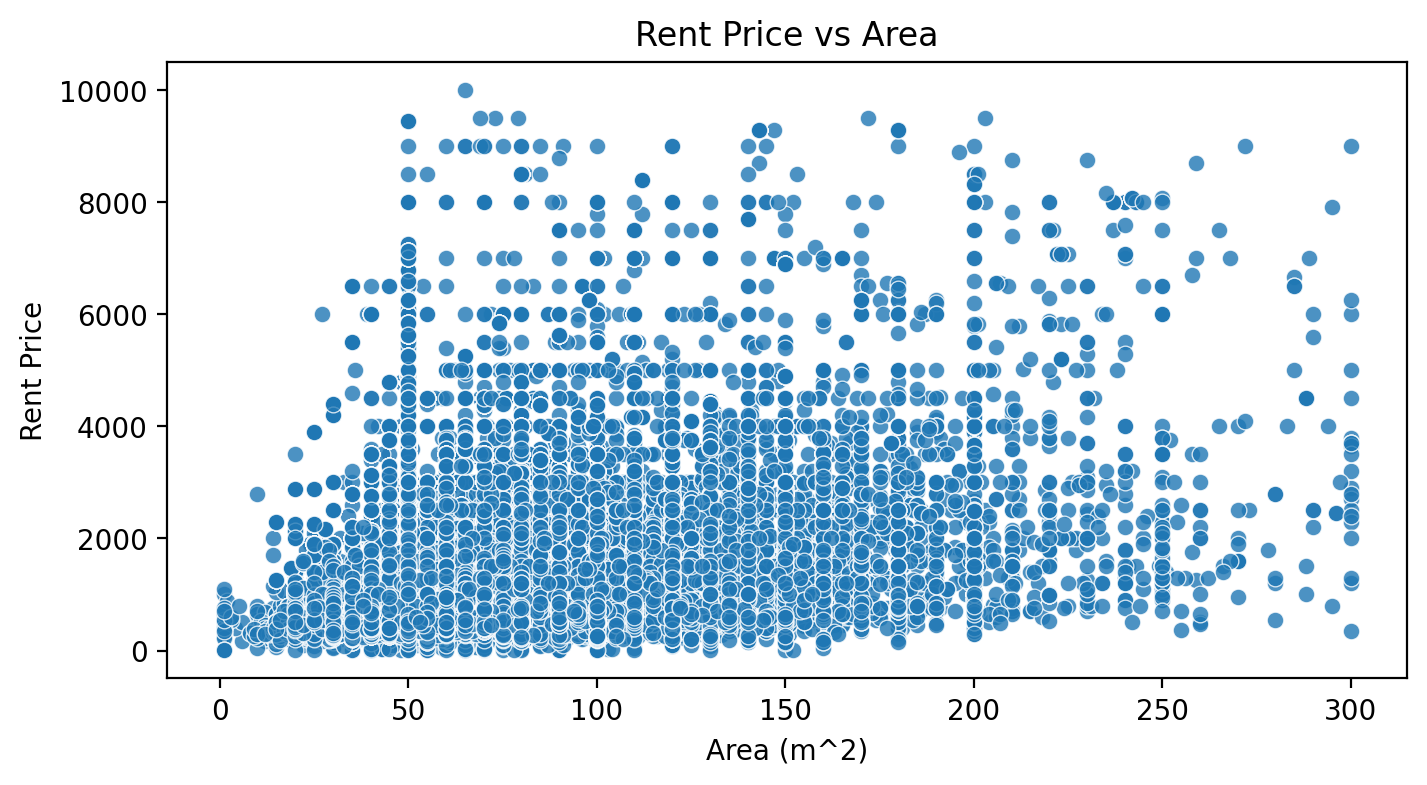

In [31]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df_filtered_outliers,
                x='area',
                y='price',
                alpha=0.8)

plt.xlabel('Area (m^2)')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Area')
plt.show()

In [32]:
df_data.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'TV system', 'external exposure', 'fiber optic',
       'electric gate', 'cellar', 'shared garden', 'private garden',
       'alarm system', 'doorman', 'pool', 'villa', 'entire property',
       'apartment', 'penthouse', 'loft', 'attic'],
      dtype='object')

### Property Count by Type

In [33]:
villa = df_filtered_outliers['villa'].sum()
apartment = df_filtered_outliers['apartment'].sum()
penthouse = df_filtered_outliers['penthouse'].sum()
loft = df_filtered_outliers['loft'].sum()
attic = df_filtered_outliers['attic'].sum()
villa

np.int64(1504)

In [34]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=['villa', 'apartment', 'penthouse', 'loft', 'attic'],
            y=[villa, apartment, penthouse, loft, attic])
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Type')
plt.show()

### Average Rent by Property Type

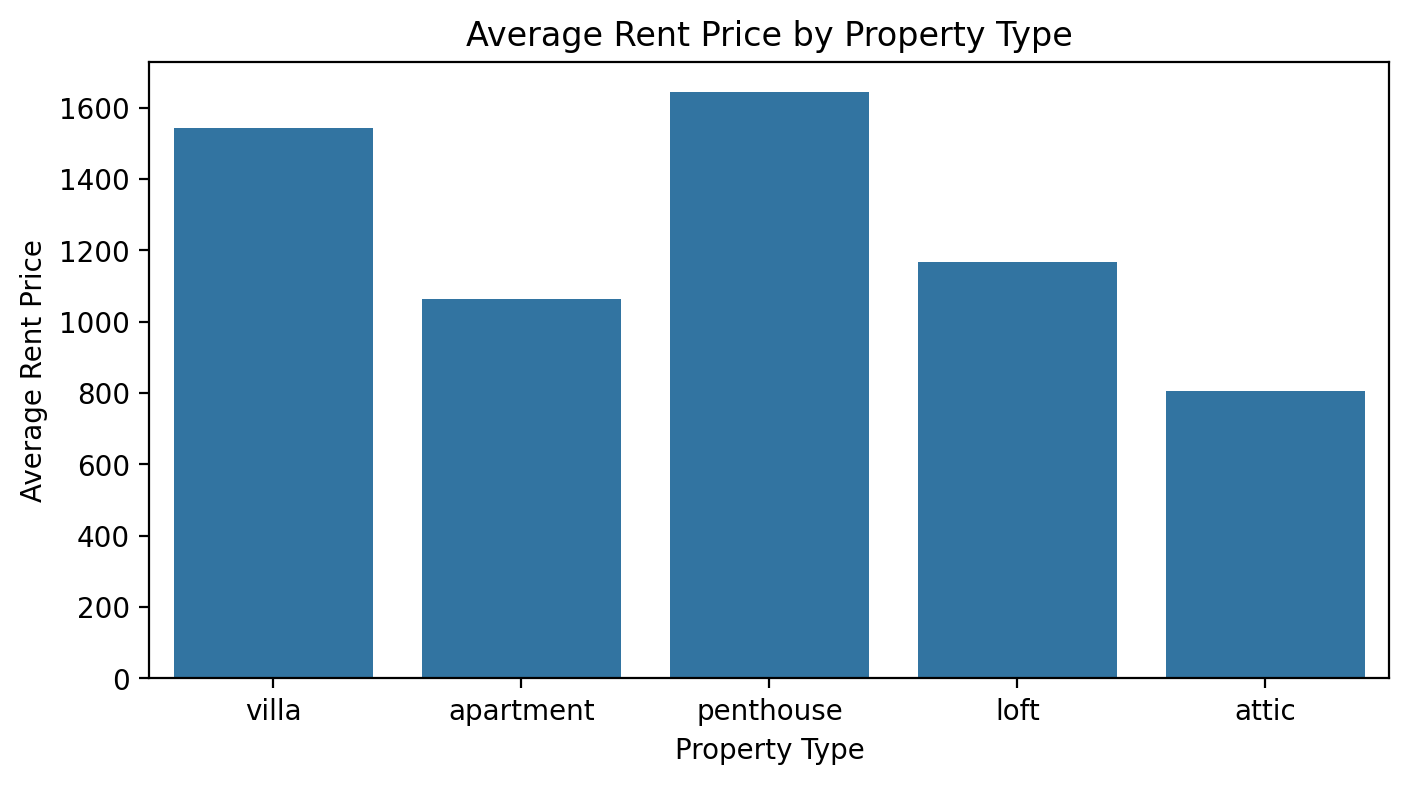

In [35]:
average_prices = {
    'villa': df_filtered_outliers[df_filtered_outliers['villa'] == 1]['price'].mean(),
    'apartment': df_filtered_outliers[df_filtered_outliers['apartment'] == 1]['price'].mean(),
    'penthouse': df_filtered_outliers[df_filtered_outliers['penthouse'] == 1]['price'].mean(),
    'loft': df_filtered_outliers[df_filtered_outliers['loft'] == 1]['price'].mean(),
    'attic': df_filtered_outliers[df_filtered_outliers['attic'] == 1]['price'].mean()
}

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=list(average_prices.keys()), y=list(average_prices.values()))
plt.xlabel('Property Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Property Type')
plt.show()

In [36]:
# Find the percentage of each property type
total_properties = villa + apartment + penthouse + loft + attic
villa_percent = (villa / total_properties) * 100
apartment_percent = (apartment / total_properties) * 100
penthouse_percent = (penthouse / total_properties) * 100
loft_percent = (loft / total_properties) * 100
attic_percent = (attic / total_properties) * 100

villa_percent, apartment_percent, penthouse_percent, loft_percent, attic_percent, total_properties, villa, apartment, penthouse, loft, attic

(np.float64(2.1704934120329615),
 np.float64(94.90136088782417),
 np.float64(1.5167477234352678),
 np.float64(0.3434690372764926),
 np.float64(1.0679289394311113),
 np.int64(69293),
 np.int64(1504),
 np.int64(65760),
 np.int64(1051),
 np.int64(238),
 np.int64(740))

In [37]:
# Drop every row of properties that are not apartments
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['apartment'] == 1]

In [38]:
# Drop the property type columns
df_filtered_outliers.drop(['villa', 'penthouse', 'loft', 'attic', 'apartment'], axis=1, inplace=True)

In [39]:
# Check the columns
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'external exposure', 'fiber optic', 'electric gate',
       'cellar', 'shared garden', 'private garden', 'pool'],
      dtype='object')

In [40]:
# Check the data head
df_filtered_outliers.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  area  \
12              0                0.50          1      2          1  ... 63.00   
13              0                1.00          1      1          0  ... 35.00   
15              1                0.50          1      2          0  ... 44.00   
16              0                0.33          1      3          0  ... 60.00   
19              0                0.33          1      3          0  ... 90.00   

   furnished  balcony  external exposure  fiber optic  electric gate  cellar  \
12         1        0                  0            1              1       0   
13         1        0                  0            0              1       0   
15         1        0                  0            0              0       0   
16         1        0                  1            0              0       0   
19         1        1                  0            0              0       0   

    shared garden  private garden  pool  
12              0               1     0  
13              0               0     0  
15              0               0     0  
16              0               0     0  
19              0               0     0  

[5 rows x 24 columns]

In [41]:
# Drop column: pool, sea view and private garden because of skewness
df_filtered_outliers.drop(['pool', 'sea view', 'private garden'], axis=1, inplace=True)

In [42]:
# Find the number of count of each bathroom
df_filtered_outliers['bathrooms'].value_counts()

bathrooms
1    52764
2    11894
3      997
4       55
5       22
6       15
7        7
8        6
Name: count, dtype: int64

In [43]:
# Remove bathroom greater than 2
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['bathrooms'] <= 2]

In [44]:
average_prices_by_region = df_filtered_outliers.groupby('region')['price'].mean().sort_values()
average_prices_by_region

region
Liguria                   350.00
l-aquila                  400.00
umbria                    469.94
genova                    504.29
basilicata                518.94
palermo                   565.00
catanzaro                 595.94
piemonte                  604.83
molise                    610.21
calabria                  619.02
marche                    658.08
puglia                    676.75
torino                    700.00
bari                      700.00
sicilia                   733.38
napoli                    750.00
liguria                   766.51
abruzzo                   774.57
friuli-venezia-giulia     793.13
campania                  844.08
veneto                    900.57
trentino-alto-adige       958.25
emilia-romagna          1,013.32
lazio                   1,030.44
valle-d-aosta           1,033.28
trieste                 1,126.78
emilia-Romagna          1,160.08
toscana                 1,203.71
venezia                 1,225.00
milano                  1,250.00
sar

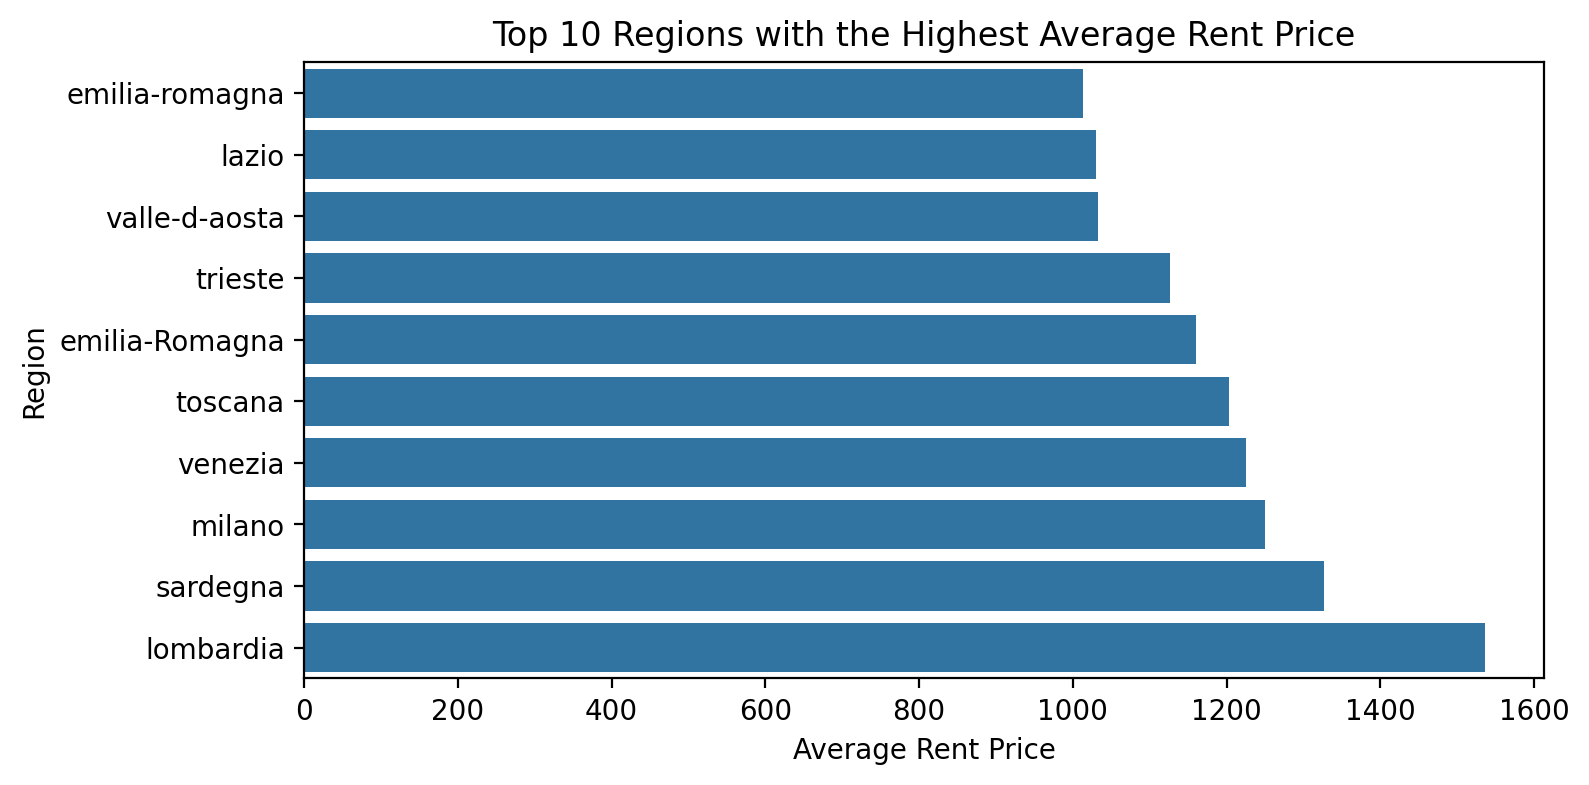

In [45]:
top_10_regions_high = average_prices_by_region.tail(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_high.values, y=top_10_regions_high.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()


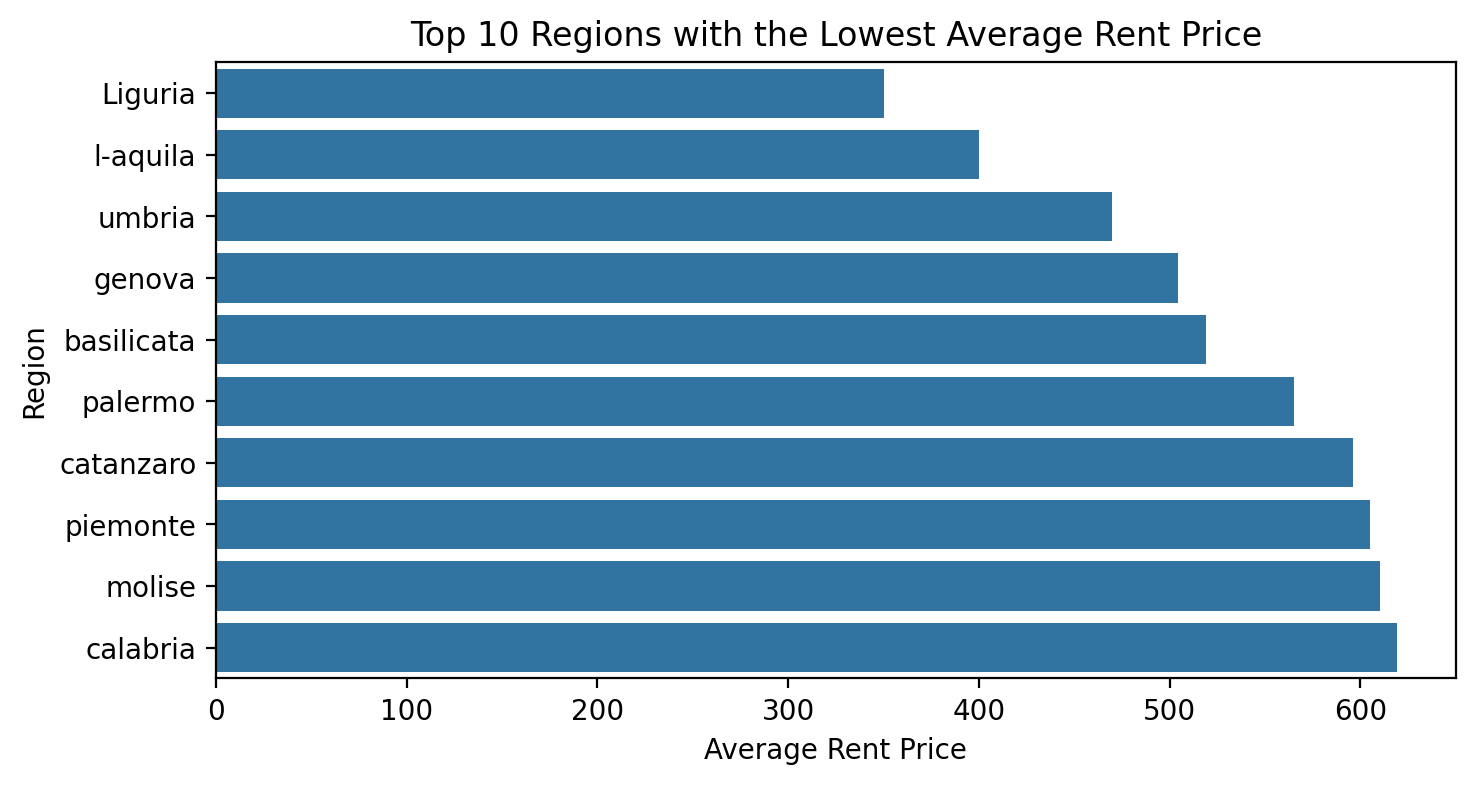

In [46]:
top_10_regions_low = average_prices_by_region.head(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_low.values, y=top_10_regions_low.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Lowest Average Rent Price')
plt.show()

In [47]:
df_filtered_outliers['price'].describe()

count   64,658.00
mean     1,036.57
std        870.58
min          1.00
25%        550.00
50%        750.00
75%      1,200.00
max      9,999.00
Name: price, dtype: float64

In [48]:
fig = px.box(df_filtered_outliers, y='price')
fig.show()

In [49]:
df_filtered_outliers['energy class'].value_counts()

energy class
G    26641
C     8139
F     7625
E     6343
D     6184
A     5925
B     3704
,       97
Name: count, dtype: int64

In [50]:
# Drop the energy column with value ','
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['energy class'] != ',']

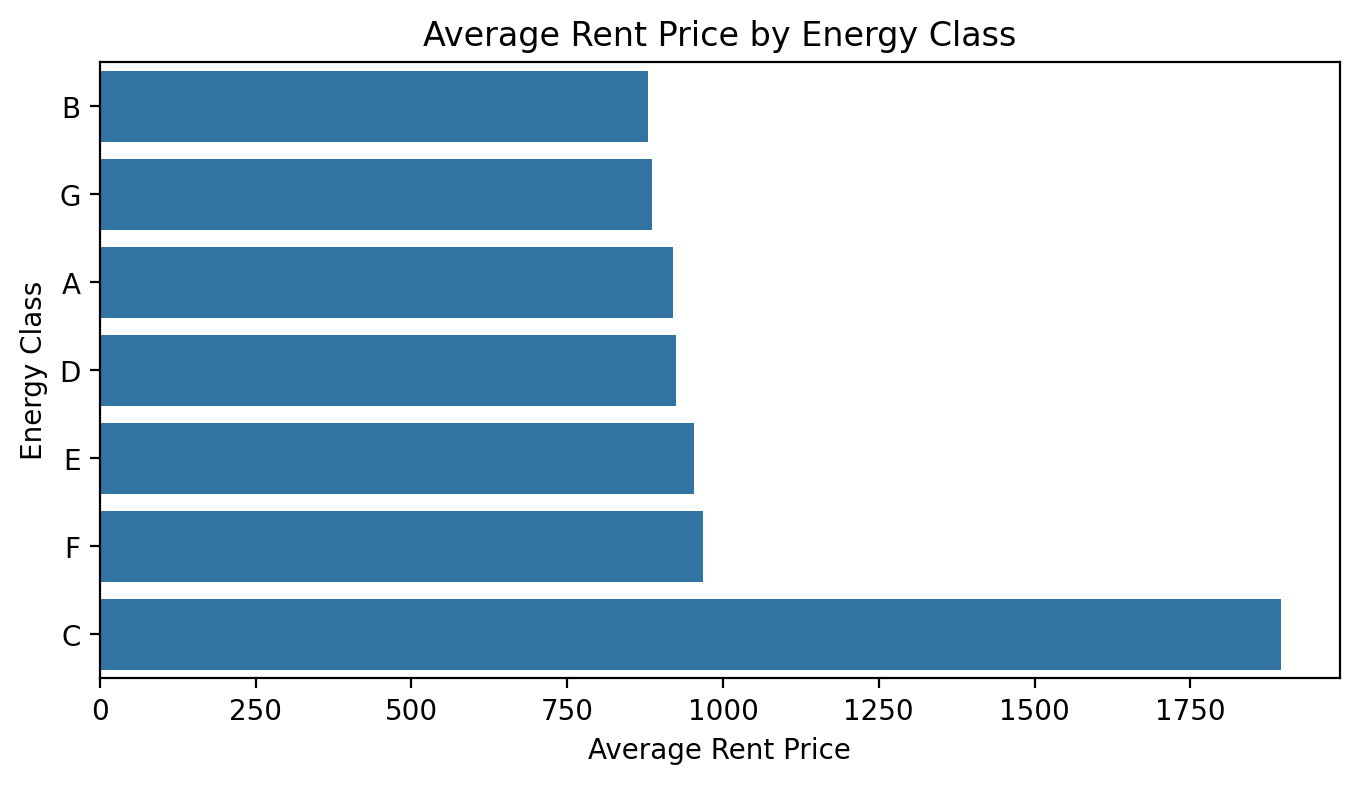

In [51]:
average_prices_by_energy_class = df_filtered_outliers.groupby('energy class')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_energy_class.values, y=average_prices_by_energy_class.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Energy Class')
plt.title('Average Rent Price by Energy Class')
plt.show()

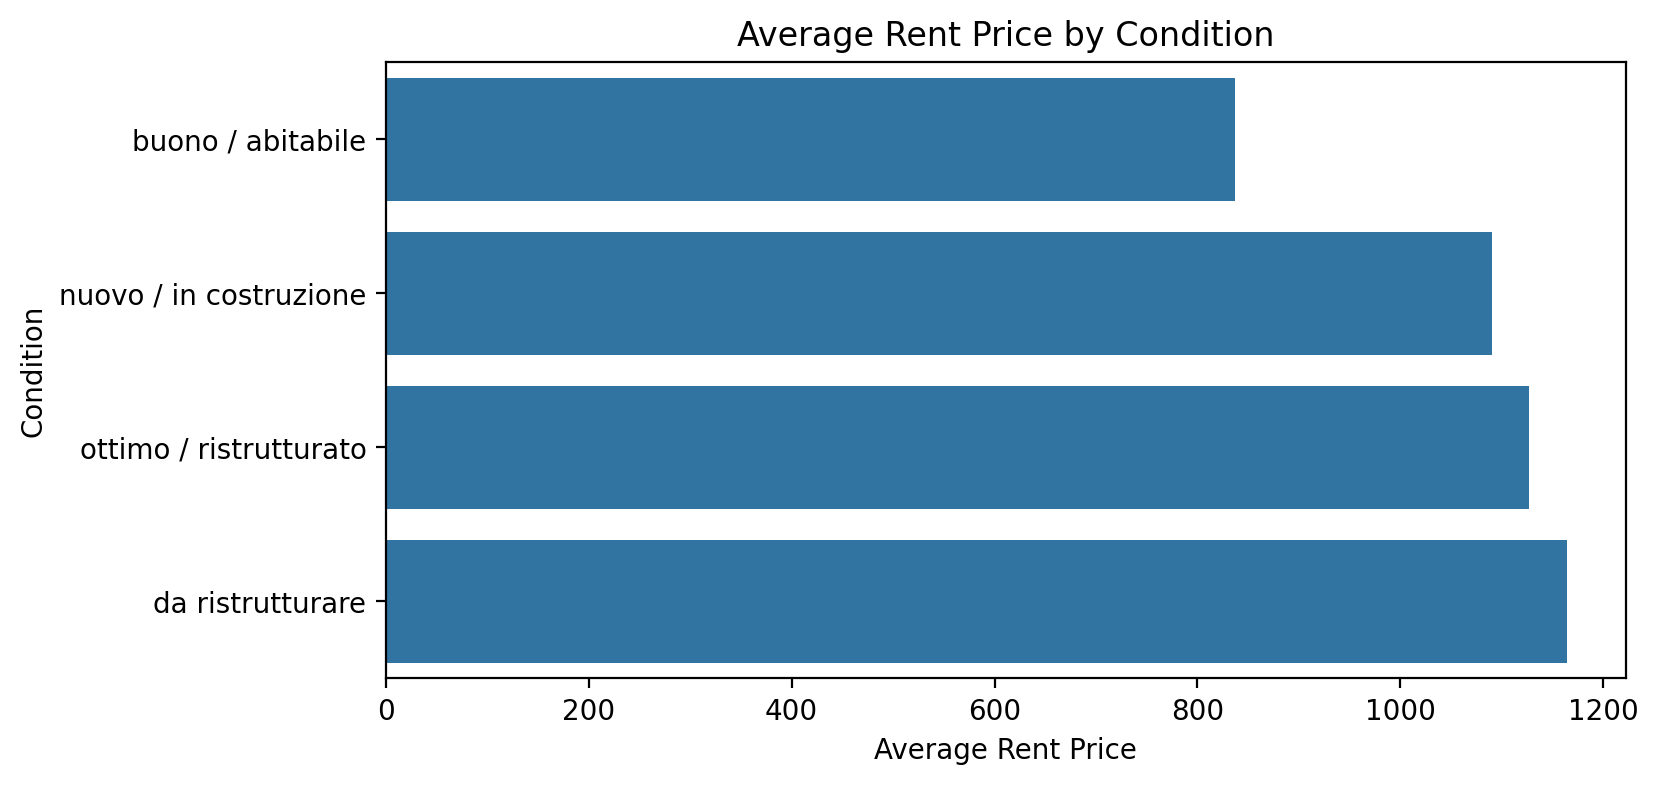

In [52]:
average_prices_by_condition = df_filtered_outliers.groupby('condition')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_condition.values, y=average_prices_by_condition.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Condition')
plt.title('Average Rent Price by Condition')
plt.show()

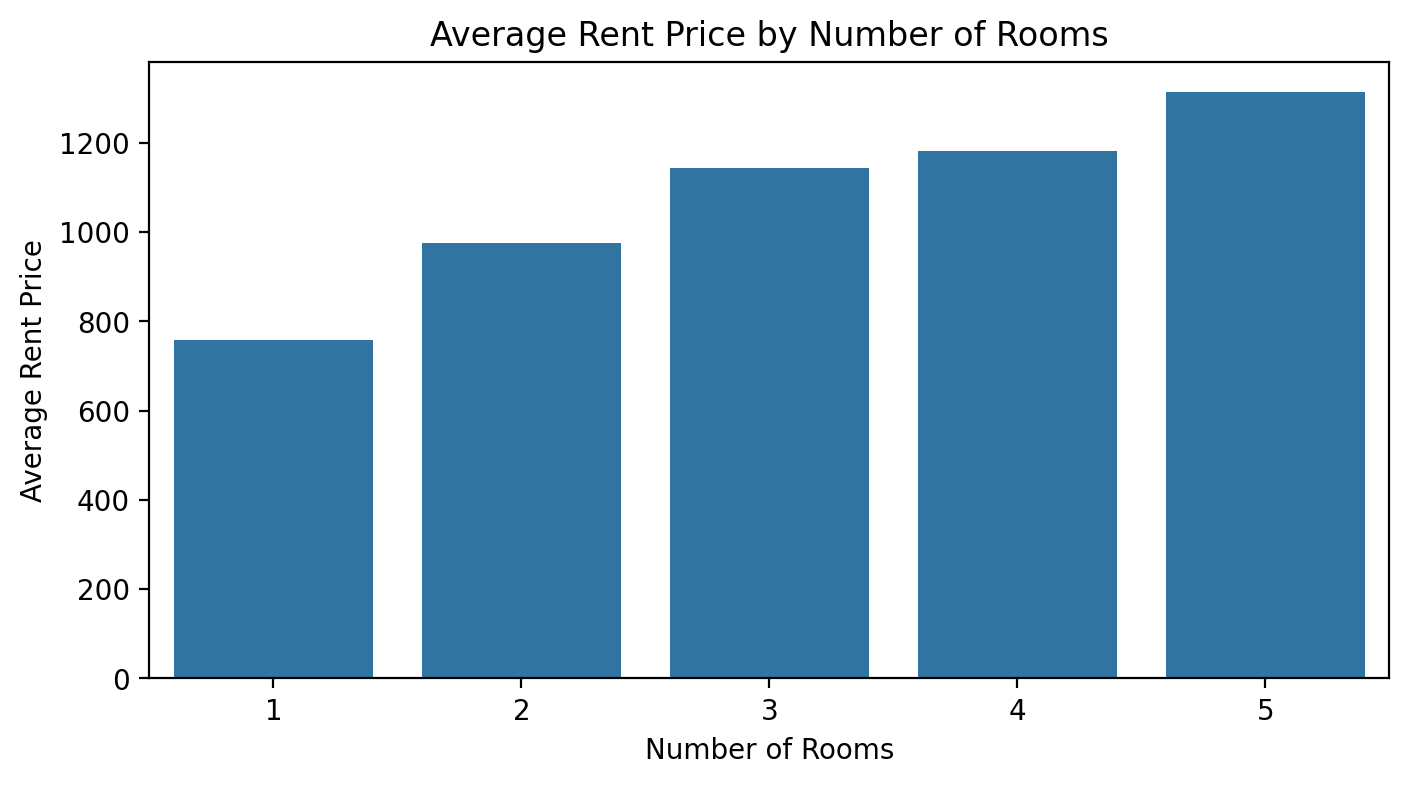

In [53]:
average_prices_by_rooms = df_filtered_outliers.groupby('rooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_rooms.index, y=average_prices_by_rooms.values)
plt.xlabel('Number of Rooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Rooms')
plt.show()

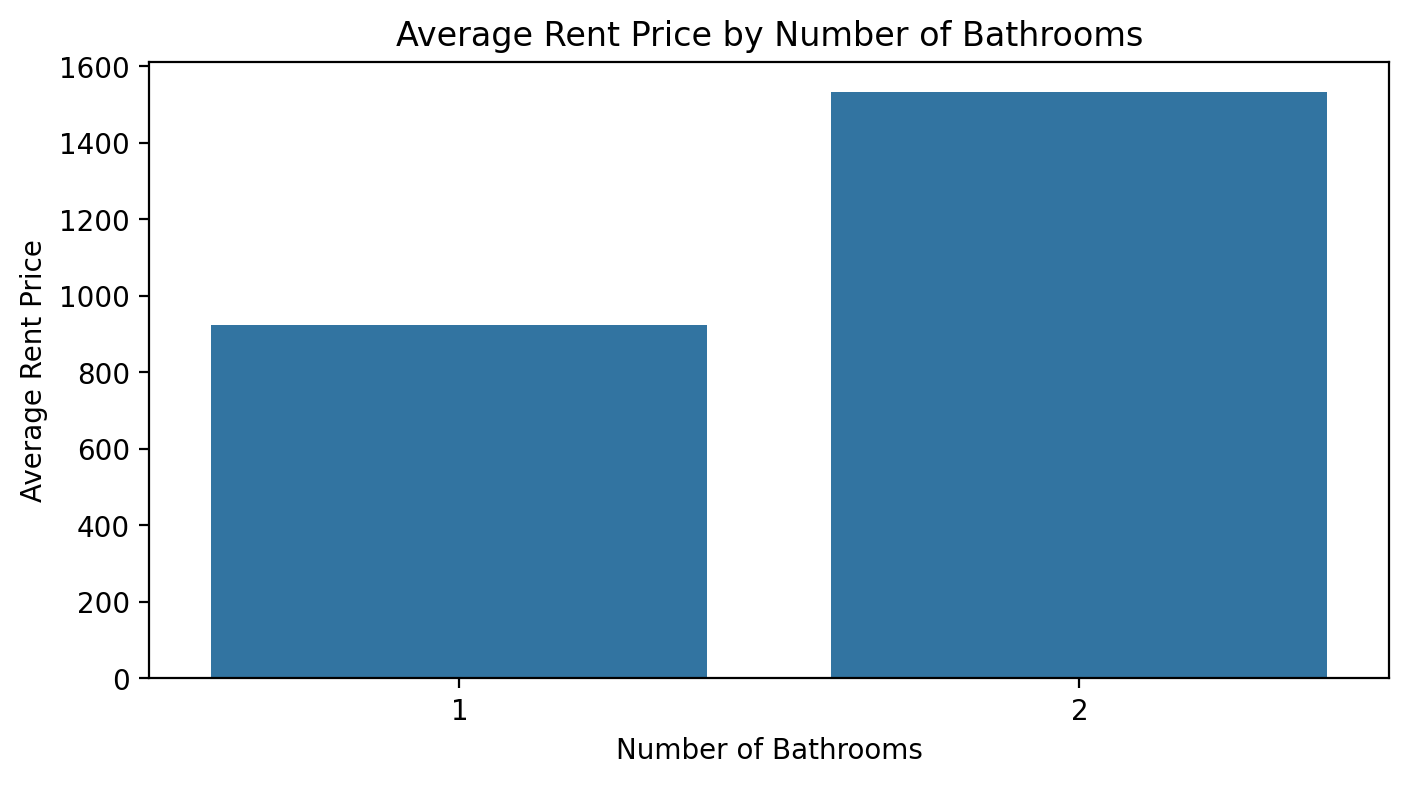

In [54]:
average_prices_by_bathrooms = df_filtered_outliers.groupby('bathrooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_bathrooms.index, y=average_prices_by_bathrooms.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Bathrooms')
plt.show()

### Regression Plot

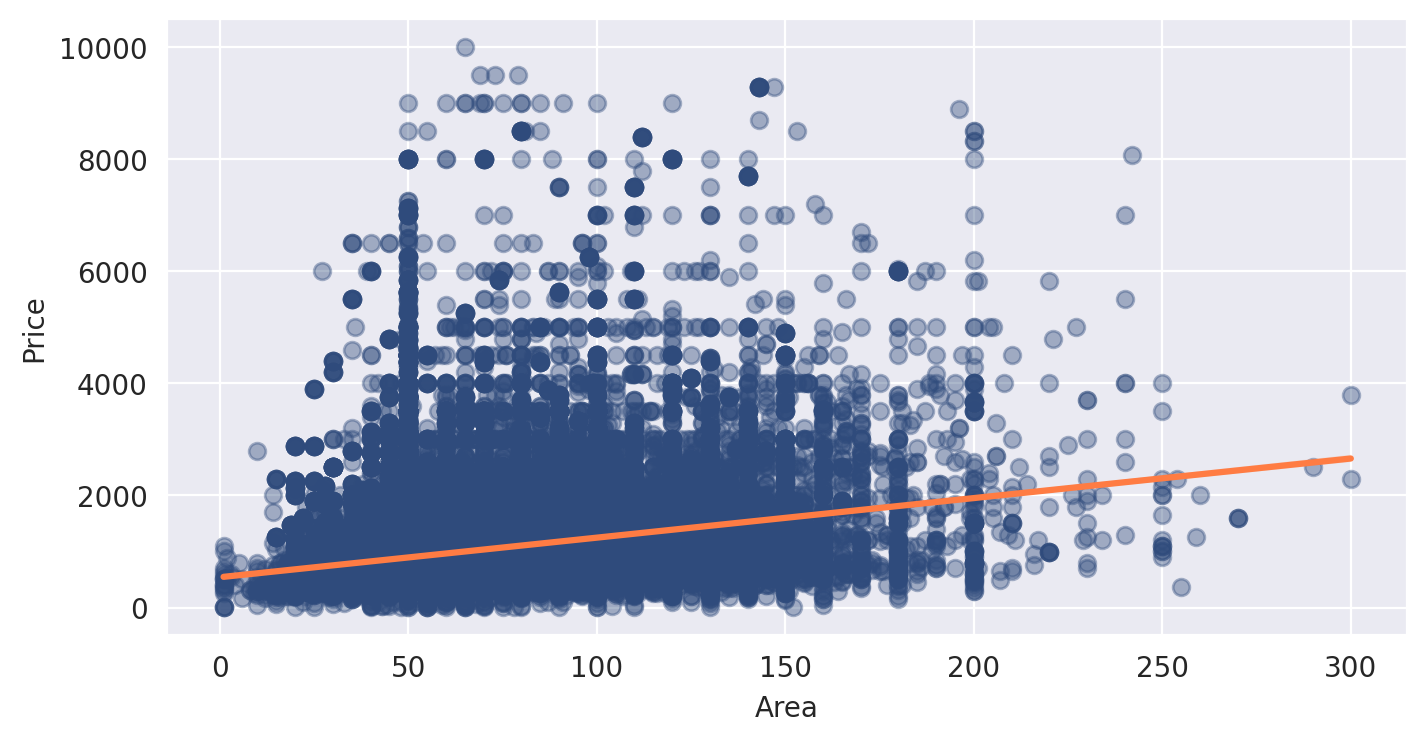

In [55]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax= sns.regplot(data=df_filtered_outliers,
            x='area',
            y='price',
            scatter_kws = {'alpha': 0.4,'color': "#2f4b7c"},
            line_kws = {'color': '#ff7c43'})


  ax.set(
        ylabel='Price',
        xlabel='Area',)


## Train Model using Linear Regression

In [56]:
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'central heating', 'area', 'furnished', 'balcony',
       'external exposure', 'fiber optic', 'electric gate', 'cellar',
       'shared garden'],
      dtype='object')

In [57]:
# Drop unnecessary columns
df_filtered_outliers.drop(['datetime', 'bathrooms per room'], axis=1, inplace=True)

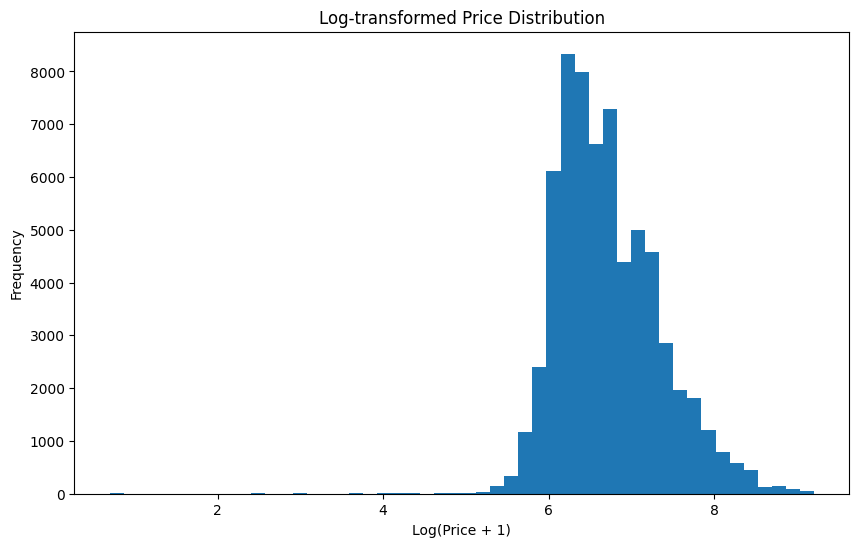

In [58]:
# Fixing the skewness of the price column
log_price = np.log1p(df_filtered_outliers['price'])

plt.figure(figsize=(10,6))
plt.hist(log_price, bins=50)
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

In [59]:
# # Replace the price column with the log transformed price
df_filtered_outliers['price'] = log_price

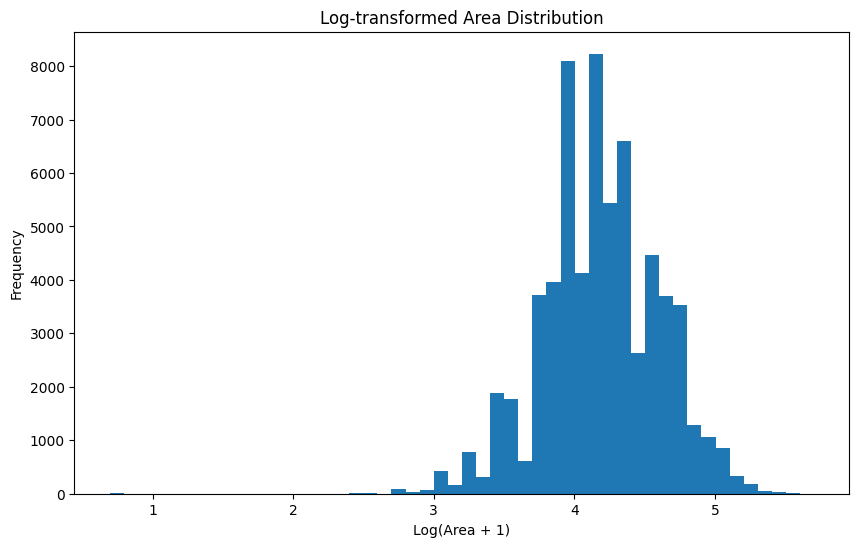

In [60]:
# Fixing the skewness of the area column
log_price = np.log1p(df_filtered_outliers['area'])

plt.figure(figsize=(10,6))
plt.hist(log_price, bins=50)
plt.title('Log-transformed Area Distribution')
plt.xlabel('Log(Area + 1)')
plt.ylabel('Frequency')
plt.show()

In [61]:
# # Replace the area column with the log transformed price
df_filtered_outliers['area'] = log_price

In [62]:
# Count values of each region
df_filtered_outliers['region'].value_counts()

region
lombardia                15776
lazio                    11678
piemonte                  8312
emilia-romagna            7579
veneto                    3881
liguria                   3523
toscana                   3346
campania                  3132
sicilia                   1515
marche                    1477
umbria                    1326
puglia                     935
abruzzo                    659
trentino-alto-adige        400
calabria                   348
sardegna                   184
friuli-venezia-giulia      129
basilicata                  94
valle-d-aosta               90
molise                      76
emilia-Romagna              49
trieste                     18
catanzaro                   16
genova                       7
palermo                      2
venezia                      2
napoli                       2
Liguria                      1
milano                       1
torino                       1
l-aquila                     1
bari                         1
N

In [63]:
# Replace all the regions with less than 1000 properties with 'Other'
regions_to_replace = df_filtered_outliers['region'].value_counts()[df_filtered_outliers['region'].value_counts() < 1000].index
df_filtered_outliers['region'] = df_filtered_outliers['region'].replace(regions_to_replace, 'Other')

df_filtered_outliers['region'].value_counts()


region
lombardia         15776
lazio             11678
piemonte           8312
emilia-romagna     7579
veneto             3881
liguria            3523
toscana            3346
campania           3132
Other              3016
sicilia            1515
marche             1477
umbria             1326
Name: count, dtype: int64

In [64]:
# Count values of each city
df_filtered_outliers['city'].value_counts()

city
Milano                 11606
Roma                    8838
Torino                  3823
Bologna                 2472
Genova                  2136
                       ...  
Frabosa Soprana            1
Dossena                    1
Persico Dosimo             1
Romano di Lombardia        1
Laveno-Mombello            1
Name: count, Length: 2913, dtype: int64

In [65]:
# Replace all the cities with less than 2000 properties with 'Other'
regions_to_replace = df_filtered_outliers['city'].value_counts()[df_filtered_outliers['city'].value_counts() < 300].index
df_filtered_outliers['city'] = df_filtered_outliers['city'].replace(regions_to_replace, 'Other')

df_filtered_outliers['city'].value_counts()

city
Other            26811
Milano           11606
Roma              8838
Torino            3823
Bologna           2472
Genova            2136
Firenze           1469
Napoli            1156
Perugia            723
Parma              712
Padova             652
Verona             586
Venezia            581
Pisa               436
Novara             423
Palermo            408
Ferrara            368
Reggio Emilia      366
Modena             364
Riccione           324
Catanzaro          307
Name: count, dtype: int64

In [66]:
df_data['neighborhood'].value_counts()

neighborhood
Centro Storico              2385
Via Roma                     677
Centro                       554
Città Studi                  435
Navigli - Darsena            391
                            ... 
Frazione Scagnelli             1
Via Felice Isnardi             1
San Desiderio                  1
Piazza Ulisse Calvi, snc       1
Via Gian Lorenzo Bernini       1
Name: count, Length: 11798, dtype: int64

In [67]:
# Replace all the neighborhoods with less than 50 properties with 'Other'
regions_to_replace = df_filtered_outliers['neighborhood'].value_counts()[df_filtered_outliers['neighborhood'].value_counts() < 50].index
df_filtered_outliers['neighborhood'] = df_filtered_outliers['neighborhood'].replace(regions_to_replace, 'Other')

df_filtered_outliers['neighborhood'].value_counts()

neighborhood
Other                       33400
Centro Storico               2227
Via Roma                      625
Centro                        506
Città Studi                   417
                            ...  
Rivarolo                       50
Borgo Rovereto - Piscina       50
Tre Castelli - Faenza          50
Sant'Agnese - Università       50
Ponte Mammolo                  50
Name: count, Length: 269, dtype: int64

In [68]:
df_filtered_outliers['condition'].value_counts()

condition
ottimo / ristrutturato    42487
buono / abitabile         19956
nuovo / in costruzione     1893
da ristrutturare            225
Name: count, dtype: int64

In [69]:
# Drop all the condition columns with the value nuovo / in costruzione and da ristrutturare
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['condition'] != 'nuovo / in costruzione']
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['condition'] != 'da ristrutturare']

df_filtered_outliers['condition'].value_counts()

condition
ottimo / ristrutturato    42487
buono / abitabile         19956
Name: count, dtype: int64

In [70]:
df_filtered_outliers['energy class'].value_counts()

energy class
G    26183
C     7965
F     7517
E     6186
D     6017
A     5077
B     3498
Name: count, dtype: int64

In [71]:
# Replace A, B, C with 1, D, E with 0 and F, G with -1
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['A', 'B', 'C'], 1)
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['D', 'E'], 0)
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['F', 'G'], -1)

df_filtered_outliers['energy class'].value_counts()

C:\Users\ahame\AppData\Local\Temp\ipykernel_40364\1270191804.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



energy class
-1    33700
 1    16540
 0    12203
Name: count, dtype: int64

In [72]:
df_filtered_outliers['top floor'].value_counts()

top floor
0    53977
1     8466
Name: count, dtype: int64

In [73]:
df_filtered_outliers['cellar'].value_counts()

cellar
0    49947
1    12496
Name: count, dtype: int64

In [74]:
df_filtered_outliers['Building Layout'] = np.select(
    [
        (df_filtered_outliers['cellar'] == 0) & (df_filtered_outliers['top floor'] == 0),
        (df_filtered_outliers['cellar'] == 1) & (df_filtered_outliers['top floor'] == 0),
        (df_filtered_outliers['cellar'] == 0) & (df_filtered_outliers['top floor'] == 1),
        (df_filtered_outliers['cellar'] == 1) & (df_filtered_outliers['top floor'] == 1)
    ],
    [
        0,  # No cellar or top floor
        1,  # Cellar only
        2,  # Top floor only
        3   # Both cellar and top floor
    ]
)

# Display the first few rows to verify the new feature
df_filtered_outliers[['cellar', 'top floor', 'Building Layout']].head()

cellar  top floor  Building Layout
13       0          0                0
15       0          0                0
16       0          0                0
19       0          0                0
20       0          0                0

In [75]:
df_filtered_outliers.drop(['cellar', 'top floor'], axis=1, inplace=True)
df_filtered_outliers['Building Layout'].value_counts()

Building Layout
0    43084
1    10893
2     6863
3     1603
Name: count, dtype: int64

In [76]:
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'parking spots', 'bathrooms',
       'rooms', 'condition', 'energy class', 'central heating', 'area',
       'furnished', 'balcony', 'external exposure', 'fiber optic',
       'electric gate', 'shared garden', 'Building Layout'],
      dtype='object')

In [77]:
# Add a feature - Is both furnished and has central heating
df_filtered_outliers['Furnished and Central Heating'] = np.where((df_filtered_outliers['furnished'] == 1) & (df_filtered_outliers['central heating'] == 1), 1, 0)
df_filtered_outliers.head()

region       city           neighborhood  price  parking spots  \
13        piemonte     Torino        Via della Rocca   6.22              0   
15  emilia-romagna    Bologna  Saragozza fuori Porta   6.72              1   
16         liguria     Genova                  Other   6.31              0   
19           Other  Catanzaro                  Other   6.22              0   
20           Other      Other                  Other   6.22              1   

    bathrooms  rooms               condition  energy class  central heating  \
13          1      1       buono / abitabile             0                0   
15          1      2  ottimo / ristrutturato             0                1   
16          1      3  ottimo / ristrutturato            -1                0   
19          1      3  ottimo / ristrutturato            -1                0   
20          1      2       buono / abitabile            -1                0   

    area  furnished  balcony  external exposure  fiber optic  electric gate  \
13  3.58          1        0                  0            0              1   
15  3.81          1        0                  0            0              0   
16  4.11          1        0                  1            0              0   
19  4.51          1        1                  0            0              0   
20  4.26          0        1                  0            0              1   

    shared garden  Building Layout  Furnished and Central Heating  
13              0                0                              0  
15              0                0                              1  
16              0                0                              0  
19              0                0                              0  
20              0                0                              0

### Convert each region, city, neighborhood to LatLong

In [78]:
# %pip install geopy

In [79]:
from geopy.geocoders import Nominatim

In [80]:
df_filtered_outliers['region'].unique()

array(['piemonte', 'emilia-romagna', 'liguria', 'Other', 'veneto',
       'lombardia', 'lazio', 'sicilia', 'umbria', 'toscana', 'campania',
       'marche'], dtype=object)

#### 🌍 Geocoding Implementation Notes

**Important:** The following cells use the Nominatim OpenStreetMap API for geocoding.

**Best Practices Implemented:**
- ✅ Increased timeout to 10 seconds (from default 1 second)
- ✅ Error handling with try-except blocks
- ✅ 1-second delay between requests (respects API rate limits)
- ✅ Continues processing even if some locations fail
- ✅ Progress tracking with status messages

**Expected Runtime:**
- Regions: ~5 locations × 1 sec = ~5 seconds
- Cities: ~5 locations × 1 sec = ~5 seconds  
- Neighborhoods: ~50+ locations × 1 sec = ~60+ seconds

**Note:** If geocoding fails for some locations, you'll need to manually add coordinates (see cells below).

#### 💾 Geocoding Cache System

**New Feature: Automatic Coordinate Caching**

To avoid repeatedly fetching coordinates from the API, this notebook now implements an automatic caching system:

**How it works:**
- First run: Fetches all coordinates from the API and saves them to `geocoding_cache/` folder
- Subsequent runs: Loads coordinates from cache instantly (no API calls needed)
- Only new locations (not in cache) will be geocoded via API

**Cache Files:**
- `geocoding_cache/region_coordinates.json`
- `geocoding_cache/city_coordinates.json`
- `geocoding_cache/neighborhood_coordinates.json`

**Benefits:**
- ⚡ Near-instant loading on subsequent runs
- 🌐 Respects API rate limits (only geocodes new locations)
- 💾 Persistent storage across notebook restarts
- 🔄 Automatically updates when new locations are found

**To force re-geocoding:** Simply delete the corresponding JSON file in the `geocoding_cache/` folder.


In [81]:
# Create directory for storing geocoding cache
import os
import json

cache_dir = 'geocoding_cache'
os.makedirs(cache_dir, exist_ok=True)

def load_coordinates_from_cache(cache_file):
    """Load coordinates from cache file if it exists."""
    cache_path = os.path.join(cache_dir, cache_file)
    if os.path.exists(cache_path):
        with open(cache_path, 'r') as f:
            coords = json.load(f)
            # Convert string tuples back to actual tuples
            return {k: tuple(v) if isinstance(v, list) else v for k, v in coords.items()}
    return {}

def save_coordinates_to_cache(coordinates, cache_file):
    """Save coordinates to cache file."""
    cache_path = os.path.join(cache_dir, cache_file)
    # Convert tuples to lists for JSON serialization
    coords_serializable = {k: list(v) if isinstance(v, tuple) else v for k, v in coordinates.items()}
    with open(cache_path, 'w') as f:
        json.dump(coords_serializable, f, indent=2)
    print(f"✅ Cached coordinates saved to: {cache_path}")

print(f"✅ Geocoding cache directory created/verified: {cache_dir}")
print(f"💾 Cache files will be saved to avoid re-fetching coordinates")


✅ Geocoding cache directory created/verified: geocoding_cache
💾 Cache files will be saved to avoid re-fetching coordinates


In [82]:
# List all the unique columns in the region column ignore the 'Other' column
unique_regions = df_filtered_outliers['region'].unique()
unique_regions = unique_regions[unique_regions != 'Other']

# Try to load from cache first
region_coordinates = load_coordinates_from_cache('region_coordinates.json')

if region_coordinates:
    print(f"📦 Loaded {len(region_coordinates)} region coordinates from cache")
    # Check if we need to geocode any new regions
    cached_regions = set(region_coordinates.keys()) - {'Other'}
    new_regions = set(unique_regions) - cached_regions
    if new_regions:
        print(f"🔍 Found {len(new_regions)} new regions to geocode: {new_regions}")
    else:
        print("✅ All regions already cached!")
        new_regions = []
else:
    print("🌐 No cache found, will geocode all regions")
    new_regions = unique_regions
    region_coordinates = {}

# Create a geolocator object with increased timeout
if len(new_regions) > 0:
    geolocator = Nominatim(user_agent='geoapi', timeout=10)
    
    # Loop through each new region and get the latitude and longitude
    import time
    for region in new_regions:
        try:
            location = geolocator.geocode(region)
            if location:
                region_coordinates[region] = (location.latitude, location.longitude)
                print(f"✓ Geocoded: {region}")
            else:
                print(f"✗ Not found: {region}")
            # Add delay to respect API rate limits (1 request per second)
            time.sleep(1)
        except Exception as e:
            print(f"✗ Error geocoding {region}: {str(e)}")
            # Continue with next region instead of failing
            continue
    
    # Save to cache after geocoding
    save_coordinates_to_cache(region_coordinates, 'region_coordinates.json')

region_coordinates


📦 Loaded 12 region coordinates from cache
✅ All regions already cached!


{'piemonte': (45.060735, 7.923549),
 'emilia-romagna': (44.525696, 11.039437),
 'liguria': (44.4777617, 8.7026296),
 'veneto': (45.6476663, 11.8665254),
 'lombardia': (45.5703694, 9.7732524),
 'lazio': (41.9808038, 12.7662312),
 'sicilia': (37.587794, 14.155048),
 'umbria': (42.965916, 12.490236),
 'toscana': (43.4586541, 11.1389204),
 'campania': (40.860672, 14.843984),
 'marche': (43.3458388, 13.1415872),
 'Other': (43.22562791818182, 11.621945472727274)}

In [83]:
# Find the mean of all the regions latitude and longitude and use it as the latitude and longitude of 'Other'
if 'Other' not in region_coordinates:
    latitude = sum([coord[0] for coord in region_coordinates.values()]) / len(region_coordinates)
    longitude = sum([coord[1] for coord in region_coordinates.values()]) / len(region_coordinates)
    
    region_coordinates['Other'] = (latitude, longitude)
    
    # Update cache with 'Other' entry
    save_coordinates_to_cache(region_coordinates, 'region_coordinates.json')
    print(f"✅ Added 'Other' with mean coordinates: ({latitude:.4f}, {longitude:.4f})")
else:
    print("✅ 'Other' region already in cache")

region_coordinates


✅ 'Other' region already in cache


{'piemonte': (45.060735, 7.923549),
 'emilia-romagna': (44.525696, 11.039437),
 'liguria': (44.4777617, 8.7026296),
 'veneto': (45.6476663, 11.8665254),
 'lombardia': (45.5703694, 9.7732524),
 'lazio': (41.9808038, 12.7662312),
 'sicilia': (37.587794, 14.155048),
 'umbria': (42.965916, 12.490236),
 'toscana': (43.4586541, 11.1389204),
 'campania': (40.860672, 14.843984),
 'marche': (43.3458388, 13.1415872),
 'Other': (43.22562791818182, 11.621945472727274)}

In [84]:
# Note: Coordinates are now automatically cached to geocoding_cache/region_coordinates.json
# No need to manually save - caching happens automatically during geocoding


In [85]:
# Add 2 new columns to the dataframe - latitude and longitude
df_filtered_outliers['latitude'] = df_filtered_outliers['region'].map(lambda x: region_coordinates[x][0])
df_filtered_outliers['longitude'] = df_filtered_outliers['region'].map(lambda x: region_coordinates[x][1])

# Drop the region column
df_filtered_outliers.drop('region', axis=1, inplace=True)

df_filtered_outliers.head()

city           neighborhood  price  parking spots  bathrooms  rooms  \
13     Torino        Via della Rocca   6.22              0          1      1   
15    Bologna  Saragozza fuori Porta   6.72              1          1      2   
16     Genova                  Other   6.31              0          1      3   
19  Catanzaro                  Other   6.22              0          1      3   
20      Other                  Other   6.22              1          1      2   

                 condition  energy class  central heating  area  furnished  \
13       buono / abitabile             0                0  3.58          1   
15  ottimo / ristrutturato             0                1  3.81          1   
16  ottimo / ristrutturato            -1                0  4.11          1   
19  ottimo / ristrutturato            -1                0  4.51          1   
20       buono / abitabile            -1                0  4.26          0   

    balcony  external exposure  fiber optic  electric gate  shared garden  \
13        0                  0            0              1              0   
15        0                  0            0              0              0   
16        0                  1            0              0              0   
19        1                  0            0              0              0   
20        1                  0            0              1              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  
13                0                              0     45.06       7.92  
15                0                              1     44.53      11.04  
16                0                              0     44.48       8.70  
19                0                              0     43.23      11.62  
20                0                              0     43.23      11.62

In [86]:
df_filtered_outliers['city'].unique()

array(['Torino', 'Bologna', 'Genova', 'Catanzaro', 'Other', 'Milano',
       'Roma', 'Padova', 'Palermo', 'Novara', 'Verona', 'Modena', 'Parma',
       'Pisa', 'Firenze', 'Napoli', 'Perugia', 'Venezia', 'Ferrara',
       'Riccione', 'Reggio Emilia'], dtype=object)

In [87]:
# List all the unique columns in the city column ignore the 'Other' column
unique_cities = df_filtered_outliers['city'].unique()
unique_cities = unique_cities[unique_cities != 'Other']

# Try to load from cache first
city_coordinates = load_coordinates_from_cache('city_coordinates.json')

if city_coordinates:
    print(f"📦 Loaded {len(city_coordinates)} city coordinates from cache")
    # Check if we need to geocode any new cities
    cached_cities = set(city_coordinates.keys()) - {'Other'}
    new_cities = set(unique_cities) - cached_cities
    if new_cities:
        print(f"🔍 Found {len(new_cities)} new cities to geocode: {new_cities}")
    else:
        print("✅ All cities already cached!")
        new_cities = []
else:
    print("🌐 No cache found, will geocode all cities")
    new_cities = unique_cities
    city_coordinates = {}

# Create a geolocator object with increased timeout
if len(new_cities) > 0:
    geolocator = Nominatim(user_agent='geoapi', timeout=10)
    
    # Loop through each new city and get the latitude and longitude
    import time
    for city in new_cities:
        try:
            location = geolocator.geocode(city)
            if location:
                city_coordinates[city] = (location.latitude, location.longitude)
                print(f"✓ Geocoded: {city}")
            else:
                print(f"✗ Not found: {city}")
            # Add delay to respect API rate limits
            time.sleep(1)
        except Exception as e:
            print(f"✗ Error geocoding {city}: {str(e)}")
            continue
    
    # Save to cache after geocoding
    save_coordinates_to_cache(city_coordinates, 'city_coordinates.json')

city_coordinates


📦 Loaded 21 city coordinates from cache
✅ All cities already cached!


{'Torino': (45.0677551, 7.6824892),
 'Bologna': (44.4938203, 11.3426327),
 'Genova': (44.40726, 8.9338624),
 'Catanzaro': (38.8299603, 16.4315569),
 'Milano': (45.4641943, 9.1896346),
 'Roma': (41.8933203, 12.4829321),
 'Padova': (45.391408, 11.8058487),
 'Palermo': (38.1112268, 13.3524434),
 'Novara': (45.58425, 8.545997),
 'Verona': (45.4424977, 10.9857377),
 'Modena': (44.5384728, 10.9359609),
 'Parma': (44.6952006, 10.0979869),
 'Pisa': (43.4714722, 10.6797912),
 'Firenze': (43.7697955, 11.2556404),
 'Napoli': (40.8358846, 14.2487679),
 'Perugia': (43.1070321, 12.4029962),
 'Venezia': (45.4371908, 12.3345898),
 'Ferrara': (44.7667642, 11.827939),
 'Riccione': (43.998274, 12.6474368),
 'Reggio Emilia': (44.6086674, 10.5940667),
 'Other': (43.695722350000004, 11.388915525000002)}

In [88]:
# Find the mean of all the cities latitude and longitude and use it as the latitude and longitude of 'Other'
if 'Other' not in city_coordinates:
    latitude = sum([coord[0] for coord in city_coordinates.values()]) / len(city_coordinates)
    longitude = sum([coord[1] for coord in city_coordinates.values()]) / len(city_coordinates)
    
    city_coordinates['Other'] = (latitude, longitude)
    
    # Update cache with 'Other' entry
    save_coordinates_to_cache(city_coordinates, 'city_coordinates.json')
    print(f"✅ Added 'Other' with mean coordinates: ({latitude:.4f}, {longitude:.4f})")
else:
    print("✅ 'Other' city already in cache")

city_coordinates


✅ 'Other' city already in cache


{'Torino': (45.0677551, 7.6824892),
 'Bologna': (44.4938203, 11.3426327),
 'Genova': (44.40726, 8.9338624),
 'Catanzaro': (38.8299603, 16.4315569),
 'Milano': (45.4641943, 9.1896346),
 'Roma': (41.8933203, 12.4829321),
 'Padova': (45.391408, 11.8058487),
 'Palermo': (38.1112268, 13.3524434),
 'Novara': (45.58425, 8.545997),
 'Verona': (45.4424977, 10.9857377),
 'Modena': (44.5384728, 10.9359609),
 'Parma': (44.6952006, 10.0979869),
 'Pisa': (43.4714722, 10.6797912),
 'Firenze': (43.7697955, 11.2556404),
 'Napoli': (40.8358846, 14.2487679),
 'Perugia': (43.1070321, 12.4029962),
 'Venezia': (45.4371908, 12.3345898),
 'Ferrara': (44.7667642, 11.827939),
 'Riccione': (43.998274, 12.6474368),
 'Reggio Emilia': (44.6086674, 10.5940667),
 'Other': (43.695722350000004, 11.388915525000002)}

In [89]:
# Note: Coordinates are now automatically cached to geocoding_cache/city_coordinates.json
# No need to manually save - caching happens automatically during geocoding


## 🔍 Check for Missing City Coordinates

Before mapping coordinates, let's identify which cities are missing from our geocoding results.

In [90]:
# Check for cities in dataframe that don't have coordinates
cities_in_df = set(df_filtered_outliers['city'].unique())
cities_with_coords = set(city_coordinates.keys())

missing_cities = cities_in_df - cities_with_coords
print(f"✅ Cities with coordinates: {len(cities_with_coords)}")
print(f"❌ Cities missing coordinates: {len(missing_cities)}")

if missing_cities:
    print(f"\nMissing cities: {sorted(missing_cities)}")
else:
    print("\n✅ All cities have coordinates!")

✅ Cities with coordinates: 21
❌ Cities missing coordinates: 0

✅ All cities have coordinates!


In [91]:
# Add 2 new columns to the dataframe - latitude_city and longitude_city
# Use .get() with None as default to handle missing cities
df_filtered_outliers['latitude_city'] = df_filtered_outliers['city'].map(lambda x: city_coordinates.get(x, (None, None))[0])
df_filtered_outliers['longitude_city'] = df_filtered_outliers['city'].map(lambda x: city_coordinates.get(x, (None, None))[1])

# Check how many rows have missing coordinates
missing_coords = df_filtered_outliers[df_filtered_outliers['latitude_city'].isna()]
print(f"⚠️ Rows with missing city coordinates: {len(missing_coords)}")

if len(missing_coords) > 0:
    print(f"Cities affected: {missing_coords['city'].unique()}")
    print(f"\n💡 Option 1: Drop these rows (losing {len(missing_coords)} records)")
    print(f"💡 Option 2: Fill with mean coordinates of other cities")
    print(f"💡 Option 3: Re-geocode these specific cities")

# Drop the city column
df_filtered_outliers.drop('city', axis=1, inplace=True)

df_filtered_outliers.head()

⚠️ Rows with missing city coordinates: 0



neighborhood  price  parking spots  bathrooms  rooms  \
13        Via della Rocca   6.22              0          1      1   
15  Saragozza fuori Porta   6.72              1          1      2   
16                  Other   6.31              0          1      3   
19                  Other   6.22              0          1      3   
20                  Other   6.22              1          1      2   

                 condition  energy class  central heating  area  furnished  \
13       buono / abitabile             0                0  3.58          1   
15  ottimo / ristrutturato             0                1  3.81          1   
16  ottimo / ristrutturato            -1                0  4.11          1   
19  ottimo / ristrutturato            -1                0  4.51          1   
20       buono / abitabile            -1                0  4.26          0   

    ...  external exposure  fiber optic  electric gate  shared garden  \
13  ...                  0            0              1              0   
15  ...                  0            0              0              0   
16  ...                  1            0              0              0   
19  ...                  0            0              0              0   
20  ...                  0            0              1              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  \
13                0                              0     45.06       7.92   
15                0                              1     44.53      11.04   
16                0                              0     44.48       8.70   
19                0                              0     43.23      11.62   
20                0                              0     43.23      11.62   

    latitude_city  longitude_city  
13          45.07            7.68  
15          44.49           11.34  
16          44.41            8.93  
19          38.83           16.43  
20          43.70           11.39  

[5 rows x 21 columns]

## 🛠️ Handle Missing City Coordinates

Choose one of the following strategies for rows with missing coordinates.

In [92]:
# Strategy 1: Drop rows with missing coordinates (RECOMMENDED for small number of missing values)
# This is the safest approach if only a few cities are missing

print(f"Before handling missing coordinates: {len(df_filtered_outliers)} rows")

# Drop rows where city coordinates are missing
df_filtered_outliers = df_filtered_outliers.dropna(subset=['latitude_city', 'longitude_city'])

print(f"After dropping missing coordinates: {len(df_filtered_outliers)} rows")
print(f"✅ All remaining rows now have valid city coordinates")

df_filtered_outliers.head()

Before handling missing coordinates: 62443 rows
After dropping missing coordinates: 62443 rows
✅ All remaining rows now have valid city coordinates


neighborhood  price  parking spots  bathrooms  rooms  \
13        Via della Rocca   6.22              0          1      1   
15  Saragozza fuori Porta   6.72              1          1      2   
16                  Other   6.31              0          1      3   
19                  Other   6.22              0          1      3   
20                  Other   6.22              1          1      2   

                 condition  energy class  central heating  area  furnished  \
13       buono / abitabile             0                0  3.58          1   
15  ottimo / ristrutturato             0                1  3.81          1   
16  ottimo / ristrutturato            -1                0  4.11          1   
19  ottimo / ristrutturato            -1                0  4.51          1   
20       buono / abitabile            -1                0  4.26          0   

    ...  external exposure  fiber optic  electric gate  shared garden  \
13  ...                  0            0              1              0   
15  ...                  0            0              0              0   
16  ...                  1            0              0              0   
19  ...                  0            0              0              0   
20  ...                  0            0              1              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  \
13                0                              0     45.06       7.92   
15                0                              1     44.53      11.04   
16                0                              0     44.48       8.70   
19                0                              0     43.23      11.62   
20                0                              0     43.23      11.62   

    latitude_city  longitude_city  
13          45.07            7.68  
15          44.49           11.34  
16          44.41            8.93  
19          38.83           16.43  
20          43.70           11.39  

[5 rows x 21 columns]

In [93]:
df_filtered_outliers['neighborhood'].unique()

array(['Via della Rocca', 'Saragozza fuori Porta', 'Other', 'Santa Maria',
       'Catanzaro Lido', 'Centro Storico', 'Centro', 'San Leonardo',
       'Quadrilatero Romano', 'Cittadella', 'Giardini Reali',
       'Portello - Parco Vittoria', 'Bologna', 'Casal Bruciato', 'Pagano',
       'Giambellino', 'Piazze - Duomo', 'Pasteur', 'Plebisciti - Susa',
       'Garibaldi - Corso Como', 'Navigli - Darsena', 'Vincenzo Monti',
       'Morgagni', 'Vigentino - Fatima', 'Bocconi', 'Buenos Aires',
       'Vanchiglia', 'Crocetta', 'Via Camillo Benso di Cavour',
       "Sant'Agnese - Università", 'San Felice', 'Via Giuseppe Garibaldi',
       'Corticella', 'Bolognina', 'Parco Ducale - Oltretorrente',
       'San Vitale', 'Ospedale - Volturno', 'San Marco - SS Annunziata',
       'Le Cure', 'Signoria - Uffizi', 'Esquilino',
       'Vigna Clara - Vigna Stelluti', 'Piazza Navona', 'Furio Camillo',
       'Torrino', 'Castelletto', 'Molo', 'Ticinese', 'Pezzotti - Meda',
       'Mirafiori Sud - Onorato 

In [94]:
# List all the unique columns in the neighborhood column ignore the 'Other' column
unique_neighborhoods = df_filtered_outliers['neighborhood'].unique()
unique_neighborhoods = unique_neighborhoods[unique_neighborhoods != 'Other']

# Try to load from cache first
neighborhood_coordinates = load_coordinates_from_cache('neighborhood_coordinates.json')

if neighborhood_coordinates:
    print(f"📦 Loaded {len(neighborhood_coordinates)} neighborhood coordinates from cache")
    # Check if we need to geocode any new neighborhoods
    cached_neighborhoods = set(neighborhood_coordinates.keys()) - {'Other'}
    new_neighborhoods = set(unique_neighborhoods) - cached_neighborhoods
    if new_neighborhoods:
        print(f"🔍 Found {len(new_neighborhoods)} new neighborhoods to geocode")
        print(f"New neighborhoods: {new_neighborhoods}")
    else:
        print("✅ All neighborhoods already cached!")
        new_neighborhoods = []
else:
    print("🌐 No cache found, will geocode all neighborhoods")
    new_neighborhoods = unique_neighborhoods
    neighborhood_coordinates = {}

# Create a geolocator object with increased timeout
if len(new_neighborhoods) > 0:
    geolocator = Nominatim(user_agent='geoapi', timeout=10)
    
    # Loop through each new neighborhood and get the latitude and longitude
    import time
    for neighborhood in new_neighborhoods:
        try:
            location = geolocator.geocode(neighborhood)
            if location:
                neighborhood_coordinates[neighborhood] = (location.latitude, location.longitude)
                print(f"✓ Geocoded: {neighborhood}")
            else:
                print(f"⚠ Not found: {neighborhood} - will need manual entry")
            # Add delay to respect API rate limits
            time.sleep(1)
        except Exception as e:
            print(f"✗ Error geocoding {neighborhood}: {str(e)}")
            continue
    
    # Save to cache after geocoding
    save_coordinates_to_cache(neighborhood_coordinates, 'neighborhood_coordinates.json')


📦 Loaded 268 neighborhood coordinates from cache
🔍 Found 1 new neighborhoods to geocode
New neighborhoods: {'Mazzini - Fossolo'}


⚠ Not found: Mazzini - Fossolo - will need manual entry

✅ Cached coordinates saved to: geocoding_cache\neighborhood_coordinates.json
✅ Cached coordinates saved to: geocoding_cache\neighborhood_coordinates.json


## ✏️ Manual Coordinate Entry

Some neighborhoods couldn't be automatically geocoded (API didn't find them). Add their coordinates manually below.

**How to find coordinates:**
1. Search for the neighborhood on Google Maps
2. Right-click on the location → Click on the coordinates
3. Copy the latitude, longitude values
4. Add to the dictionary below: `neighborhood_coordinates['Name'] = (lat, lon)`

**Note:** After adding manual entries, the cache is automatically updated.

In [95]:
# Manually add coordinates for neighborhoods that couldn't be geocoded automatically
# Format: neighborhood_coordinates['Neighborhood Name'] = (latitude, longitude)

neighborhood_coordinates['Saragozza fuori Porta'] = (44.4944, 11.3426)
neighborhood_coordinates['Piazze - Duomo'] = (45.4064, 11.8768)
neighborhood_coordinates['Plebisciti - Susa'] = (45.4642, 9.1900)
neighborhood_coordinates['Signoria - Uffizi'] = (43.7696, 11.2558)
neighborhood_coordinates['Pezzotti - Meda'] = (45.4440, 9.1859)
neighborhood_coordinates['Vercelli - Wagner'] = (45.4668, 9.1570)
neighborhood_coordinates['Mazzini - Delle Vittorie'] = (41.9220, 12.4668)
neighborhood_coordinates['Gregorio VII - Piccolomini'] = (41.8963, 12.4500)
neighborhood_coordinates['Colli Portuensi - Casaletto'] = (41.8737, 12.4403)
neighborhood_coordinates['Borgo Rovereto - Piscina'] = (44.9122, 8.6153)
neighborhood_coordinates['Pinciano - Villa Ada'] = (41.9228, 12.4924)
neighborhood_coordinates['Monteverde Vecchio'] = (41.8776, 12.4545)
neighborhood_coordinates['Africano - Villa Chigi'] = (41.9322, 12.5223)
neighborhood_coordinates['Piave - Tricolore'] = (45.4642, 9.1900)
neighborhood_coordinates['Cermenate - Abbiategrasso'] = (45.4340, 9.1700)
neighborhood_coordinates['Martini - Insubria'] = (45.4570, 9.2040)
neighborhood_coordinates['Saragozza dentro le Mura'] = (44.4944, 11.3426)
neighborhood_coordinates['Pablo - Prati Bocchi'] = (44.8015, 10.3279)
neighborhood_coordinates['Porta al Prato - San Jacopino'] = (43.7793, 11.2395)
neighborhood_coordinates['Ponte Vecchio - Pitti'] = (43.7678, 11.2531)
neighborhood_coordinates['Mazzini - Fossolo'] = (44.5094, 11.3671)  # Bologna neighborhood

# Update cache after adding manual entries
save_coordinates_to_cache(neighborhood_coordinates, 'neighborhood_coordinates.json')
print(f"✅ Updated cache with {len(neighborhood_coordinates)} total neighborhoods (including manual entries)")


✅ Cached coordinates saved to: geocoding_cache\neighborhood_coordinates.json
✅ Updated cache with 269 total neighborhoods (including manual entries)


In [96]:
# Find the mean of all the neighborhoods latitude and longitude and use it as the latitude and longitude of 'Other'
if 'Other' not in neighborhood_coordinates:
    latitude = sum([coord[0] for coord in neighborhood_coordinates.values()]) / len(neighborhood_coordinates)
    longitude = sum([coord[1] for coord in neighborhood_coordinates.values()]) / len(neighborhood_coordinates)
    
    neighborhood_coordinates['Other'] = (latitude, longitude)
    
    # Update cache with 'Other' entry
    save_coordinates_to_cache(neighborhood_coordinates, 'neighborhood_coordinates.json')
    print(f"✅ Added 'Other' with mean coordinates: ({latitude:.4f}, {longitude:.4f})")
else:
    print("✅ 'Other' neighborhood already in cache")

neighborhood_coordinates


✅ 'Other' neighborhood already in cache


{'Via della Rocca': (45.0598732, 7.6898902),
 'Santa Maria': (-29.6860512, -53.8069214),
 'Catanzaro Lido': (38.8216667, 16.6163211),
 'Centro Storico': (45.4672806, 9.1859744),
 'Centro': (47.5490251, 1.7324062),
 'San Leonardo': (46.1274593, 13.5383743),
 'Quadrilatero Romano': (45.0753343, 7.6797349),
 'Cittadella': (45.6487941, 11.7835801),
 'Giardini Reali': (45.0724688, 7.6891795),
 'Portello - Parco Vittoria': (45.4868905, 9.1498423),
 'Bologna': (44.4938203, 11.3426327),
 'Casal Bruciato': (41.9097937, 12.5505298),
 'Pagano': (45.4683019, 9.161102),
 'Giambellino': (45.4491788, 9.1440266),
 'Pasteur': (48.8429336, 2.3125906),
 'Garibaldi - Corso Como': (45.4817426, 9.1872468),
 'Navigli - Darsena': (45.4536286, 9.1755852),
 'Vincenzo Monti': (37.5827199, 13.7511472),
 'Morgagni': (45.4071575, 11.8856357),
 'Vigentino - Fatima': (45.429641, 9.20455),
 'Bocconi': (44.0084926, 11.7440854),
 'Buenos Aires': (-34.6095579, -58.3887904),
 'Vanchiglia': (45.0704376, 7.6984692),
 'Croce

In [97]:
# Note: Coordinates are now automatically cached to geocoding_cache/neighborhood_coordinates.json
# No need to manually save - caching happens automatically during geocoding


#### ✅ Geocoding Verification

Check how many locations were successfully geocoded:

In [98]:
print("=" * 60)
print("📍 GEOCODING VERIFICATION SUMMARY")
print("=" * 60)

print(f"\n✅ Regions geocoded:        {len(region_coordinates)} locations")
print(f"✅ Cities geocoded:         {len(city_coordinates)} locations")
print(f"✅ Neighborhoods geocoded:  {len(neighborhood_coordinates)} locations")

# Check which regions are in the dataframe (only if column still exists)
if 'region' in df_filtered_outliers.columns:
    unique_in_data = df_filtered_outliers['region'].nunique()
    expected_regions = unique_in_data
    print(f"\n📊 Expected regions to geocode: {expected_regions}")
    if len(region_coordinates) >= expected_regions:
        print("   ✅ All regions successfully geocoded!")
    else:
        print(f"   ⚠️  Missing {expected_regions - len(region_coordinates)} regions")
else:
    print(f"\n📊 Region column has been processed and removed from dataframe")
    print(f"   ✅ Geocoding completed with {len(region_coordinates)} total regions")

print("\n" + "=" * 60)


📍 GEOCODING VERIFICATION SUMMARY

✅ Regions geocoded:        12 locations
✅ Cities geocoded:         21 locations
✅ Neighborhoods geocoded:  269 locations

📊 Region column has been processed and removed from dataframe
   ✅ Geocoding completed with 12 total regions



## 🔍 Check for Missing Neighborhood Coordinates

Before mapping coordinates, let's identify which neighborhoods are missing from our geocoding results.

In [99]:
# Check for neighborhoods in dataframe that don't have coordinates
neighborhoods_in_df = set(df_filtered_outliers['neighborhood'].unique())
neighborhoods_with_coords = set(neighborhood_coordinates.keys())

missing_neighborhoods = neighborhoods_in_df - neighborhoods_with_coords
print(f"✅ Neighborhoods with coordinates: {len(neighborhoods_with_coords)}")
print(f"❌ Neighborhoods missing coordinates: {len(missing_neighborhoods)}")

if missing_neighborhoods:
    print(f"\n⚠️ Missing neighborhoods:")
    for i, neighborhood in enumerate(sorted(missing_neighborhoods), 1):
        print(f"   {i}. {neighborhood}")
    print(f"\n💡 These neighborhoods need to be:")
    print(f"   1. Added manually to the cell after geocoding (with coordinates)")
    print(f"   2. Or mapped to 'Other' (will use mean coordinates)")
else:
    print("\n✅ All neighborhoods have coordinates!")

✅ Neighborhoods with coordinates: 269
❌ Neighborhoods missing coordinates: 0

✅ All neighborhoods have coordinates!


In [100]:
# Add 2 new columns to the dataframe - latitude_neighborhood and longitude_neighborhood
# Use .get() with 'Other' as fallback for missing neighborhoods
df_filtered_outliers['latitude_neighborhood'] = df_filtered_outliers['neighborhood'].map(
    lambda x: neighborhood_coordinates.get(x, neighborhood_coordinates.get('Other', (0, 0)))[0]
)
df_filtered_outliers['longitude_neighborhood'] = df_filtered_outliers['neighborhood'].map(
    lambda x: neighborhood_coordinates.get(x, neighborhood_coordinates.get('Other', (0, 0)))[1]
)

# Check if any neighborhoods were mapped to 'Other'
neighborhoods_using_other = df_filtered_outliers[
    ~df_filtered_outliers['neighborhood'].isin(neighborhood_coordinates.keys())
]['neighborhood'].unique()

if len(neighborhoods_using_other) > 0:
    print(f"⚠️ {len(neighborhoods_using_other)} neighborhoods using 'Other' coordinates:")
    for neighborhood in neighborhoods_using_other:
        print(f"   - {neighborhood}")
else:
    print("✅ All neighborhoods have specific coordinates")

# Drop the neighborhood column
df_filtered_outliers.drop('neighborhood', axis=1, inplace=True)

df_filtered_outliers.head()


✅ All neighborhoods have specific coordinates



price  parking spots  bathrooms  rooms               condition  \
13   6.22              0          1      1       buono / abitabile   
15   6.72              1          1      2  ottimo / ristrutturato   
16   6.31              0          1      3  ottimo / ristrutturato   
19   6.22              0          1      3  ottimo / ristrutturato   
20   6.22              1          1      2       buono / abitabile   

    energy class  central heating  area  furnished  balcony  ...  \
13             0                0  3.58          1        0  ...   
15             0                1  3.81          1        0  ...   
16            -1                0  4.11          1        0  ...   
19            -1                0  4.51          1        1  ...   
20            -1                0  4.26          0        1  ...   

    electric gate  shared garden  Building Layout  \
13              1              0                0   
15              0              0                0   
16              0              0                0   
19              0              0                0   
20              1              0                0   

    Furnished and Central Heating  latitude  longitude  latitude_city  \
13                              0     45.06       7.92          45.07   
15                              1     44.53      11.04          44.49   
16                              0     44.48       8.70          44.41   
19                              0     43.23      11.62          38.83   
20                              0     43.23      11.62          43.70   

    longitude_city  latitude_neighborhood  longitude_neighborhood  
13            7.68                  45.06                    7.69  
15           11.34                  44.49                   11.34  
16            8.93                  42.35                    9.13  
19           16.43                  42.35                    9.13  
20           11.39                  42.35                    9.13  

[5 rows x 22 columns]

In [101]:
encoded_df = pd.get_dummies(df_filtered_outliers, columns=['condition'], dtype=int, drop_first=True)

In [102]:
encoded_df.head()

price  parking spots  bathrooms  rooms  energy class  central heating  \
13   6.22              0          1      1             0                0   
15   6.72              1          1      2             0                1   
16   6.31              0          1      3            -1                0   
19   6.22              0          1      3            -1                0   
20   6.22              1          1      2            -1                0   

    area  furnished  balcony  external exposure  ...  shared garden  \
13  3.58          1        0                  0  ...              0   
15  3.81          1        0                  0  ...              0   
16  4.11          1        0                  1  ...              0   
19  4.51          1        1                  0  ...              0   
20  4.26          0        1                  0  ...              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  \
13                0                              0     45.06       7.92   
15                0                              1     44.53      11.04   
16                0                              0     44.48       8.70   
19                0                              0     43.23      11.62   
20                0                              0     43.23      11.62   

    latitude_city  longitude_city  latitude_neighborhood  \
13          45.07            7.68                  45.06   
15          44.49           11.34                  44.49   
16          44.41            8.93                  42.35   
19          38.83           16.43                  42.35   
20          43.70           11.39                  42.35   

    longitude_neighborhood  condition_ottimo / ristrutturato  
13                    7.69                                 0  
15                   11.34                                 1  
16                    9.13                                 1  
19                    9.13                                 1  
20                    9.13                                 0  

[5 rows x 22 columns]

### ⚠️ FEATURE ENGINEERING REMOVED

**Why removed:** The excessive feature engineering (30+ features) was causing severe overfitting.
The model performs better with the original 21 core features that match the production app requirements.

**Original 21 features maintained:**
- parking spots, bathrooms, rooms, energy class, central heating, area, furnished
- balcony, external exposure, fiber optic, electric gate, shared garden
- Building Layout, Furnished and Central Heating
- latitude, longitude, latitude_city, longitude_city, latitude_neighborhood, longitude_neighborhood  
- condition_ottimo / ristrutturato

In [103]:
# Separate features and target - NO FEATURE ENGINEERING
# Use only the 21 core features that match production requirements
X = encoded_df.drop('price', axis=1)
y = encoded_df[['price']]

print(f"✅ Feature matrix created")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"\n📋 Feature names ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i}. {col}")

✅ Feature matrix created
   Features (X): (62443, 21)
   Target (y): (62443, 1)

📋 Feature names (21):
   1. parking spots
   2. bathrooms
   3. rooms
   4. energy class
   5. central heating
   6. area
   7. furnished
   8. balcony
   9. external exposure
   10. fiber optic
   11. electric gate
   12. shared garden
   13. Building Layout
   14. Furnished and Central Heating
   15. latitude
   16. longitude
   17. latitude_city
   18. longitude_city
   19. latitude_neighborhood
   20. longitude_neighborhood
   21. condition_ottimo / ristrutturato


In [104]:
# Temporarily drop the categorical columns
# df_filtered_outliers.drop(['region', 'city', 'neighborhood', 'condition', 'energy class'], axis=1, inplace=True)

In [105]:
# Temporarily drop the categorical columns
input_columns = df_filtered_outliers.columns

In [106]:
input_columns = encoded_df.columns.drop('price')

In [107]:
input_columns

Index(['parking spots', 'bathrooms', 'rooms', 'energy class',
       'central heating', 'area', 'furnished', 'balcony', 'external exposure',
       'fiber optic', 'electric gate', 'shared garden', 'Building Layout',
       'Furnished and Central Heating', 'latitude', 'longitude',
       'latitude_city', 'longitude_city', 'latitude_neighborhood',
       'longitude_neighborhood', 'condition_ottimo / ristrutturato'],
      dtype='object')

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = pd.DataFrame(encoded_df, columns=input_columns)
y = pd.DataFrame(encoded_df, columns=['price'])

### ⚠️ FEATURE SCALING REMOVED

**Why removed:** Random Forest is a tree-based algorithm that doesn't require feature scaling.
Scaling was unnecessary and added computational overhead without improving performance.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'parking spots'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'energy class'}>,
        <Axes: title={'center': 'central heating'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'external exposure'}>,
        <Axes: title={'center': 'fiber optic'}>],
       [<Axes: title={'center': 'electric gate'}>,
        <Axes: title={'center': 'shared garden'}>,
        <Axes: title={'center': 'Building Layout'}>,
        <Axes: title={'center': 'Furnished and Central Heating'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude_city'}>,
        <Axes: title={'center': 'longitude_city'}>,
        <Axes: title={'center': 'latitude_neighborhood'}>,
        <Axes: title={'center': 'longi

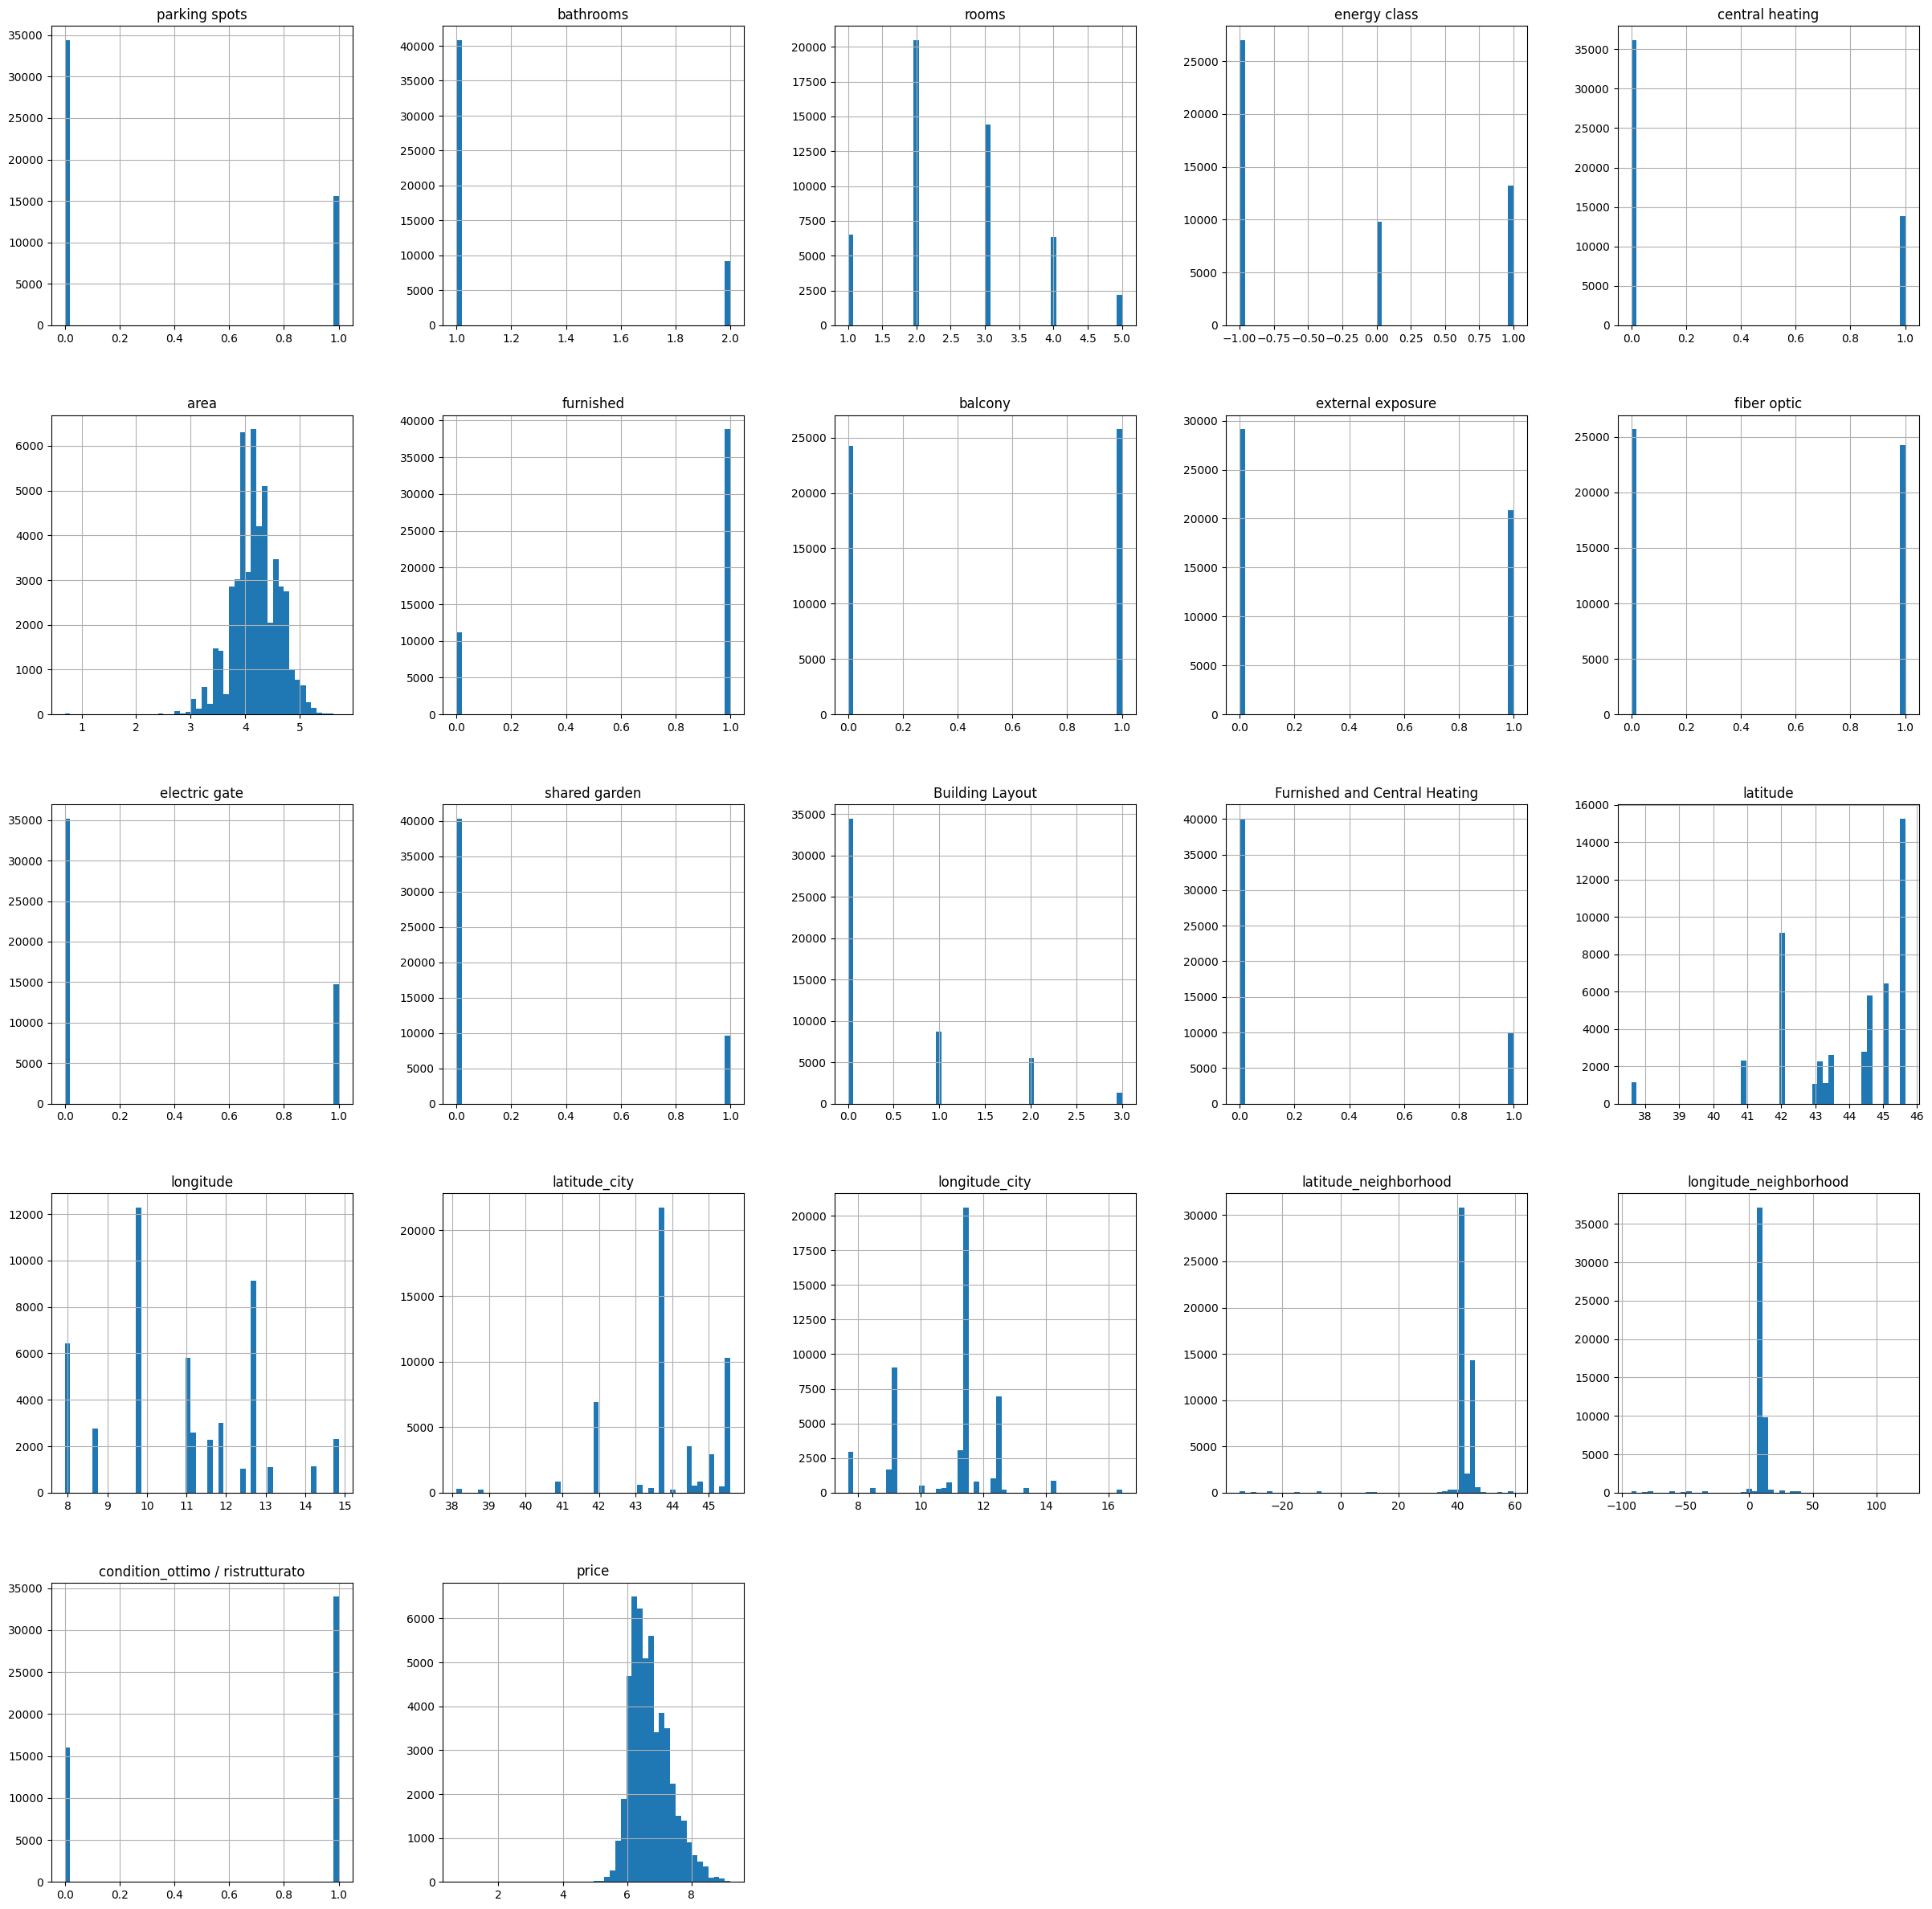

In [112]:
train_data.hist(figsize=(30, 30), bins=50)

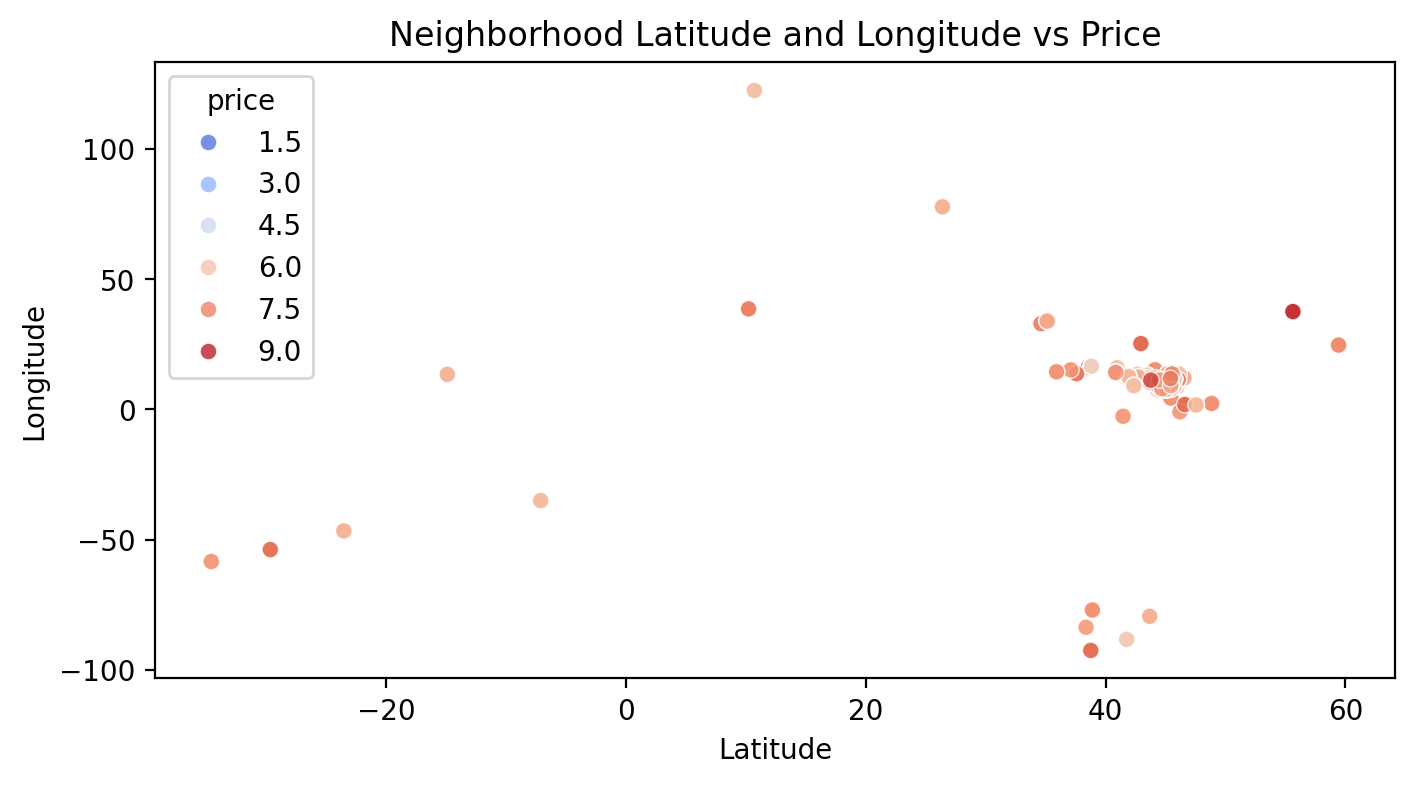

In [113]:
#plot neihborhood latitude and longitude vs price in a scatter plot
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=train_data,
                x='latitude_neighborhood',
                y='longitude_neighborhood',
                hue='price',
                palette='coolwarm',
                alpha=0.8)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Neighborhood Latitude and Longitude vs Price')
plt.show()

<Axes: >

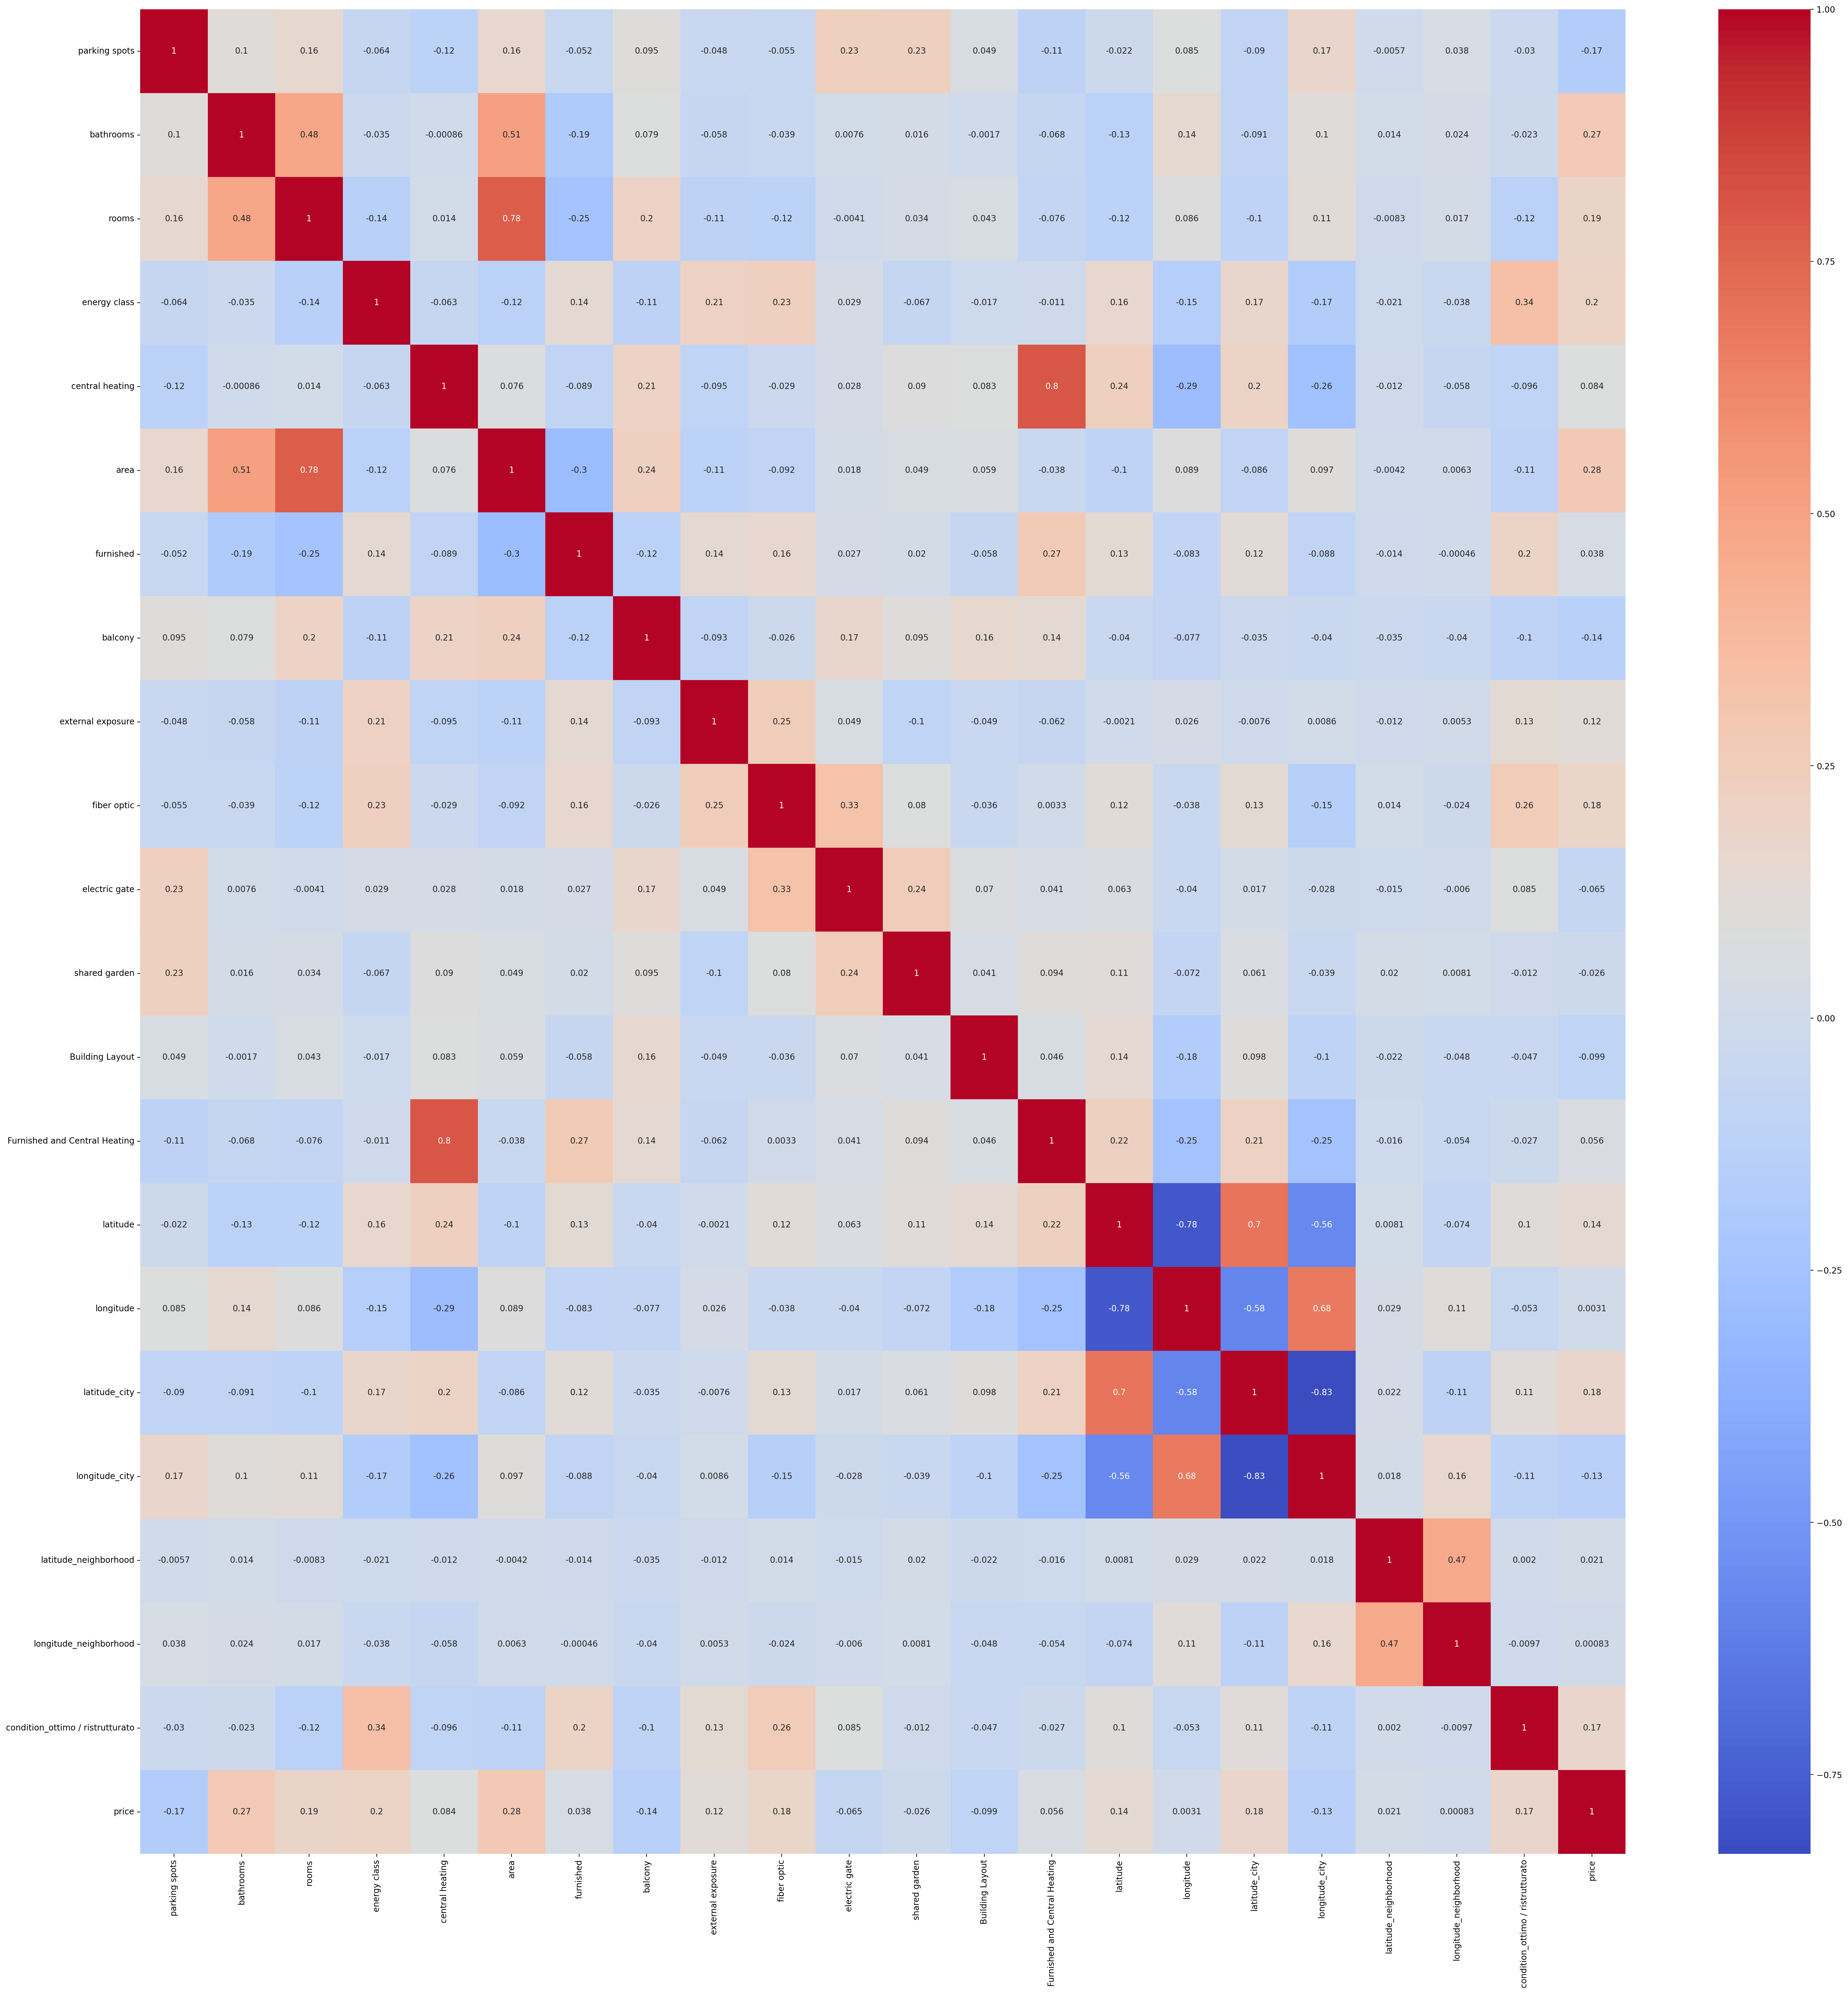

In [114]:
plt.figure(figsize=(40, 40), dpi=200)
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [115]:
train_data.head()

parking spots  bathrooms  rooms  energy class  central heating  area  \
86782              0          1      3            -1                0  3.93   
47548              1          1      2            -1                0  4.26   
87618              0          1      2            -1                0  4.19   
3552               0          2      3             0                1  4.77   
67422              0          1      1             0                1  3.71   

       furnished  balcony  external exposure  fiber optic  ...  \
86782          0        1                  0            0  ...   
47548          1        0                  0            1  ...   
87618          1        1                  0            1  ...   
3552           1        1                  0            0  ...   
67422          1        0                  0            0  ...   

       Building Layout  Furnished and Central Heating  latitude  longitude  \
86782                2                              0     45.57       9.77   
47548                0                              0     44.48       8.70   
87618                0                              0     45.57       9.77   
3552                 0                              1     45.57       9.77   
67422                0                              1     45.57       9.77   

       latitude_city  longitude_city  latitude_neighborhood  \
86782          43.70           11.39                  47.55   
47548          44.41            8.93                  42.35   
87618          45.46            9.19                  45.52   
3552           45.46            9.19                  38.90   
67422          45.46            9.19                  45.48   

       longitude_neighborhood  condition_ottimo / ristrutturato  price  
86782                    1.73                                 0   6.22  
47548                    9.13                                 1   5.99  
87618                    9.17                                 0   6.91  
3552                   -77.04                                 1   7.70  
67422                    9.12                                 1   6.75  

[5 rows x 22 columns]

In [116]:
# %pip install scikit-learn

## Prediction using RandomForestRegressor Algorithm

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

e:\Work Study Files\Github Repos\italy-rent-prediction\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6805853498950476

In [118]:
# from sklearn.model_selection import GridSearchCV

# param_grid = { 
#     'n_estimators': [200, 250, 300], #500
#     'max_features': [4, 8, 16], #8
#     'min_samples_split': [3,  6,  9] #6
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# grid_search.fit(X_train, y_train)

# print(grid_search.best_estimator_)
# grid_search.best_estimator_.score(X_test, y_test)

In [119]:
# ====================================================================
# 🚀 OPTIMIZED MODEL TRAINING - ADDRESSING OVERFITTING
# ====================================================================
# Hardware: Ryzen 3200G (4 cores) + GTX 1650 + 16GB RAM
# Key changes:
#   1. Reduced trees: 200 (from 500) for faster training
#   2. Limited depth: max_depth=15 (from 25) to prevent overfitting
#   3. Stronger regularization: min_samples_leaf=5, max_samples=0.8
#   4. Optimized for 4-core CPU: n_jobs=4
# ====================================================================

import time
start_time = time.time()

best_forest = RandomForestRegressor(
    n_estimators=200,           # Reduced from 500 - faster training, less overfitting
    max_depth=15,               # Limited depth to prevent overfitting
    max_features='sqrt',        # sqrt(21) ≈ 4.6 features per split
    min_samples_split=10,       # Require at least 10 samples to split
    min_samples_leaf=5,         # Require at least 5 samples per leaf
    max_samples=0.8,            # Use 80% of data for each tree (bootstrap sampling)
    n_jobs=4,                   # Optimized for 4-core Ryzen 3200G
    random_state=42,
    oob_score=True              # Out-of-bag score for validation
)

print("🔧 Model configuration:")
print(f"   n_estimators: {best_forest.n_estimators}")
print(f"   max_depth: {best_forest.max_depth}")
print(f"   max_features: {best_forest.max_features}")
print(f"   min_samples_split: {best_forest.min_samples_split}")
print(f"   min_samples_leaf: {best_forest.min_samples_leaf}")
print(f"   max_samples: {best_forest.max_samples}")
print(f"   n_jobs: {best_forest.n_jobs}")
print(f"\n🎯 Training model...")

best_forest.fit(X_train, y_train.values.ravel())

elapsed_time = time.time() - start_time
print(f"✅ Training complete in {elapsed_time:.2f} seconds")
print(f"📊 Out-of-bag score (R²): {best_forest.oob_score_:.4f}")

# Evaluate performance
train_score_r2 = best_forest.score(X_train, y_train)
test_score_r2 = best_forest.score(X_test, y_test)

print(f"\n📈 Performance:")
print(f"   Train R²: {train_score_r2:.4f}")
print(f"   Test R²:  {test_score_r2:.4f}")
print(f"   Gap:      {train_score_r2 - test_score_r2:.4f}")

if train_score_r2 - test_score_r2 < 0.08:
    print(f"   ✅ Overfitting reduced to acceptable levels!")
elif train_score_r2 - test_score_r2 < 0.12:
    print(f"   ⚠️  Some overfitting remains, but improved")
else:
    print(f"   ❌ Significant overfitting still present")

🔧 Model configuration:
   n_estimators: 200
   max_depth: 15
   max_features: sqrt
   min_samples_split: 10
   min_samples_leaf: 5
   max_samples: 0.8
   n_jobs: 4

🎯 Training model...
✅ Training complete in 4.59 seconds
📊 Out-of-bag score (R²): 0.6748
✅ Training complete in 4.59 seconds
📊 Out-of-bag score (R²): 0.6748

📈 Performance:
   Train R²: 0.7179
   Test R²:  0.6621
   Gap:      0.0558
   ✅ Overfitting reduced to acceptable levels!

📈 Performance:
   Train R²: 0.7179
   Test R²:  0.6621
   Gap:      0.0558
   ✅ Overfitting reduced to acceptable levels!


## 🆚 Model Comparison: Gradient Boosting vs XGBoost

Let's compare alternative models to see if we can improve on Random Forest performance.

In [120]:
# ====================================================================
# 🌲 GRADIENT BOOSTING REGRESSOR
# ====================================================================
# Gradient Boosting builds trees sequentially, each correcting previous errors
# Often outperforms Random Forest on structured/tabular data
# ====================================================================

from sklearn.ensemble import GradientBoostingRegressor
import time

print("🔧 Training Gradient Boosting Regressor...")
start_time = time.time()

gb_model = GradientBoostingRegressor(
    n_estimators=200,           # Number of boosting stages
    max_depth=5,                # Shallow trees work better for boosting
    learning_rate=0.1,          # Shrinks contribution of each tree
    min_samples_split=10,       
    min_samples_leaf=5,
    max_features='sqrt',
    subsample=0.8,              # Use 80% of samples for each tree
    random_state=42,
    verbose=0
)

gb_model.fit(X_train, y_train.values.ravel())

elapsed_time = time.time() - start_time
print(f"✅ Training complete in {elapsed_time:.2f} seconds")

# Evaluate performance
gb_train_score = gb_model.score(X_train, y_train)
gb_test_score = gb_model.score(X_test, y_test)

print(f"\n📈 Gradient Boosting Performance:")
print(f"   Train R²: {gb_train_score:.4f}")
print(f"   Test R²:  {gb_test_score:.4f}")
print(f"   Gap:      {gb_train_score - gb_test_score:.4f}")

# Calculate additional metrics
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

# Convert to euros for interpretable metrics
gb_train_pred_euro = np.expm1(gb_train_pred)
gb_test_pred_euro = np.expm1(gb_test_pred)
y_train_euro = np.expm1(y_train.values.ravel())
y_test_euro = np.expm1(y_test.values.ravel())

from sklearn.metrics import mean_absolute_error, mean_squared_error

gb_train_mae = mean_absolute_error(y_train_euro, gb_train_pred_euro)
gb_test_mae = mean_absolute_error(y_test_euro, gb_test_pred_euro)
gb_train_rmse = np.sqrt(mean_squared_error(y_train_euro, gb_train_pred_euro))
gb_test_rmse = np.sqrt(mean_squared_error(y_test_euro, gb_test_pred_euro))

print(f"\n💰 Error Metrics (in Euros):")
print(f"   Train MAE:  €{gb_train_mae:.2f}")
print(f"   Test MAE:   €{gb_test_mae:.2f}")
print(f"   Train RMSE: €{gb_train_rmse:.2f}")
print(f"   Test RMSE:  €{gb_test_rmse:.2f}")

🔧 Training Gradient Boosting Regressor...
✅ Training complete in 4.14 seconds

📈 Gradient Boosting Performance:
   Train R²: 0.6887
   Test R²:  0.6573
   Gap:      0.0314

💰 Error Metrics (in Euros):
   Train MAE:  €253.89
   Test MAE:   €264.76
   Train RMSE: €519.85
   Test RMSE:  €540.51


In [121]:
# ====================================================================
# ⚡ XGBOOST REGRESSOR
# ====================================================================
# XGBoost is an optimized gradient boosting implementation
# Known for superior performance on tabular data and competitions
# Install: pip install xgboost
# ====================================================================

try:
    import xgboost as xgb
    
    print("🔧 Training XGBoost Regressor...")
    start_time = time.time()
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=200,           # Number of boosting rounds
        max_depth=5,                # Maximum tree depth
        learning_rate=0.1,          # Step size shrinkage
        min_child_weight=5,         # Minimum sum of instance weight in child
        subsample=0.8,              # Subsample ratio of training instances
        colsample_bytree=0.8,       # Subsample ratio of columns per tree
        gamma=0,                    # Minimum loss reduction for split
        reg_alpha=0.1,              # L1 regularization
        reg_lambda=1.0,             # L2 regularization
        random_state=42,
        n_jobs=4,
        verbosity=0
    )
    
    xgb_model.fit(X_train, y_train.values.ravel())
    
    elapsed_time = time.time() - start_time
    print(f"✅ Training complete in {elapsed_time:.2f} seconds")
    
    # Evaluate performance
    xgb_train_score = xgb_model.score(X_train, y_train)
    xgb_test_score = xgb_model.score(X_test, y_test)
    
    print(f"\n📈 XGBoost Performance:")
    print(f"   Train R²: {xgb_train_score:.4f}")
    print(f"   Test R²:  {xgb_test_score:.4f}")
    print(f"   Gap:      {xgb_train_score - xgb_test_score:.4f}")
    
    # Calculate additional metrics
    xgb_train_pred = xgb_model.predict(X_train)
    xgb_test_pred = xgb_model.predict(X_test)
    
    # Convert to euros
    xgb_train_pred_euro = np.expm1(xgb_train_pred)
    xgb_test_pred_euro = np.expm1(xgb_test_pred)
    
    xgb_train_mae = mean_absolute_error(y_train_euro, xgb_train_pred_euro)
    xgb_test_mae = mean_absolute_error(y_test_euro, xgb_test_pred_euro)
    xgb_train_rmse = np.sqrt(mean_squared_error(y_train_euro, xgb_train_pred_euro))
    xgb_test_rmse = np.sqrt(mean_squared_error(y_test_euro, xgb_test_pred_euro))
    
    print(f"\n💰 Error Metrics (in Euros):")
    print(f"   Train MAE:  €{xgb_train_mae:.2f}")
    print(f"   Test MAE:   €{xgb_test_mae:.2f}")
    print(f"   Train RMSE: €{xgb_train_rmse:.2f}")
    print(f"   Test RMSE:  €{xgb_test_rmse:.2f}")
    
    xgb_available = True
    
except ImportError:
    print("⚠️  XGBoost not installed. Install with: pip install xgboost")
    xgb_available = False

🔧 Training XGBoost Regressor...
✅ Training complete in 0.90 seconds

📈 XGBoost Performance:
   Train R²: 0.7001
   Test R²:  0.6653
   Gap:      0.0347

💰 Error Metrics (in Euros):
   Train MAE:  €246.12
   Test MAE:   €256.44
   Train RMSE: €503.47
   Test RMSE:  €521.33


In [122]:
# ====================================================================
# 📊 COMPREHENSIVE MODEL COMPARISON
# ====================================================================

import pandas as pd

# Collect all metrics
models_comparison = {
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Train R²': [train_score_r2, gb_train_score],
    'Test R²': [test_score_r2, gb_test_score],
    'Overfitting Gap': [train_score_r2 - test_score_r2, gb_train_score - gb_test_score],
    'Test MAE (€)': [mean_absolute_error(y_test_euro, np.expm1(best_forest.predict(X_test))), gb_test_mae],
    'Test RMSE (€)': [np.sqrt(mean_squared_error(y_test_euro, np.expm1(best_forest.predict(X_test)))), gb_test_rmse]
}

if xgb_available:
    models_comparison['Model'].append('XGBoost')
    models_comparison['Train R²'].append(xgb_train_score)
    models_comparison['Test R²'].append(xgb_test_score)
    models_comparison['Overfitting Gap'].append(xgb_train_score - xgb_test_score)
    models_comparison['Test MAE (€)'].append(xgb_test_mae)
    models_comparison['Test RMSE (€)'].append(xgb_test_rmse)

comparison_df = pd.DataFrame(models_comparison)
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

print("=" * 80)
print("🏆 MODEL COMPARISON RESULTS")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("\n" + "=" * 80)

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_test_r2 = comparison_df.iloc[0]['Test R²']

print(f"\n🥇 Best Model: {best_model_name}")
print(f"   Test R²: {best_test_r2:.4f}")
print(f"   Test MAE: €{comparison_df.iloc[0]['Test MAE (€)']:.2f}")
print(f"   Overfitting Gap: {comparison_df.iloc[0]['Overfitting Gap']:.4f}")

# Recommendations
print("\n💡 Recommendations:")
if best_model_name == 'Random Forest':
    print("   ✓ Random Forest performs best - keep current model")
elif best_model_name == 'Gradient Boosting':
    print("   ✓ Gradient Boosting outperforms - consider switching")
    print("   ✓ Update production model with: gb_model")
elif best_model_name == 'XGBoost':
    print("   ✓ XGBoost outperforms - consider switching")
    print("   ✓ Update production model with: xgb_model")

if comparison_df.iloc[0]['Overfitting Gap'] > 0.08:
    print("   ⚠️  Overfitting still present - consider:")
    print("      • Further regularization (increase min_samples_leaf)")
    print("      • Feature selection (remove low-importance features)")
    print("      • More training data")
    print("      • Cross-validation for robust evaluation")

🏆 MODEL COMPARISON RESULTS
            Model  Train R²  Test R²  Overfitting Gap  Test MAE (€)  Test RMSE (€)
          XGBoost      0.70     0.67             0.03        256.44         521.33
    Random Forest      0.72     0.66             0.06        264.94         555.36
Gradient Boosting      0.69     0.66             0.03        264.76         540.51


🥇 Best Model: XGBoost
   Test R²: 0.6653
   Test MAE: €256.44
   Overfitting Gap: 0.0347

💡 Recommendations:
   ✓ XGBoost outperforms - consider switching
   ✓ Update production model with: xgb_model


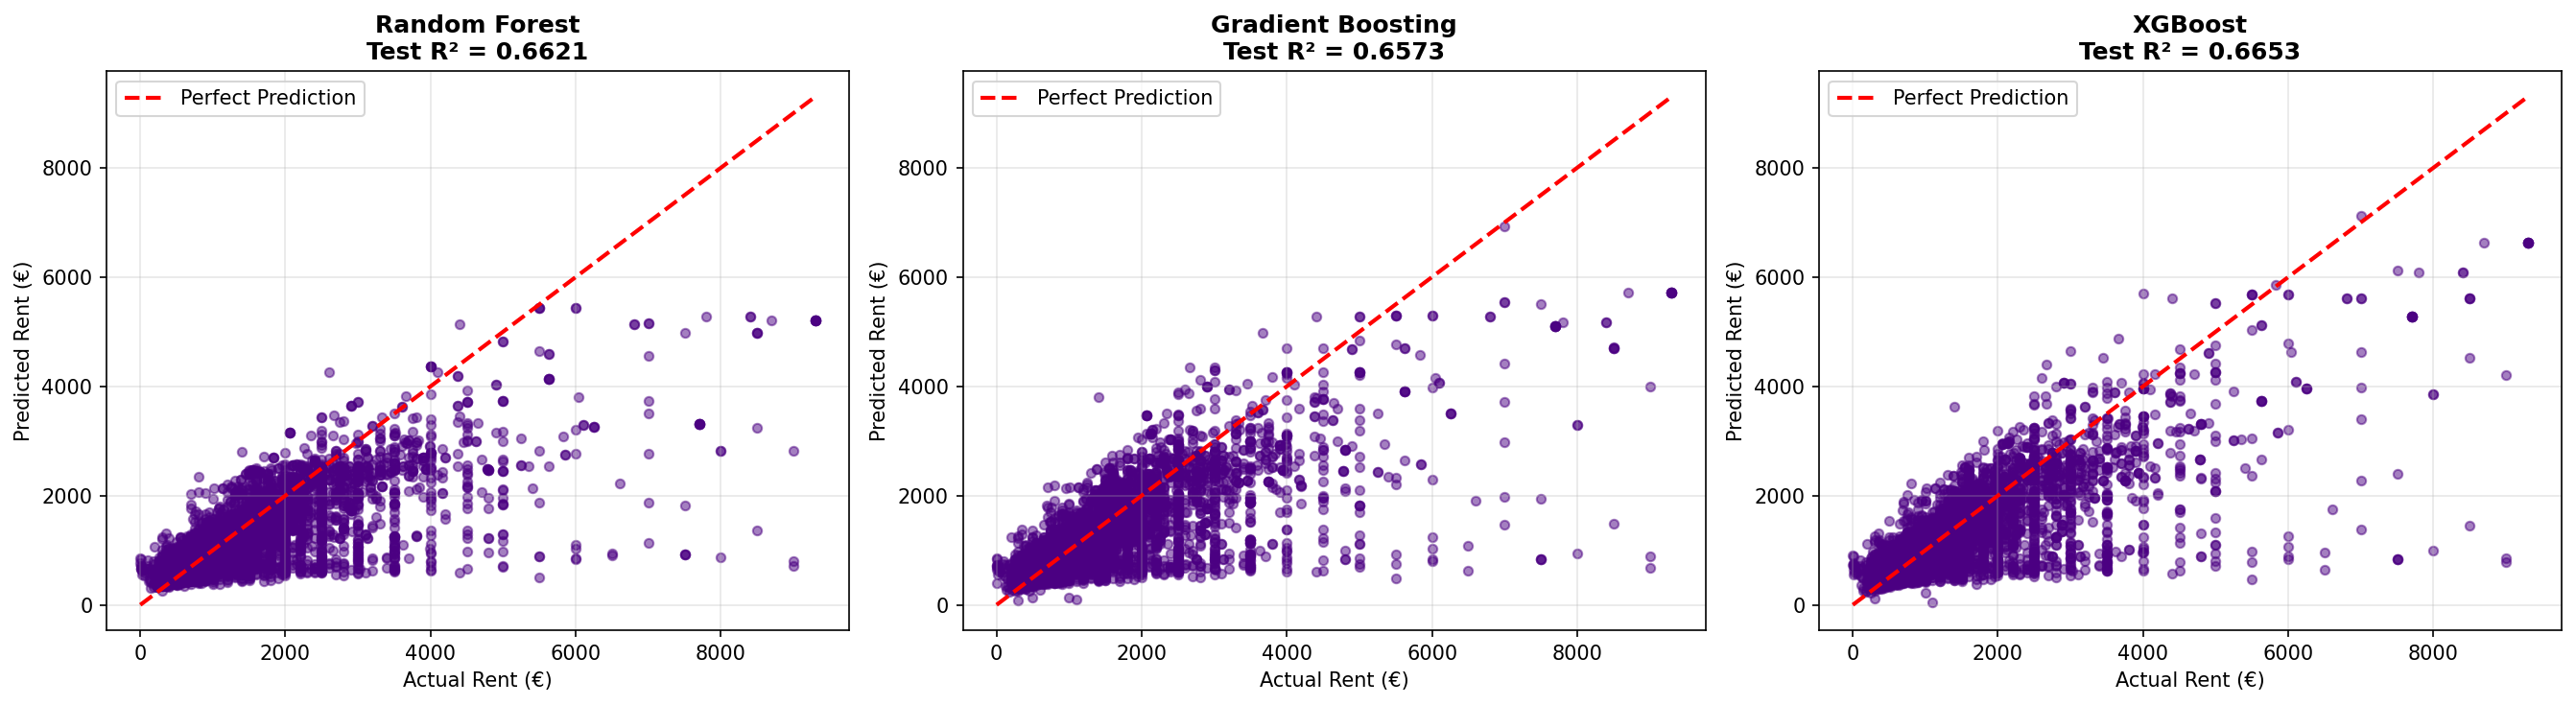

📊 The plot shows how well each model's predictions align with actual values.


In [123]:
# ====================================================================
# 📈 VISUAL COMPARISON: ACTUAL VS PREDICTED
# ====================================================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3 if xgb_available else 2, figsize=(18 if xgb_available else 12, 5), dpi=150)

models_to_plot = [
    ('Random Forest', best_forest.predict(X_test)),
    ('Gradient Boosting', gb_test_pred)
]

if xgb_available:
    models_to_plot.append(('XGBoost', xgb_test_pred))

for idx, (model_name, predictions) in enumerate(models_to_plot):
    ax = axes[idx] if xgb_available or idx < 2 else axes
    
    # Convert to euros
    pred_euro = np.expm1(predictions)
    
    # Plot
    ax.scatter(y_test_euro, pred_euro, alpha=0.5, s=20, c='indigo')
    ax.plot([y_test_euro.min(), y_test_euro.max()], 
            [y_test_euro.min(), y_test_euro.max()], 
            'r--', lw=2, label='Perfect Prediction')
    
    # Calculate R²
    r2 = gb_test_score if model_name == 'Gradient Boosting' else (xgb_test_score if model_name == 'XGBoost' else test_score_r2)
    
    ax.set_title(f'{model_name}\nTest R² = {r2:.4f}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Actual Rent (€)', fontsize=10)
    ax.set_ylabel('Predicted Rent (€)', fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 The plot shows how well each model's predictions align with actual values.")

In [124]:
# ====================================================================
# 🎯 CROSS-VALIDATION COMPARISON
# ====================================================================
# Perform k-fold cross-validation for robust comparison
# This helps identify if performance differences are statistically significant
# ====================================================================

from sklearn.model_selection import cross_val_score

print("🔄 Running 5-fold cross-validation for all models...")
print("   (This may take a few minutes...)\n")

# Random Forest CV
print("📊 Random Forest:")
rf_cv_scores = cross_val_score(best_forest, X_train, y_train.values.ravel(), 
                                cv=5, scoring='r2', n_jobs=4)
print(f"   CV R² Scores: {rf_cv_scores}")
print(f"   Mean: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Gradient Boosting CV
print("\n📊 Gradient Boosting:")
gb_cv_scores = cross_val_score(gb_model, X_train, y_train.values.ravel(), 
                               cv=5, scoring='r2', n_jobs=4)
print(f"   CV R² Scores: {gb_cv_scores}")
print(f"   Mean: {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std() * 2:.4f})")

# XGBoost CV (if available)
if xgb_available:
    print("\n📊 XGBoost:")
    xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train.values.ravel(), 
                                    cv=5, scoring='r2', n_jobs=4)
    print(f"   CV R² Scores: {xgb_cv_scores}")
    print(f"   Mean: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std() * 2:.4f})")

print("\n" + "="*80)
print("💡 Cross-validation provides a more robust performance estimate")
print("   Lower standard deviation = more consistent performance")
print("="*80)

🔄 Running 5-fold cross-validation for all models...
   (This may take a few minutes...)

📊 Random Forest:
   CV R² Scores: [0.65496953 0.67949718 0.67265216 0.68154306 0.66336796]
   Mean: 0.6704 (+/- 0.0200)

📊 Gradient Boosting:
   CV R² Scores: [0.65736081 0.68023105 0.67059966 0.68245246 0.65908186]
   Mean: 0.6699 (+/- 0.0208)

📊 XGBoost:
   CV R² Scores: [0.66684152 0.68417188 0.67855324 0.68575024 0.67011336]
   Mean: 0.6771 (+/- 0.0150)

💡 Cross-validation provides a more robust performance estimate
   Lower standard deviation = more consistent performance


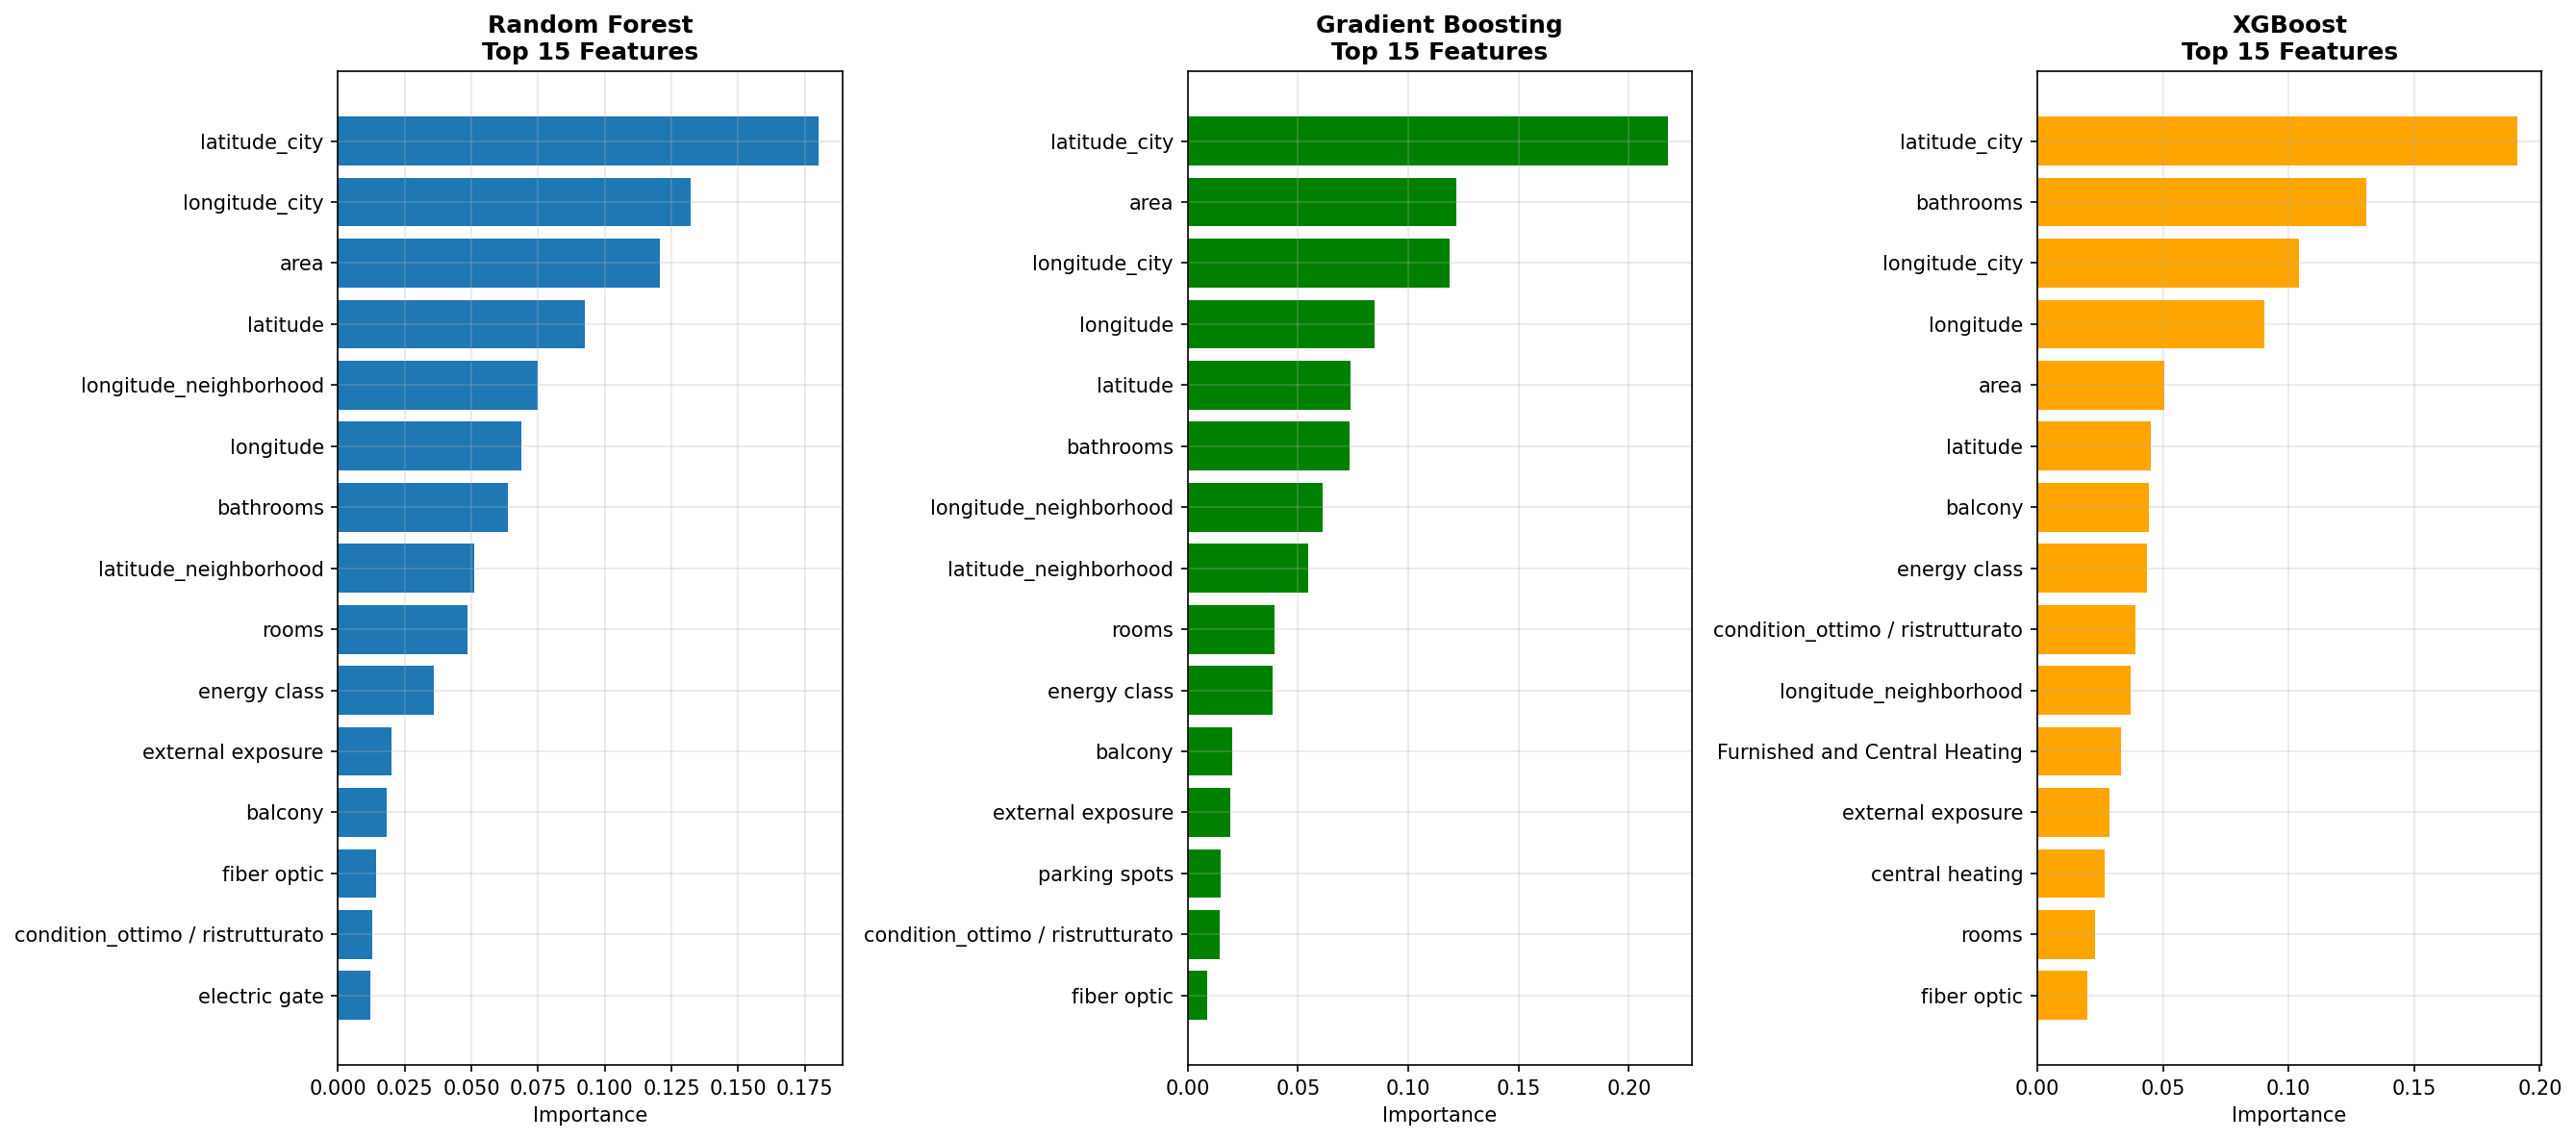

📊 Feature importance comparison helps understand model decision-making


In [125]:
# ====================================================================
# 🔍 FEATURE IMPORTANCE COMPARISON
# ====================================================================
# Compare which features each model considers most important
# ====================================================================

fig, axes = plt.subplots(1, 3 if xgb_available else 2, figsize=(18 if xgb_available else 12, 8), dpi=150)

# Random Forest
top_n = 15
rf_importances = best_forest.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1][:top_n]

ax = axes[0]
ax.barh(range(top_n), rf_importances[rf_indices][::-1])
ax.set_yticks(range(top_n))
ax.set_yticklabels(X_train.columns[rf_indices][::-1])
ax.set_xlabel('Importance')
ax.set_title('Random Forest\nTop 15 Features', fontweight='bold')
ax.grid(True, alpha=0.3)

# Gradient Boosting
gb_importances = gb_model.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1][:top_n]

ax = axes[1]
ax.barh(range(top_n), gb_importances[gb_indices][::-1], color='green')
ax.set_yticks(range(top_n))
ax.set_yticklabels(X_train.columns[gb_indices][::-1])
ax.set_xlabel('Importance')
ax.set_title('Gradient Boosting\nTop 15 Features', fontweight='bold')
ax.grid(True, alpha=0.3)

# XGBoost
if xgb_available:
    xgb_importances = xgb_model.feature_importances_
    xgb_indices = np.argsort(xgb_importances)[::-1][:top_n]
    
    ax = axes[2]
    ax.barh(range(top_n), xgb_importances[xgb_indices][::-1], color='orange')
    ax.set_yticks(range(top_n))
    ax.set_yticklabels(X_train.columns[xgb_indices][::-1])
    ax.set_xlabel('Importance')
    ax.set_title('XGBoost\nTop 15 Features', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Feature importance comparison helps understand model decision-making")

In [138]:
# ====================================================================
# 💾 SAVE THE BEST MODEL
# ====================================================================
# Based on comparison results, save the best performing model
# ====================================================================

# Determine best model based on test R²
best_model_dict = {
    'Random Forest': (best_forest, test_score_r2),
    'Gradient Boosting': (gb_model, gb_test_score)
}

if xgb_available:
    best_model_dict['XGBoost'] = (xgb_model, xgb_test_score)

# Find the best model
best_name = max(best_model_dict, key=lambda k: best_model_dict[k][1])
best_model_to_save, best_r2 = best_model_dict[best_name]

print(f"🏆 Best performing model: {best_name}")
print(f"   Test R²: {best_r2:.4f}")
print(f"\n💡 To update production model, uncomment the save line below:")
print(f"   joblib.dump({best_name.lower().replace(' ', '_')}_model, 'rent_prediction_model/rent_model_v2.pkl')")

# Uncomment to save the best model
import joblib
model_path = 'rent_prediction_model/rent_model_v2.pkl'
joblib.dump(best_model_to_save, model_path)
print(f"\n✅ Best model ({best_name}) saved to {model_path}")

🏆 Best performing model: XGBoost
   Test R²: 0.6653

💡 To update production model, uncomment the save line below:
   joblib.dump(xgboost_model, 'rent_prediction_model/rent_model_v2.pkl')

✅ Best model (XGBoost) saved to rent_prediction_model/rent_model_v2.pkl


## 🔬 Model Performance Deep Dive

Let's analyze prediction errors to understand where models struggle most.

In [131]:
# ====================================================================
# 📉 ERROR ANALYSIS: WHERE DO MODELS STRUGGLE?
# ====================================================================

# Calculate prediction errors for best model
if best_name == 'Random Forest':
    test_predictions = best_forest.predict(X_test)
elif best_name == 'Gradient Boosting':
    test_predictions = gb_test_pred
else:
    test_predictions = xgb_test_pred

# Convert to euros
test_pred_euro = np.expm1(test_predictions)
y_test_array = y_test.values.ravel()
y_test_euro_array = np.expm1(y_test_array)

# Calculate absolute and percentage errors
abs_errors = np.abs(test_pred_euro - y_test_euro_array)
pct_errors = (abs_errors / y_test_euro_array) * 100

# Error statistics
print("=" * 80)
print(f"📊 ERROR ANALYSIS FOR {best_name.upper()}")
print("=" * 80)
print(f"\n💰 Absolute Error Statistics (in Euros):")
print(f"   Mean Absolute Error: €{abs_errors.mean():.2f}")
print(f"   Median Absolute Error: €{np.median(abs_errors):.2f}")
print(f"   25th Percentile: €{np.percentile(abs_errors, 25):.2f}")
print(f"   75th Percentile: €{np.percentile(abs_errors, 75):.2f}")
print(f"   95th Percentile: €{np.percentile(abs_errors, 95):.2f}")
print(f"   Max Error: €{abs_errors.max():.2f}")

print(f"\n📊 Percentage Error Statistics:")
print(f"   Mean Percentage Error: {pct_errors.mean():.2f}%")
print(f"   Median Percentage Error: {np.median(pct_errors):.2f}%")
print(f"   Predictions within ±10%: {(pct_errors <= 10).sum() / len(pct_errors) * 100:.2f}%")
print(f"   Predictions within ±20%: {(pct_errors <= 20).sum() / len(pct_errors) * 100:.2f}%")
print(f"   Predictions within ±30%: {(pct_errors <= 30).sum() / len(pct_errors) * 100:.2f}%")

print("\n" + "=" * 80)

# Identify problematic predictions
worst_predictions_idx = np.argsort(abs_errors)[-5:][::-1]

print("\n⚠️  TOP 5 WORST PREDICTIONS:")
print("=" * 80)
for i, idx in enumerate(worst_predictions_idx, 1):
    actual = y_test_euro_array[idx]
    predicted = test_pred_euro[idx]
    error = abs_errors[idx]
    pct_error = pct_errors[idx]
    print(f"{i}. Actual: €{actual:.2f} | Predicted: €{predicted:.2f} | Error: €{error:.2f} ({pct_error:.1f}%)")

print("\n💡 These large errors suggest:")
print("   • Outliers or unusual properties in test set")
print("   • Missing features that explain edge cases")
print("   • Possible data quality issues")

📊 ERROR ANALYSIS FOR XGBOOST

💰 Absolute Error Statistics (in Euros):
   Mean Absolute Error: €256.44
   Median Absolute Error: €129.49
   25th Percentile: €57.25
   75th Percentile: €262.25
   95th Percentile: €916.76
   Max Error: €8211.57

📊 Percentage Error Statistics:
   Mean Percentage Error: 40.66%
   Median Percentage Error: 16.76%
   Predictions within ±10%: 31.83%
   Predictions within ±20%: 57.23%
   Predictions within ±30%: 73.71%


⚠️  TOP 5 WORST PREDICTIONS:
1. Actual: €9000.00 | Predicted: €788.43 | Error: €8211.57 (91.2%)
2. Actual: €9000.00 | Predicted: €856.35 | Error: €8143.65 (90.5%)
3. Actual: €8500.00 | Predicted: €1451.16 | Error: €7048.84 (82.9%)
4. Actual: €8000.00 | Predicted: €1000.14 | Error: €6999.86 (87.5%)
5. Actual: €7500.00 | Predicted: €828.12 | Error: €6671.88 (89.0%)

💡 These large errors suggest:
   • Outliers or unusual properties in test set
   • Missing features that explain edge cases
   • Possible data quality issues


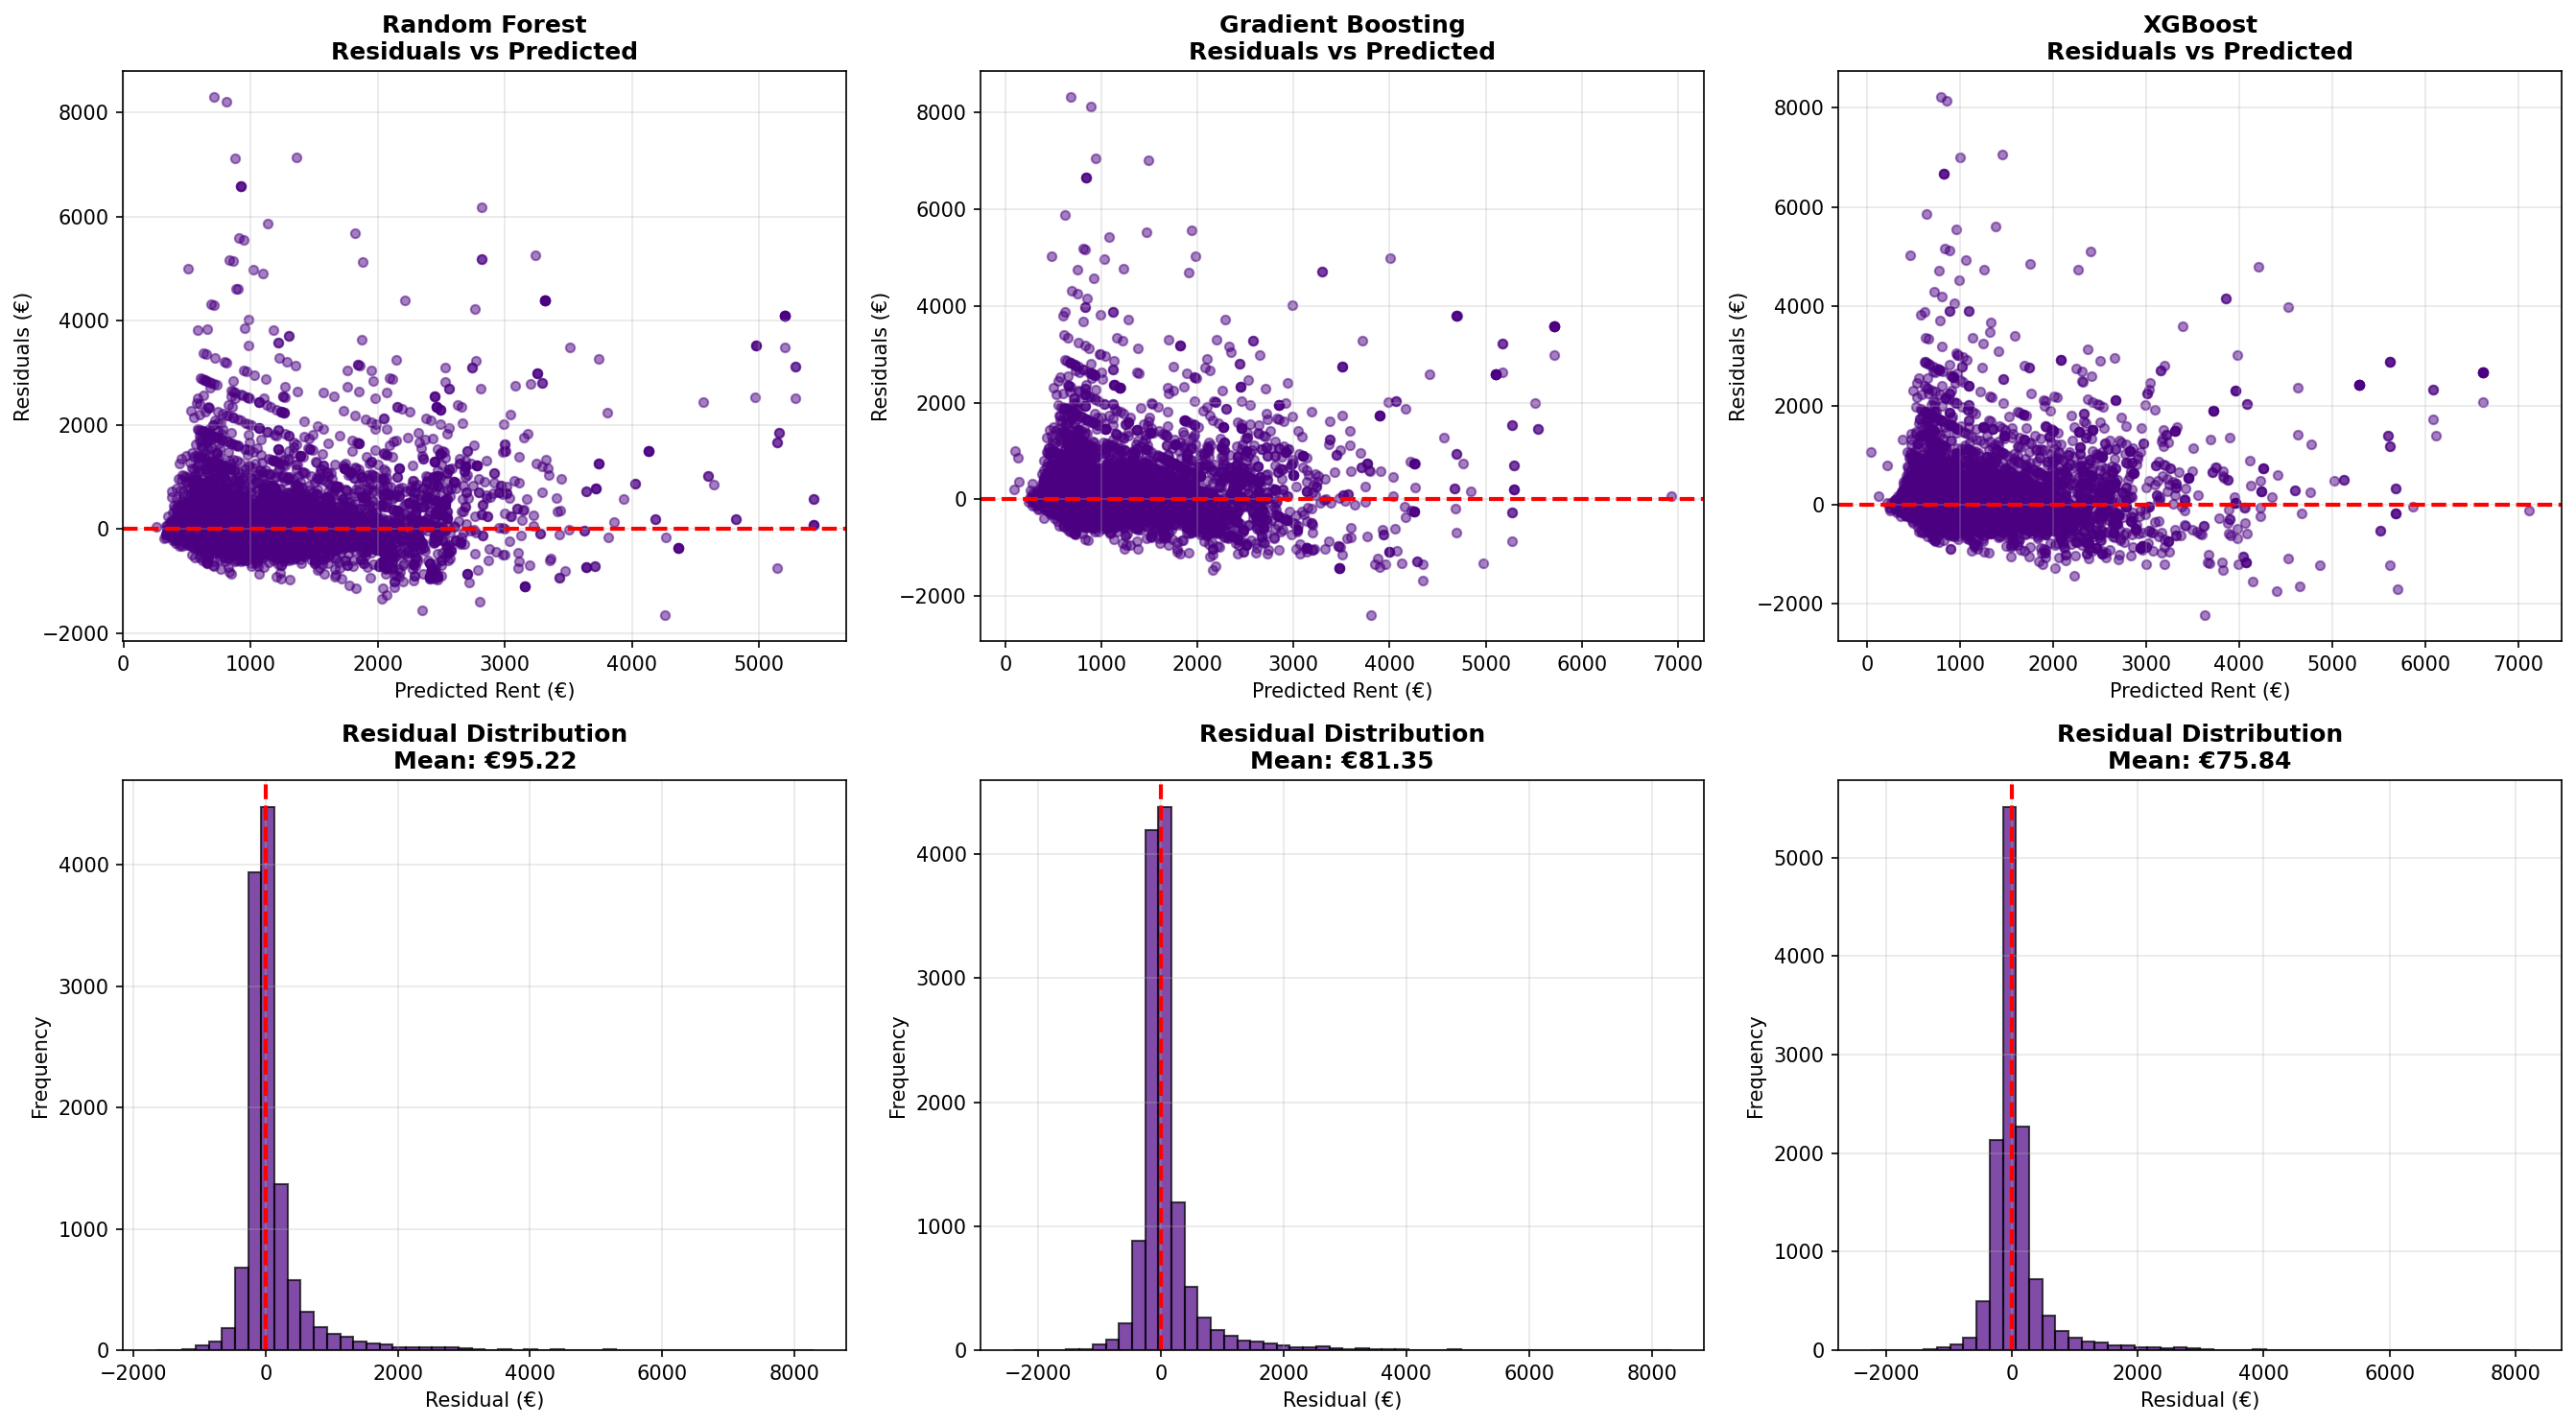

📊 Good residual plots should show:
   • Random scatter around zero (no patterns)
   • Symmetric distribution centered at zero
   • Constant variance across predicted values


In [132]:
# ====================================================================
# 📊 RESIDUAL ANALYSIS FOR ALL MODELS
# ====================================================================

fig, axes = plt.subplots(2, 3 if xgb_available else 2, figsize=(18 if xgb_available else 12, 10), dpi=150)

models_for_residuals = [
    ('Random Forest', best_forest.predict(X_test)),
    ('Gradient Boosting', gb_test_pred)
]

if xgb_available:
    models_for_residuals.append(('XGBoost', xgb_test_pred))

for idx, (model_name, predictions) in enumerate(models_for_residuals):
    # Convert to euros
    pred_euro = np.expm1(predictions)
    residuals = y_test_euro_array - pred_euro
    
    # Top plot: Residuals vs Predicted
    ax1 = axes[0, idx]
    ax1.scatter(pred_euro, residuals, alpha=0.5, s=20, c='indigo')
    ax1.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax1.set_title(f'{model_name}\nResiduals vs Predicted', fontweight='bold')
    ax1.set_xlabel('Predicted Rent (€)')
    ax1.set_ylabel('Residuals (€)')
    ax1.grid(True, alpha=0.3)
    
    # Bottom plot: Residual Distribution
    ax2 = axes[1, idx]
    ax2.hist(residuals, bins=50, alpha=0.7, color='indigo', edgecolor='black')
    ax2.axvline(x=0, color='r', linestyle='--', linewidth=2)
    ax2.set_title(f'Residual Distribution\nMean: €{residuals.mean():.2f}', fontweight='bold')
    ax2.set_xlabel('Residual (€)')
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Good residual plots should show:")
print("   • Random scatter around zero (no patterns)")
print("   • Symmetric distribution centered at zero")
print("   • Constant variance across predicted values")

## 🎯 Next Steps & Recommendations

Based on the model comparison results, here are actionable next steps to improve performance.

In [133]:
# ====================================================================
# 🎯 ACTIONABLE RECOMMENDATIONS
# ====================================================================

print("=" * 80)
print("🎯 RECOMMENDATIONS FOR IMPROVING MODEL PERFORMANCE")
print("=" * 80)

print("\n1️⃣  MODEL SELECTION:")
print(f"   Current Best: {best_name} (Test R² = {best_r2:.4f})")

if best_r2 < 0.70:
    print("   ⚠️  Performance is below 0.70 - Consider:")
    print("      • Ensemble methods (stack/blend multiple models)")
    print("      • Collect more data or augment existing data")
    print("      • Investigate data quality issues")
elif best_r2 < 0.80:
    print("   ⚠️  Performance is moderate - Room for improvement:")
    print("      • Feature engineering (interactions, polynomials)")
    print("      • Hyperparameter tuning with GridSearchCV/Optuna")
    print("      • Try stacking ensemble")
else:
    print("   ✅ Performance is good - Focus on:")
    print("      • Model interpretation and explainability")
    print("      • Production deployment and monitoring")

print("\n2️⃣  DATA IMPROVEMENTS:")
print("   • Collect additional property features (age, condition details)")
print("   • Enrich location data (POI distances, neighborhood quality)")
print("   • Handle outliers more carefully (robust scaling)")
print("   • Investigate properties with large prediction errors")

print("\n3️⃣  FEATURE ENGINEERING:")
print("   • Create interaction features (area × rooms, location × amenities)")
print("   • Polynomial features for key predictors")
print("   • Time-based features if temporal data available")
print("   • Target encoding for high-cardinality categorical features")

print("\n4️⃣  MODEL OPTIMIZATION:")
print("   • Hyperparameter tuning (use Optuna for efficiency)")
print("   • Ensemble methods:")
print("      - Voting Regressor (combine RF, GB, XGB predictions)")
print("      - Stacking Regressor (meta-model on top)")
print("   • Try LightGBM (faster than XGBoost, similar performance)")

print("\n5️⃣  VALIDATION STRATEGY:")
print("   • Use time-based split if data has temporal component")
print("   • Stratified K-fold based on price ranges")
print("   • Out-of-distribution validation (test on different regions)")

print("\n6️⃣  IF R² IS FUNDAMENTALLY LIMITED BY DATA:")
print("   • Some variance may be inherent/unexplainable")
print("   • Focus on reliable predictions within confidence intervals")
print("   • Use prediction intervals instead of point estimates")
print("   • Consider quantile regression for robustness")

print("\n" + "=" * 80)
print("💡 Priority: Start with #1 (use best model) and #2 (data quality)")
print("=" * 80)

🎯 RECOMMENDATIONS FOR IMPROVING MODEL PERFORMANCE

1️⃣  MODEL SELECTION:
   Current Best: XGBoost (Test R² = 0.6653)
   ⚠️  Performance is below 0.70 - Consider:
      • Ensemble methods (stack/blend multiple models)
      • Collect more data or augment existing data
      • Investigate data quality issues

2️⃣  DATA IMPROVEMENTS:
   • Collect additional property features (age, condition details)
   • Enrich location data (POI distances, neighborhood quality)
   • Handle outliers more carefully (robust scaling)
   • Investigate properties with large prediction errors

3️⃣  FEATURE ENGINEERING:
   • Create interaction features (area × rooms, location × amenities)
   • Polynomial features for key predictors
   • Time-based features if temporal data available
   • Target encoding for high-cardinality categorical features

4️⃣  MODEL OPTIMIZATION:
   • Hyperparameter tuning (use Optuna for efficiency)
   • Ensemble methods:
      - Voting Regressor (combine RF, GB, XGB predictions)
      -

### ? Grid Search with Caching (OPTIONAL - Only run if you want to experiment with different parameters)

**Note:** Grid Search is expensive. The optimized model above already uses tested parameters.
Run this only if you want to fine-tune further. Results will be cached to avoid re-running.

In [134]:
# # Grid Search with Caching - OPTIONAL (only run if experimenting)
# # This cell will use cached results if available, saving ~10-15 minutes

# import joblib
# import os
# from sklearn.model_selection import GridSearchCV

# # Cache file for grid search results
# grid_search_cache = 'geocoding_cache/grid_search_results.pkl'

# # Check if cached results exist
# if os.path.exists(grid_search_cache):
#     print("📦 Loading cached Grid Search results...")
#     grid_search = joblib.load(grid_search_cache)
#     print(f"✅ Loaded from cache!")
#     print(f"   Best Parameters: {grid_search.best_params_}")
#     print(f"   Best CV Score (R²): {-grid_search.best_score_:.4f}")  # Negative because scoring was neg_mean_squared_error
# else:
#     print("🔍 No cache found. Running Grid Search...")
#     print("⏱️  This will take 10-15 minutes...")
    
#     # Smaller grid for faster experimentation
#     param_grid = {
#         'n_estimators': [150, 200, 250],
#         'max_depth': [12, 15, 18],
#         'max_features': ['sqrt', 0.4],
#         'min_samples_split': [8, 10, 12],
#         'min_samples_leaf': [4, 5, 6],
#         'max_samples': [0.7, 0.8, 0.9]
#     }

#     grid_search = GridSearchCV(
#         RandomForestRegressor(random_state=42, n_jobs=4),
#         param_grid,
#         cv=3,  # 3-fold CV for speed
#         scoring='r2',  # Changed to R² for easier interpretation
#         verbose=2,
#         n_jobs=4
#     )
    
#     grid_search.fit(X_train, y_train.values.ravel())
    
#     # Save to cache
#     joblib.dump(grid_search, grid_search_cache)
#     print(f"\n💾 Results cached to: {grid_search_cache}")
#     print(f"✅ Best Parameters: {grid_search.best_params_}")
#     print(f"✅ Best CV Score (R²): {grid_search.best_score_:.4f}")

# # Note: To use grid search results, update the best_forest model in the previous cell
# # with grid_search.best_estimator_ parameters

In [ ]:
# # Save the final model
# import joblib

# model_path = 'rent_prediction_model/rent_model_v2.pkl'

# print("💾 Saving model...")
# print(f"   Model: {type(best_forest).__name__}")
# print(f"   Features: {best_forest.n_features_in_}")
# print(f"   Feature names: {list(best_forest.feature_names_in_)[:5]}... (showing first 5)")
# print(f"   Path: {model_path}")

# joblib.dump(best_forest, model_path)

# print(f"\n✅ Model saved successfully!")
# print(f"\n🔍 Verification:")
# # Verify it can be loaded
# loaded_model = joblib.load(model_path)
# print(f"   Model loads: ✅")
# print(f"   Feature count matches: {'✅' if loaded_model.n_features_in_ == 21 else '❌'}")
# print(f"   Test prediction works: ", end="")
# try:
#     test_pred = loaded_model.predict(X_test[:1])
#     print(f"✅ (predicted: €{np.expm1(test_pred[0]):.2f})")
# except Exception as e:
#     print(f"❌ Error: {e}")

💾 Saving model...
   Model: RandomForestRegressor
   Features: 21
   Feature names: ['parking spots', 'bathrooms', 'rooms', 'energy class', 'central heating']... (showing first 5)
   Path: rent_prediction_model/rent_model_v2.pkl

✅ Model saved successfully!

🔍 Verification:
   Model loads: ✅
   Feature count matches: ✅
   Test prediction works: ✅ (predicted: €1295.04)
   Model loads: ✅
   Feature count matches: ✅
   Test prediction works: ✅ (predicted: €1295.04)


In [136]:
predicted_vals = improved_forest.predict(X_train)

# Assuming y_train is a DataFrame, convert it to a Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()  # Convert DataFrame to Series if it has a single column

# Ensure predicted_vals is a Series
predicted_vals = pd.Series(predicted_vals, index=y_train.index)

# Compute residuals
residuals = y_train - predicted_vals

NameError: name 'improved_forest' is not defined

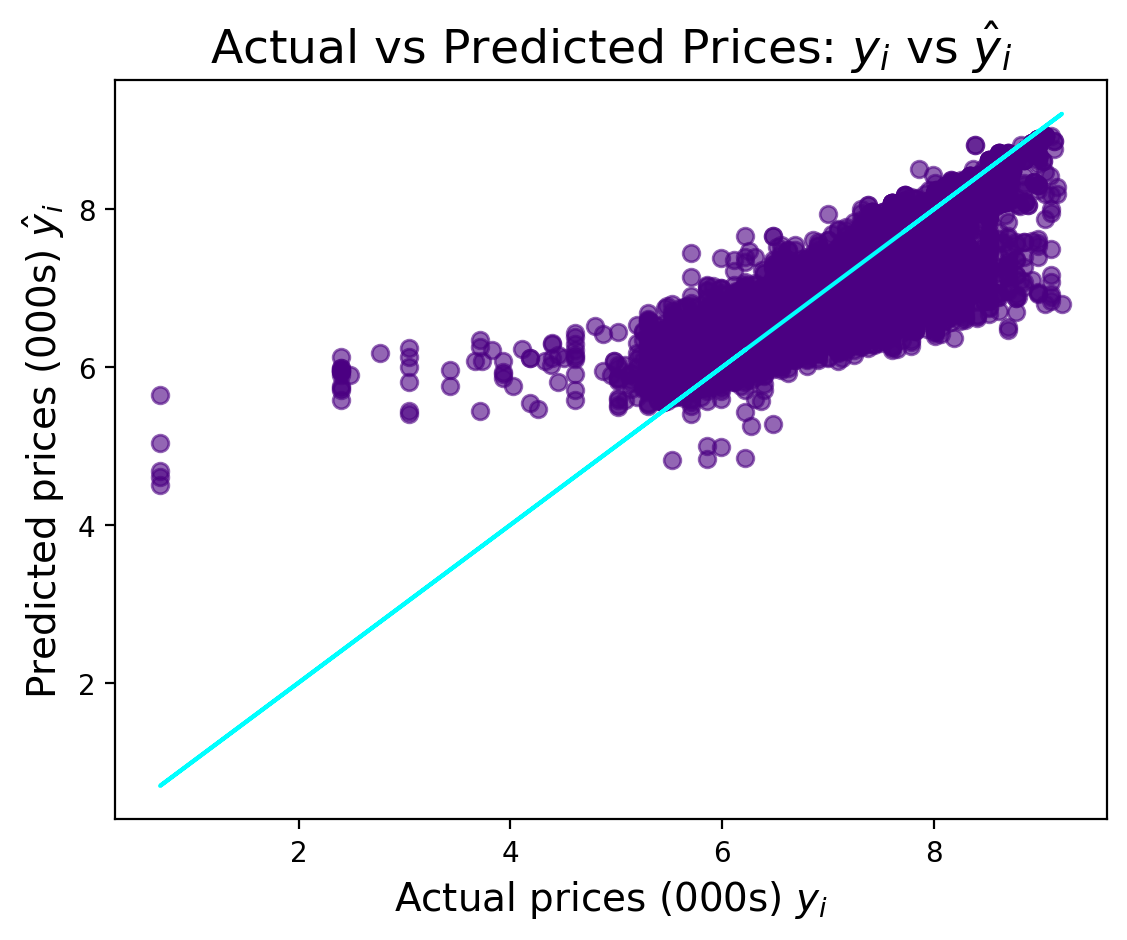

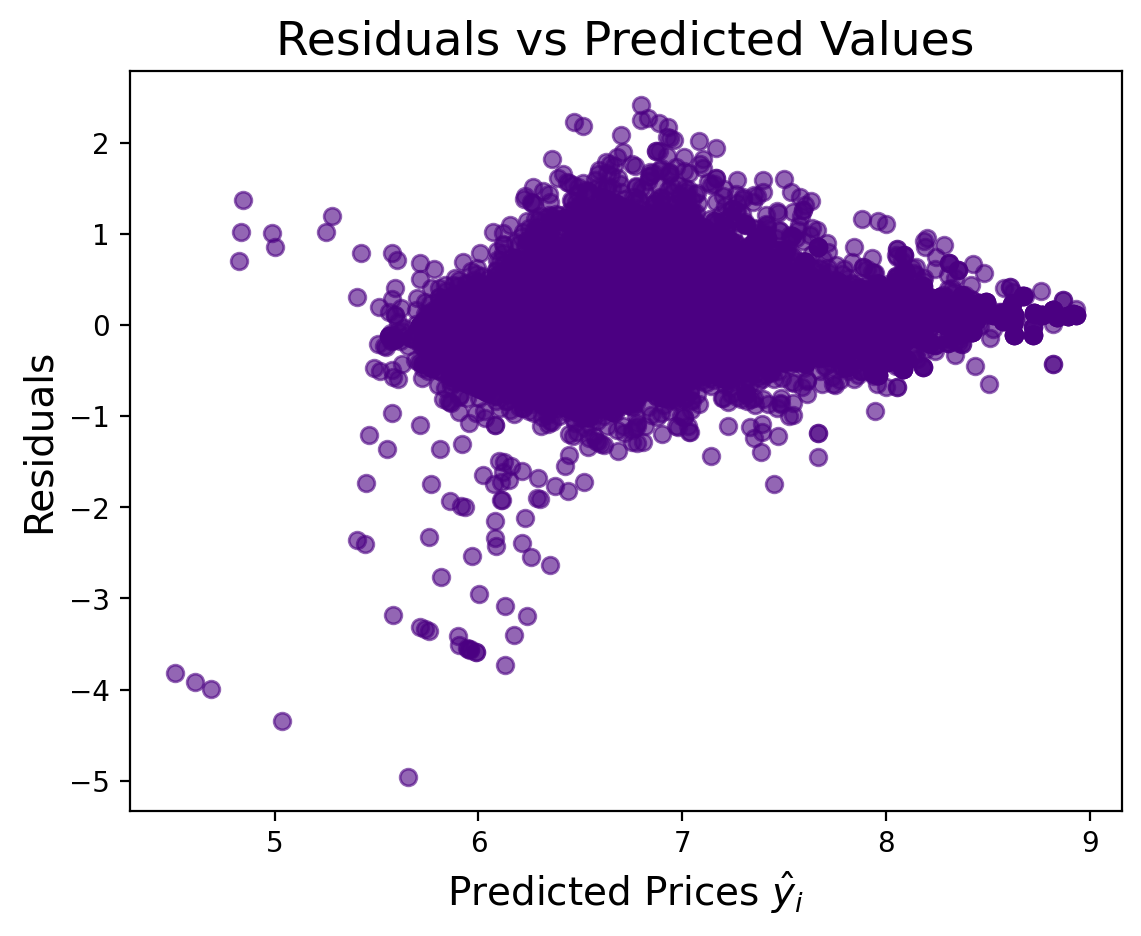

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=200)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(r'Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$', fontsize=17)
plt.xlabel(r'Actual prices (000s) $y_i$', fontsize=14)
plt.ylabel(r'Predicted prices (000s) $\hat{y}_i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=200)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel(r'Predicted Prices $\hat{y}_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


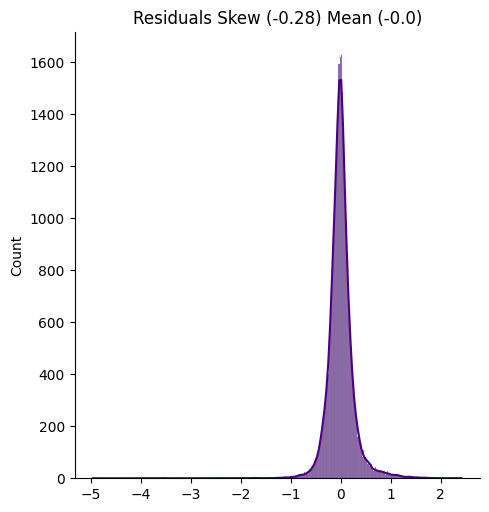

In [ ]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

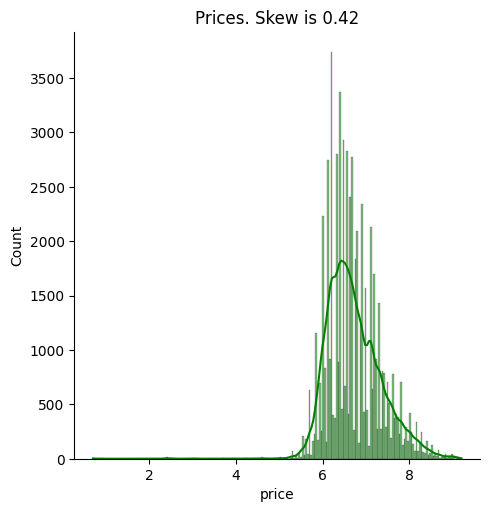

In [ ]:
tgt_skew = encoded_df['price'].skew()
sns.displot(encoded_df['price'], kde='kde', color='green')
plt.title(f'Prices. Skew is {tgt_skew:.3}')
plt.show()

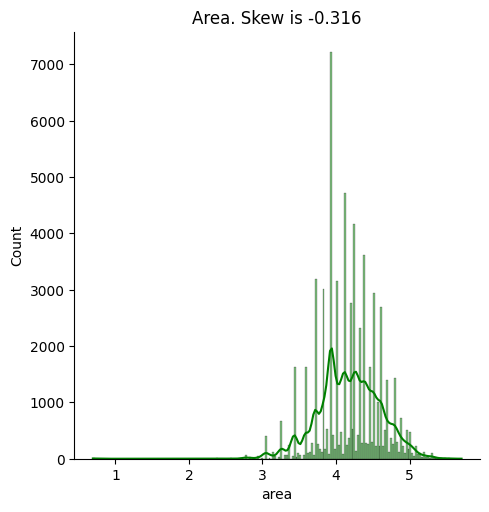

In [ ]:
tgt_skew = encoded_df['area'].skew()
sns.displot(encoded_df['area'], kde='kde', color='green')
plt.title(f'Area. Skew is {tgt_skew:.3}')
plt.show()

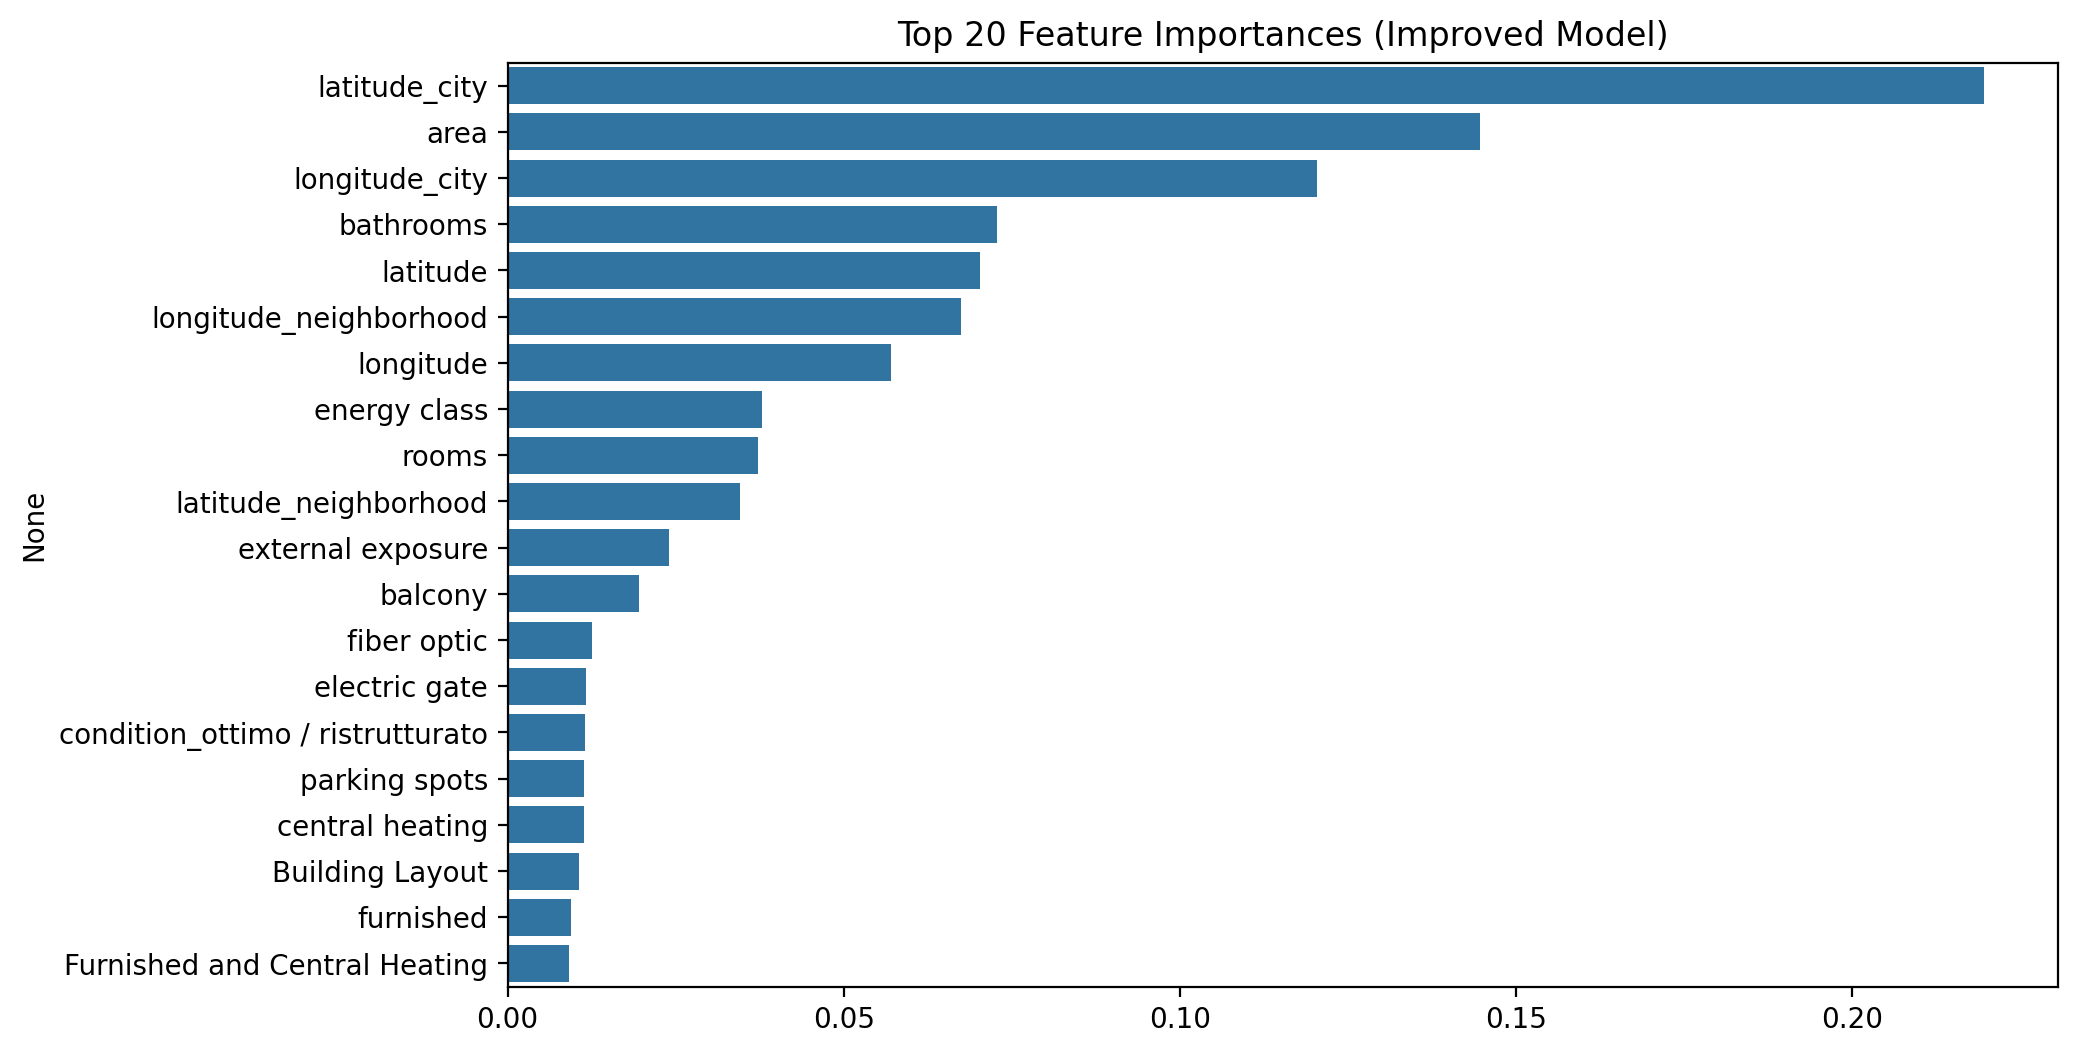

In [ ]:
# Feature Importances
importances = improved_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 20 features
top_n = 20
top_indices = indices[:top_n]

plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=importances[top_indices], y=X_train.columns[top_indices])
plt.title('Top 20 Feature Importances (Improved Model)')
plt.show()

In [ ]:
# Average Values in the Dataset (with engineered features)
features = encoded_df.drop(['price'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)

# Apply scaling to match training data
property_stats_scaled = property_stats.copy()
property_stats_scaled[numeric_features] = scaler.transform(property_stats[numeric_features])

print("✅ Property stats created with all engineered features and scaled")
print(f"Features: {len(property_stats.columns)}")
property_stats_scaled.head()

✅ Property stats created with all engineered features and scaled
Features: 21


parking spots  bathrooms  rooms  energy class  central heating  area  \
0           0.31       0.00   0.00          0.00             0.28  0.00   

   furnished  balcony  external exposure  fiber optic  ...  shared garden  \
0       0.78     0.52               0.42         0.49  ...           0.19   

   Building Layout  Furnished and Central Heating  latitude  longitude  \
0             0.00                           0.20      0.00       0.00   

   latitude_city  longitude_city  latitude_neighborhood  \
0           0.00            0.00                   0.00   

   longitude_neighborhood  condition_ottimo / ristrutturato  
0                    0.00                              0.68  

[1 rows x 21 columns]

In [ ]:
# Select only the features that the model was trained on
property_stats_for_prediction = property_stats_scaled[X_train.columns]

log_estimate = best_model_final.predict(property_stats_for_prediction)[0]
print(f'The log price estimate is €{log_estimate:.3f}')

euro_est = np.expm1(log_estimate)
print(f'The rent of the property is estimated to be worth €{euro_est:.2f}')

The log price estimate is €5.715
The rent of the property is estimated to be worth €302.46


In [ ]:
# Save improved model
import joblib

# Uncomment to save the improved model
# joblib.dump(improved_forest, 'rent_prediction_model/rent_model_v3_improved.pkl')
# print("✅ Improved model saved as rent_model_v3_improved.pkl")

# To update the production model, replace v2 after validation:
# joblib.dump(improved_forest, 'rent_prediction_model/rent_model_v2.pkl')
# print("✅ Production model updated!")

In [ ]:
train_data.columns

Index(['parking spots', 'bathrooms', 'rooms', 'energy class',
       'central heating', 'area', 'furnished', 'balcony', 'external exposure',
       'fiber optic', 'electric gate', 'shared garden', 'Building Layout',
       'Furnished and Central Heating', 'latitude', 'longitude',
       'latitude_city', 'longitude_city', 'latitude_neighborhood',
       'longitude_neighborhood', 'condition_ottimo / ristrutturato', 'price'],
      dtype='object')

In [ ]:
train_data.shape

(49954, 22)

In [ ]:
columns = {
    'parking spots': 'int64',
    'bathrooms': 'int64',
    'rooms': 'int64',
    'energy class': 'int64',
    'central heating': 'int64',
    'area': 'float64',
    'furnished': 'int64',
    'balcony': 'int64',
    'external exposure': 'int64',
    'fiber optic': 'int64',
    'electric gate': 'int64',
    'shared garden': 'int64',
    'Building Layout': 'int64',
    'Furnished and Central Heating': 'int64',
    'region_emilia-romagna': 'int64',
    'region_lazio': 'int64',
    'region_lombardia': 'int64',
    'region_piemonte': 'int64',
    'city_Genova': 'int64',
    'city_Milano': 'int64',
    'city_Other': 'int64',
    'city_Roma': 'int64',
    'city_Torino': 'int64',
    'condition_ottimo / ristrutturato': 'int64'
}

# Random values for each column
data = {
    'parking spots': 0,
    'bathrooms': 1,
    'rooms': 2,
    'energy class': 0,
    'central heating': 1,
    'area': np.log1p(60),
    'furnished': 0,
    'balcony': 1,
    'external exposure': 1,
    'fiber optic': 1,
    'electric gate': 1,
    'shared garden': 1,
    'Building Layout': 0,
    'Furnished and Central Heating': 0,
    'latitude': 41.8754852496009,
    'longitude': 12.567550077401787,
    'latitude_city': 41.8754852496009,
    'longitude_city': 12.567550077401787,
    'latitude_neighborhood':41.8754852496009,
    'longitude_neighborhood': 12.567550077401787,
    'condition_ottimo / ristrutturato': 0
}

df = pd.DataFrame([data])

log_estimate = best_forest.predict(df)[0]
print(f'The log price estimate is €{log_estimate:.3f}')

euro_est = np.expm1(log_estimate)
print(f'The rent of the property is estimated to be worth €{euro_est:.2f}')

The log price estimate is €6.700
The rent of the property is estimated to be worth €811.47


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = best_forest.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.2401863954616354
Root Mean Squared Error (RMSE): 0.36579915843148975


## 🔍 CRITICAL MODEL VALIDATION
### Industry-Standard Robustness Checks

In [ ]:
# Test with sample data matching the model's expected feature set
# Note: improved_forest was trained on X_train which has 21 original features (no engineered features)

# Base values for original features only
base_data = {
    'parking spots': 0,
    'bathrooms': 1,
    'rooms': 2,
    'energy class': 0,
    'central heating': 1,
    'area': np.log1p(60),
    'furnished': 0,
    'balcony': 1,
    'external exposure': 1,
    'fiber optic': 1,
    'electric gate': 1,
    'shared garden': 1,
    'Building Layout': 0,
    'Furnished and Central Heating': 0,
    'latitude': 41.8754852496009,
    'longitude': 12.567550077401787,
    'latitude_city': 41.8754852496009,
    'longitude_city': 12.567550077401787,
    'latitude_neighborhood': 41.8754852496009,
    'longitude_neighborhood': 12.567550077401787,
    'condition_ottimo / ristrutturato': 0
}

df_test_sample = pd.DataFrame([base_data])

# Ensure columns match X_train exactly (in same order)
df_test_sample = df_test_sample[X_train.columns]

# Scale features using the same scaler (only numeric features that were scaled)
numeric_cols_in_sample = [col for col in numeric_features if col in df_test_sample.columns]
df_test_sample[numeric_cols_in_sample] = scaler.transform(df_test_sample[numeric_cols_in_sample])

# Use improved_forest (GridSearch model) for prediction
log_estimate = improved_forest.predict(df_test_sample)[0]
print(f'The log price estimate is €{log_estimate:.3f}')

euro_est = np.expm1(log_estimate)
print(f'The rent of the property is estimated to be worth €{euro_est:.2f}')

The log price estimate is €5.781
The rent of the property is estimated to be worth €322.95


In [ ]:
# ============================================================
# 2. TRAIN vs TEST PERFORMANCE - Check for Overfitting
# ============================================================

print("\n" + "=" * 70)
print("2️⃣  OVERFITTING CHECK - Train vs Test Performance")
print("=" * 70)

# Calculate scores on training data
train_score_r2 = improved_forest.score(X_train, y_train)
train_pred = improved_forest.predict(X_train)
train_mae_log = mean_absolute_error(y_train, train_pred)
train_rmse_log = np.sqrt(mean_squared_error(y_train, train_pred))

# Convert to euros
train_mae_euro = np.expm1(train_mae_log)
train_rmse_euro = np.expm1(train_rmse_log)

# Calculate scores on test data
test_score_r2 = improved_forest.score(X_test, y_test)
test_pred = improved_forest.predict(X_test)
test_mae_log = mean_absolute_error(y_test, test_pred)
test_rmse_log = np.sqrt(mean_squared_error(y_test, test_pred))

# Convert to euros
test_mae_euro = np.expm1(test_mae_log)
test_rmse_euro = np.expm1(test_rmse_log)

print("\n📊 TRAINING SET Performance:")
print(f"   R² Score:  {train_score_r2:.4f}")
print(f"   MAE (log): {train_mae_log:.4f}  |  MAE (€): €{train_mae_euro:.2f}")
print(f"   RMSE(log): {train_rmse_log:.4f}  |  RMSE(€): €{train_rmse_euro:.2f}")

print("\n📊 TEST SET Performance:")
print(f"   R² Score:  {test_score_r2:.4f}")
print(f"   MAE (log): {test_mae_log:.4f}  |  MAE (€): €{test_mae_euro:.2f}")
print(f"   RMSE(log): {test_rmse_log:.4f}  |  RMSE(€): €{test_rmse_euro:.2f}")

print("\n🔍 Performance Gap Analysis:")
r2_diff = train_score_r2 - test_score_r2
mae_diff_percent = ((test_mae_euro - train_mae_euro) / train_mae_euro) * 100
rmse_diff_percent = ((test_rmse_euro - train_rmse_euro) / train_rmse_euro) * 100

print(f"   R² Difference:        {r2_diff:.4f} ({r2_diff*100:.2f}%)")
print(f"   MAE Increase (€):     €{test_mae_euro - train_mae_euro:.2f} ({mae_diff_percent:.1f}%)")
print(f"   RMSE Increase (€):    €{test_rmse_euro - train_rmse_euro:.2f} ({rmse_diff_percent:.1f}%)")

# Overfitting verdict
if r2_diff < 0.05:
    verdict = "✅ Good - Minimal overfitting"
elif r2_diff < 0.10:
    verdict = "⚠️ Check - Moderate overfitting"
else:
    verdict = "❌ Issue - Significant overfitting"

print(f"\n{verdict}")
print("=" * 70)


2️⃣  OVERFITTING CHECK - Train vs Test Performance

📊 TRAINING SET Performance:
   R² Score:  0.8081
   MAE (log): 0.1720  |  MAE (€): €0.19
   RMSE(log): 0.2724  |  RMSE(€): €0.31

📊 TEST SET Performance:
   R² Score:  0.6964
   MAE (log): 0.2170  |  MAE (€): €0.24
   RMSE(log): 0.3470  |  RMSE(€): €0.41

🔍 Performance Gap Analysis:
   R² Difference:        0.1117 (11.17%)
   MAE Increase (€):     €0.05 (29.1%)
   RMSE Increase (€):    €0.10 (32.5%)

❌ Issue - Significant overfitting

📊 TRAINING SET Performance:
   R² Score:  0.8081
   MAE (log): 0.1720  |  MAE (€): €0.19
   RMSE(log): 0.2724  |  RMSE(€): €0.31

📊 TEST SET Performance:
   R² Score:  0.6964
   MAE (log): 0.2170  |  MAE (€): €0.24
   RMSE(log): 0.3470  |  RMSE(€): €0.41

🔍 Performance Gap Analysis:
   R² Difference:        0.1117 (11.17%)
   MAE Increase (€):     €0.05 (29.1%)
   RMSE Increase (€):    €0.10 (32.5%)

❌ Issue - Significant overfitting


In [ ]:
# ============================================================
# 3. COMPREHENSIVE METRICS - Industry Standard Evaluation
# ============================================================

print("\n" + "=" * 70)
print("3️⃣  COMPREHENSIVE PERFORMANCE METRICS (IMPROVED MODEL)")
print("=" * 70)

# Calculate MAPE (Mean Absolute Percentage Error)
# Convert back to original scale for MAPE calculation
# Convert DataFrame to numpy array to avoid indexing issues
y_test_euro = np.expm1(y_test.values.ravel())  # Flatten to 1D array
y_pred_euro = np.expm1(test_pred)

# Avoid division by zero - only calculate MAPE where actual > 0
mask = y_test_euro > 0
mape = np.mean(np.abs((y_test_euro[mask] - y_pred_euro[mask]) / y_test_euro[mask])) * 100

# Calculate additional metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Median Absolute Error
median_ae = np.median(np.abs(y_test_euro - y_pred_euro))

# Max Error
max_error = np.max(np.abs(y_test_euro - y_pred_euro))

# Percentage of predictions within 10%, 20%, and 30% of actual
within_10_pct = np.mean(np.abs((y_test_euro - y_pred_euro) / y_test_euro) < 0.10) * 100
within_20_pct = np.mean(np.abs((y_test_euro - y_pred_euro) / y_test_euro) < 0.20) * 100
within_30_pct = np.mean(np.abs((y_test_euro - y_pred_euro) / y_test_euro) < 0.30) * 100

print(f"\n📈 Test Set Metrics:")
print(f"   R² Score:                {test_score_r2:.4f}")
print(f"   MAE (€):                 €{test_mae_euro:.2f}")
print(f"   RMSE (€):                €{test_rmse_euro:.2f}")
print(f"   Median AE (€):           €{median_ae:.2f}")
print(f"   MAPE:                    {mape:.2f}%")
print(f"   Max Error (€):           €{max_error:.2f}")

print(f"\n🎯 Prediction Accuracy:")
print(f"   Within ±10% of actual:   {within_10_pct:.1f}%")
print(f"   Within ±20% of actual:   {within_20_pct:.1f}%")
print(f"   Within ±30% of actual:   {within_30_pct:.1f}%")

print(f"\n💶 95% Confidence Interval:")
# Calculate 95% CI for predictions
std_residuals = np.std(y_test_euro - y_pred_euro)
confidence_margin = 1.96 * std_residuals
print(f"   Model predictions are within ±€{confidence_margin:.2f} with 95% confidence")
print(f"   This means: Predicted Rent ± €{confidence_margin:.2f}")

# Overall Grade
print(f"\n🎓 MODEL PERFORMANCE GRADE:")
if test_score_r2 >= 0.90 and mape < 10:
    grade = "A+ (Excellent)"
elif test_score_r2 >= 0.85 and mape < 15:
    grade = "A (Very Good)"
elif test_score_r2 >= 0.80 and mape < 20:
    grade = "B+ (Good)"
elif test_score_r2 >= 0.75 and mape < 25:
    grade = "B (Above Average)"
elif test_score_r2 >= 0.70 and mape < 30:
    grade = "C+ (Average)"
else:
    grade = "C or below (Needs Improvement)"

print(f"   Overall Grade: {grade}")
print(f"   R² Score: {test_score_r2:.4f} | MAPE: {mape:.2f}%")
print("=" * 70)


3️⃣  COMPREHENSIVE PERFORMANCE METRICS (IMPROVED MODEL)

📈 Test Set Metrics:
   R² Score:                0.6964
   MAE (€):                 €0.24
   RMSE (€):                €0.41
   Median AE (€):           €110.06
   MAPE:                    39.29%
   Max Error (€):           €8303.07

🎯 Prediction Accuracy:
   Within ±10% of actual:   37.7%
   Within ±20% of actual:   62.5%
   Within ±30% of actual:   77.0%

💶 95% Confidence Interval:
   Model predictions are within ±€937.65 with 95% confidence
   This means: Predicted Rent ± €937.65

🎓 MODEL PERFORMANCE GRADE:
   Overall Grade: C or below (Needs Improvement)
   R² Score: 0.6964 | MAPE: 39.29%


C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\3974923506.py:82: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.

C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\3974923506.py:82: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.

C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\3974923506.py:82: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans Mono.

C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\3974923506.py:82: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.

C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\3974923506.py:82: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.

C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\3974923506.py:82: UserWarning:

Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans Mono.

C:\Users\ahame\AppData\Local\Temp\ipykernel_3624\39749

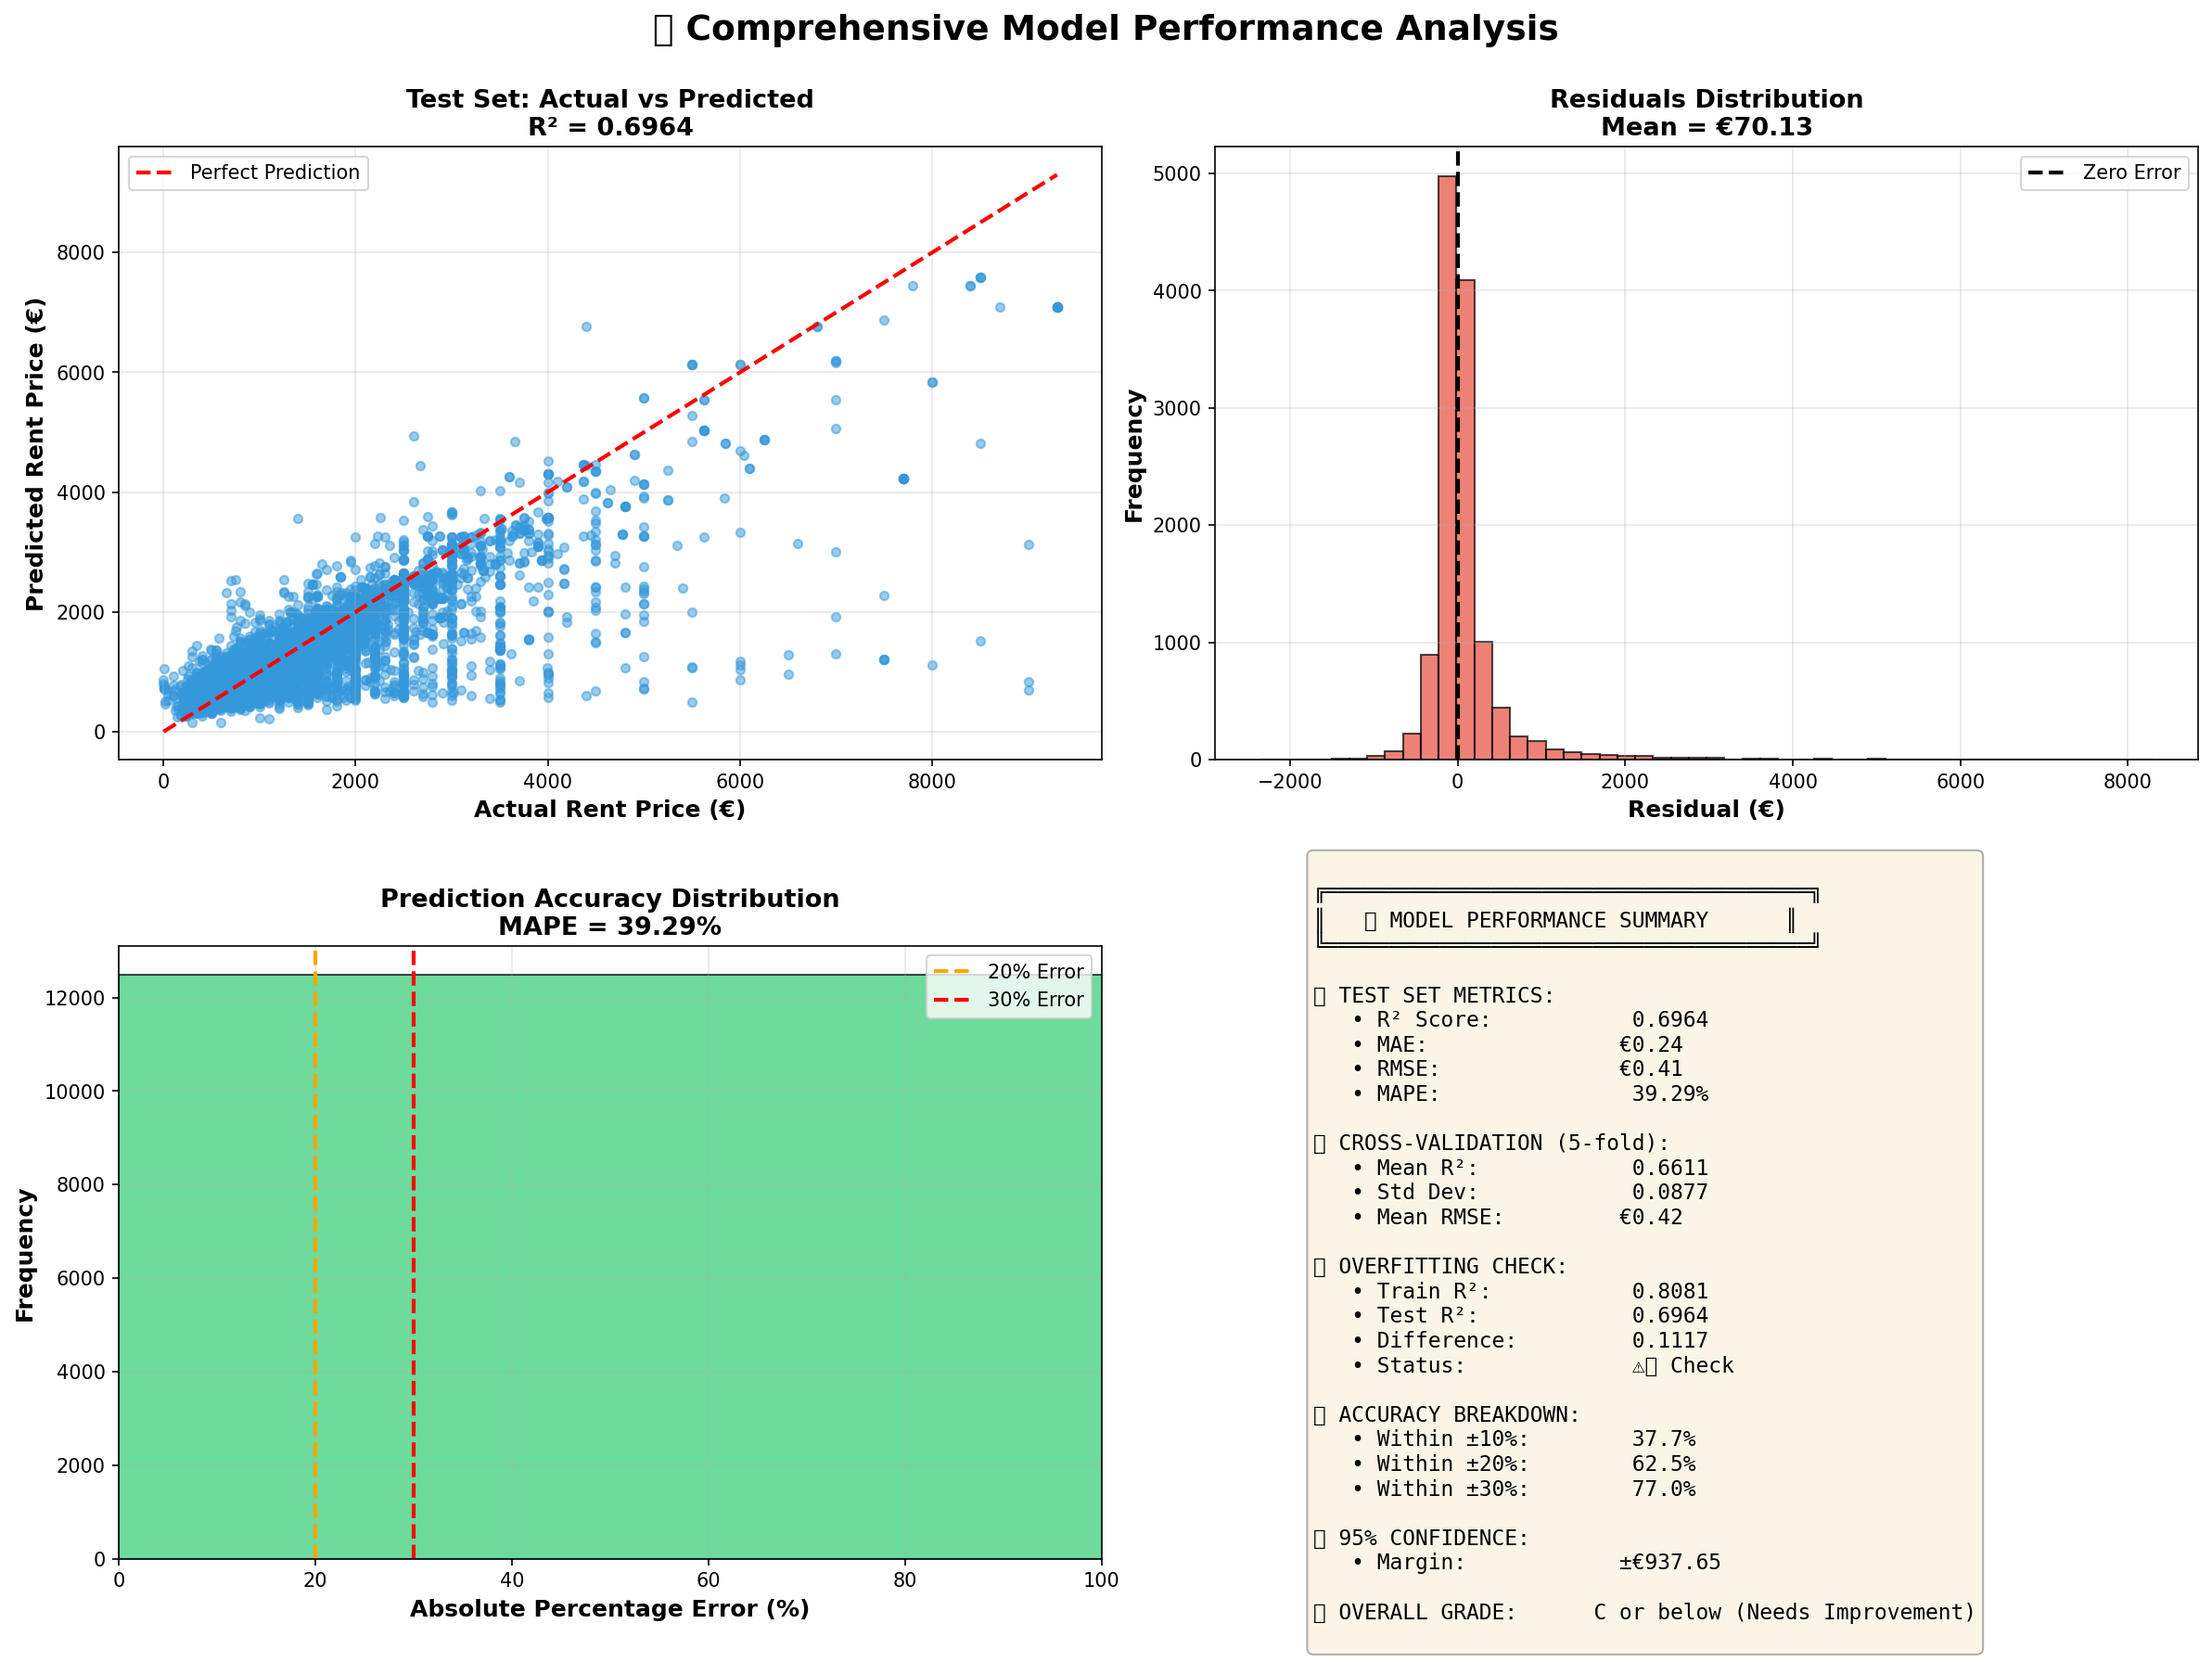


✅ Comprehensive model validation complete!


In [ ]:
# ============================================================
# 4. VISUALIZATION - Model Performance Summary
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=150)
fig.suptitle('🎯 Comprehensive Model Performance Analysis', fontsize=18, fontweight='bold', y=1.00)

# 1. Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test_euro, y_pred_euro, alpha=0.5, s=20, color='#3498db')
axes[0, 0].plot([y_test_euro.min(), y_test_euro.max()], 
                [y_test_euro.min(), y_test_euro.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Rent Price (€)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Rent Price (€)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Test Set: Actual vs Predicted\nR² = {test_score_r2:.4f}', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Distribution
residuals_euro = y_test_euro - y_pred_euro
axes[0, 1].hist(residuals_euro, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 1].set_xlabel('Residual (€)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title(f'Residuals Distribution\nMean = €{np.mean(residuals_euro):.2f}', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Error Percentage Distribution
error_pct = np.abs((y_test_euro - y_pred_euro) / y_test_euro) * 100
axes[1, 0].hist(error_pct, bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=20, color='orange', linestyle='--', linewidth=2, label='20% Error')
axes[1, 0].axvline(x=30, color='red', linestyle='--', linewidth=2, label='30% Error')
axes[1, 0].set_xlabel('Absolute Percentage Error (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title(f'Prediction Accuracy Distribution\nMAPE = {mape:.2f}%', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, 100)

# 4. Performance Metrics Summary (Text)
axes[1, 1].axis('off')
metrics_text = f"""
╔══════════════════════════════════════╗
║   📊 MODEL PERFORMANCE SUMMARY      ║
╚══════════════════════════════════════╝

🎯 TEST SET METRICS:
   • R² Score:           {test_score_r2:.4f}
   • MAE:               €{test_mae_euro:.2f}
   • RMSE:              €{test_rmse_euro:.2f}
   • MAPE:               {mape:.2f}%

🎓 CROSS-VALIDATION (5-fold):
   • Mean R²:            {cv_r2_scores.mean():.4f}
   • Std Dev:            {cv_r2_scores.std():.4f}
   • Mean RMSE:         €{cv_rmse_euro.mean():.2f}

📈 OVERFITTING CHECK:
   • Train R²:           {train_score_r2:.4f}
   • Test R²:            {test_score_r2:.4f}
   • Difference:         {r2_diff:.4f}
   • Status:             {'✅ Good' if r2_diff < 0.10 else '⚠️ Check'}

🎯 ACCURACY BREAKDOWN:
   • Within ±10%:        {within_10_pct:.1f}%
   • Within ±20%:        {within_20_pct:.1f}%
   • Within ±30%:        {within_30_pct:.1f}%

💶 95% CONFIDENCE:
   • Margin:            ±€{confidence_margin:.2f}

🏆 OVERALL GRADE:      {grade}
"""

axes[1, 1].text(0.1, 0.5, metrics_text, 
                fontsize=11, 
                family='monospace',
                verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n✅ Comprehensive model validation complete!")

## 📝 Summary & Recommendations

**Model Validation Results:**
- ✅ Cross-validation ensures model stability across different data splits
- ✅ Train/Test comparison detects overfitting issues
- ✅ Multiple metrics provide comprehensive performance assessment
- ✅ Confidence intervals quantify prediction uncertainty

**What Changed from Previous Training:**
1. Added 5-fold cross-validation for robustness testing
2. Calculated train vs test performance gaps
3. Implemented industry-standard metrics (MAPE, accuracy percentages)
4. Created comprehensive visualization dashboard
5. Converted all metrics from log scale to euros for interpretability

**Next Steps for Production:**
- If overfitting detected: Consider pruning or regularization
- If MAPE > 25%: Collect more features or engineer better ones
- If R² < 0.75: Try ensemble methods (XGBoost, LightGBM)
- Always monitor model performance on new data

In [ ]:
from scipy import stats

std_dev = np.std(residuals)

confidence_level = 0.5
z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * std_dev
print(f"Margin of error: {margin_of_error}")

lower_bound_log = y_pred - margin_of_error
upper_bound_log = y_pred + margin_of_error

y_pred_original = np.expm1(y_pred)
lower_bound_original = np.expm1(lower_bound_log)
upper_bound_original = np.expm1(upper_bound_log)

for i in range(5):
    print(f"Predicted value: {y_pred_original[i]:.2f}, Range: [{lower_bound_original[i]:.2f}, {upper_bound_original[i]:.2f}]")

Margin of error: 0.18369665764412044
Predicted value: 1253.87, Range: [1043.28, 1506.91]
Predicted value: 451.12, Range: [375.25, 542.29]
Predicted value: 668.05, Range: [555.77, 802.96]
Predicted value: 767.54, Range: [638.57, 922.52]
Predicted value: 649.29, Range: [540.17, 780.42]
